# Data Analysis on SEASCAPE course dataset
dataset download from https://github.com/dcao/seascape/tree/master/data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
"""
import dependencies
"""

'\nimport dependencies\n'

In [2]:
f_name = 'data.csv'
df = pd.read_csv(f_name)
df.head(5)

instr    course  term  enrolled  evals  recClass  \
0    Butler, Elizabeth Annette    AAS 10  FA20        65     29      89.0   
1  Puritty, Chandler Elizabeth   AAS 190  FA20        19      5     100.0   
2      Andrews, Abigail Leslie  AIP 197T  FA20        34     11     100.0   
3    Jones, Ian William Nasser  ANAR 120  FA20        15      4     100.0   
4           Smith, Neil Gordon  ANAR 121  FA20        17      6     100.0   

   recInstr  hours  gpaExp  gpaAvg  
0      96.0   4.50    3.77    3.33  
1     100.0   2.10    4.00     NaN  
2     100.0   4.06    3.67     NaN  
3     100.0   2.50    3.50     NaN  
4     100.0   6.50    4.00     NaN

## Extract the department information and generate a new column

In [3]:
dep = []
for courses in df['course']:
    de = courses.split(' ')
    dep.append(de[0])
df['department'] = dep
# print(df.head(5))
df.head(10)

instr    course  term  enrolled  evals  recClass  \
0    Butler, Elizabeth Annette    AAS 10  FA20        65     29      89.0   
1  Puritty, Chandler Elizabeth   AAS 190  FA20        19      5     100.0   
2      Andrews, Abigail Leslie  AIP 197T  FA20        34     11     100.0   
3    Jones, Ian William Nasser  ANAR 120  FA20        15      4     100.0   
4           Smith, Neil Gordon  ANAR 121  FA20        17      6     100.0   
5      D'Alpoim Guedes, Jade A  ANAR 146  FA20        41     16     100.0   
6      Fox, Patrick Keolu Ozer  ANBI 118  FA20        20     15      93.0   
7      Fox, Patrick Keolu Ozer  ANBI 121  FA20        14     10     100.0   
8       Semendeferi, Ekaterini  ANBI 136  FA20        22     15      66.0   
9              Gagneux, Pascal  ANBI 141  FA20       117     53     100.0   

   recInstr  hours  gpaExp  gpaAvg department  
0      96.0   4.50    3.77    3.33        AAS  
1     100.0   2.10    4.00     NaN        AAS  
2     100.0   4.06    3.67     NaN        AIP  
3     100.0   2.50    3.50     NaN       ANAR  
4     100.0   6.50    4.00     NaN       ANAR  
5     100.0   4.00    3.81    3.79       ANAR  
6     100.0   2.77    3.67    3.77       ANBI  
7     100.0   2.72    3.67     NaN       ANBI  
8      73.0   5.17    3.27    2.99       ANBI  
9     100.0   3.75    3.70    3.87       ANBI

## Basic data analysis

In [4]:
df.shape

(51281, 11)

In [5]:
df.columns

Index(['instr', 'course', 'term', 'enrolled', 'evals', 'recClass', 'recInstr',
       'hours', 'gpaExp', 'gpaAvg', 'department'],
      dtype='object')

In [6]:
df.info() # some missing values in gpa information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51281 entries, 0 to 51280
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instr       51281 non-null  object 
 1   course      51281 non-null  object 
 2   term        51281 non-null  object 
 3   enrolled    51281 non-null  int64  
 4   evals       51281 non-null  int64  
 5   recClass    51281 non-null  float64
 6   recInstr    51281 non-null  float64
 7   hours       51281 non-null  float64
 8   gpaExp      49892 non-null  float64
 9   gpaAvg      36320 non-null  float64
 10  department  51281 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 4.3+ MB


In [7]:
df.isnull().sum()

instr             0
course            0
term              0
enrolled          0
evals             0
recClass          0
recInstr          0
hours             0
gpaExp         1389
gpaAvg        14961
department        0
dtype: int64

In [8]:
df['department'].value_counts() #138 departments with different number of enrolled students

MATH    2770
CSE     2349
ECON    2147
CHEM    2016
POLI    1749
        ... 
CCS        3
ANLD       3
LIIT       2
SEV        1
ANPR       1
Name: department, Length: 138, dtype: int64

## Analysis on some metrics

In [9]:
"""
weekly workload in hours
"""
workload=df.groupby(['department','course','term'])['hours'].mean()
workload.head(10)

department  course     term
AAS         AAS 10     FA20    4.50
                       SP19    4.00
                       SP20    4.08
                       WI17    5.32
            AAS 190    FA20    2.10
            AAS 87     FA15    0.50
                       SP15    2.00
AIP         AIP 197DC  FA19    4.50
                       SP19    8.90
            AIP 197T   FA13    5.12
Name: hours, dtype: float64

<BarContainer object of 4105 artists>

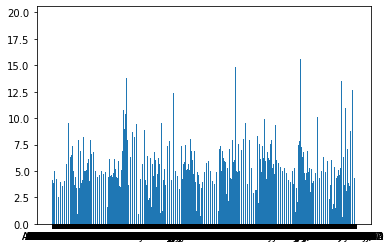

In [10]:
workload=df.groupby(['course'])['hours'].mean()
workload=workload.reset_index()
plt.bar(workload.course, workload.hours)

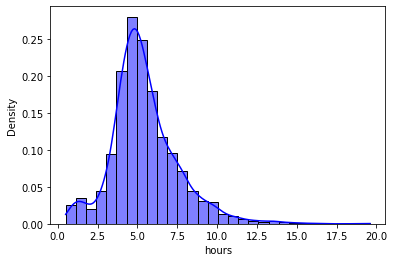

In [11]:
sns.set_palette("hls")
sns.histplot(workload.hours,stat="density",color="blue",bins=30,kde=True)
plt.show()

we can see that for most of courses, the weekly workload is between 2.5~7.5 hours, so if one would like to take more stressful courses, then the following courses(group by departments) can be taken into consideration(top 6)

In [12]:
heavy_wkload = df[df['hours']>7.5]
heavy_wkload.groupby(['department','course'])['hours'].count()

department  course   
AIP         AIP 197DC     1
            AIP 197T      4
ANAR        ANAR 100      4
            ANAR 103      1
            ANAR 104      1
                         ..
VIS         VIS 70N       1
            VIS 80        4
WCWP        WCWP 100     54
            WCWP 10A     50
            WCWP 10B     46
Name: hours, Length: 1679, dtype: int64

<BarContainer object of 10 artists>

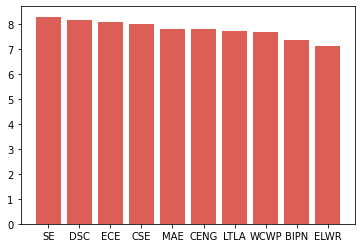

In [13]:
"""
group by department
"""
top_wkload = df.groupby('department').mean().sort_values('hours', ascending=False)[0:10]
top_wkload = top_wkload.reset_index()
plt.bar(top_wkload.department,top_wkload.hours)

DSC


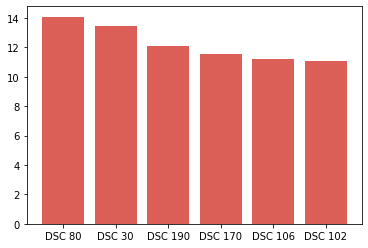

COMM


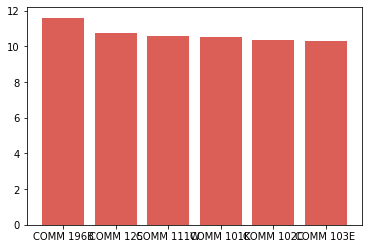

HIEU


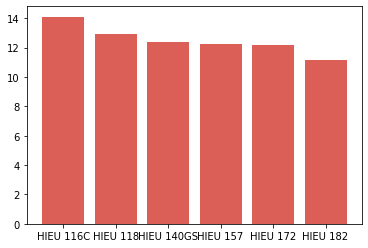

SE


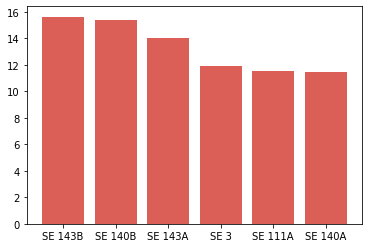

LTEU


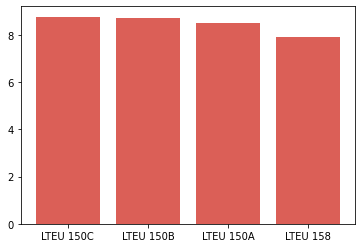

TDDE


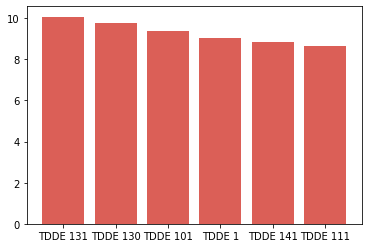

FPMU


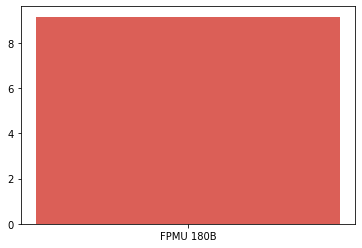

CHEM


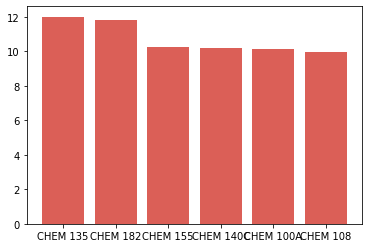

BIEB


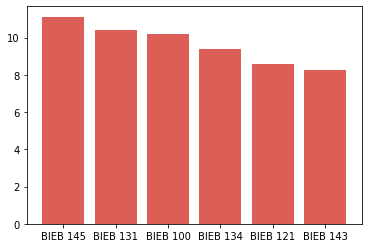

ICAM


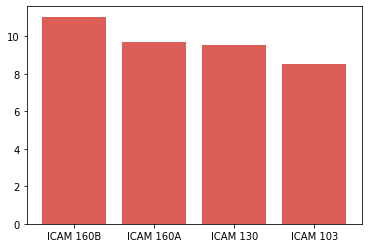

TDPW


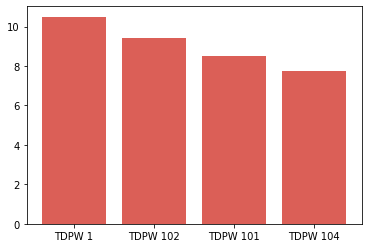

TDPR


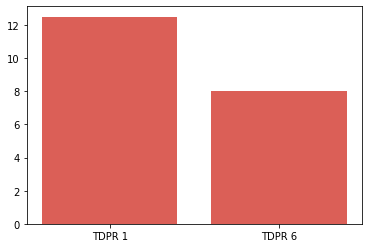

COGS


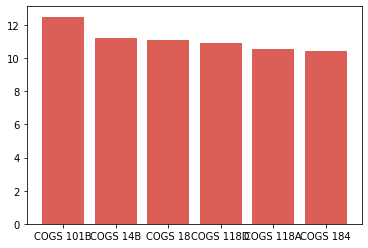

ERC


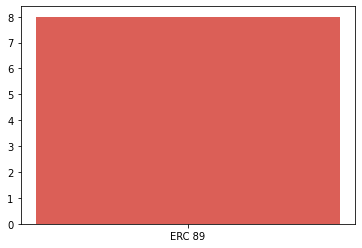

SOCD


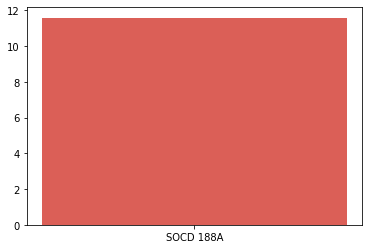

TDHD


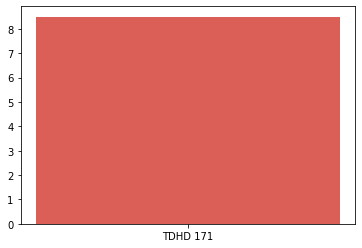

HIEA


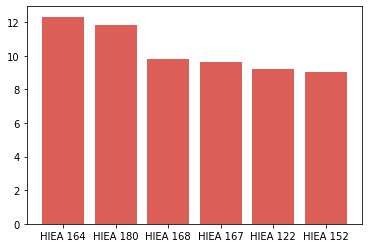

CENG


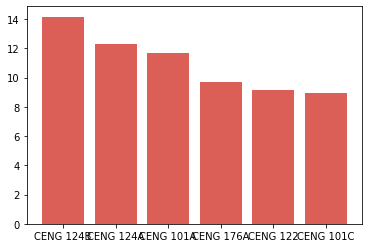

MAE


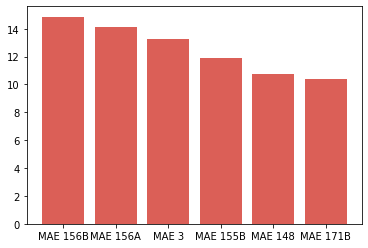

MATH


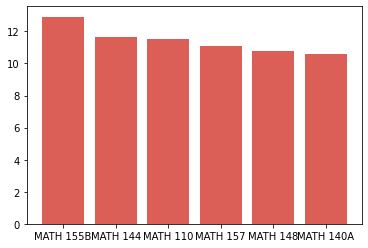

CHIN


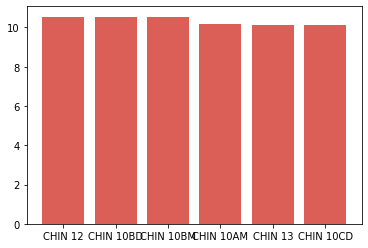

JUDA


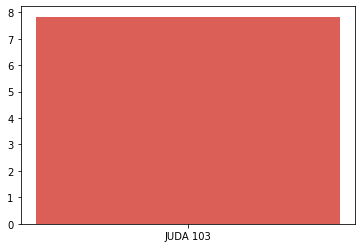

PHIL


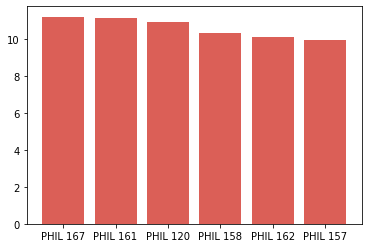

HDP


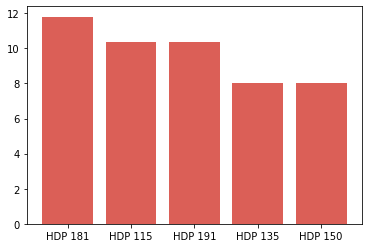

ANSC


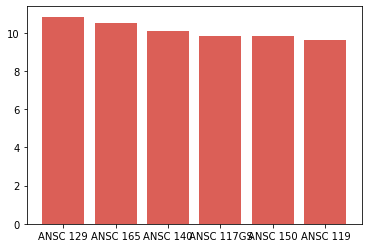

AWP


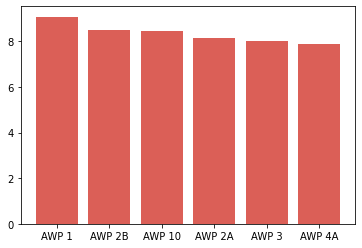

MMW


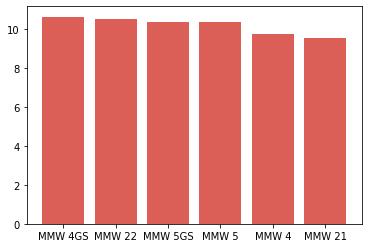

ESYS


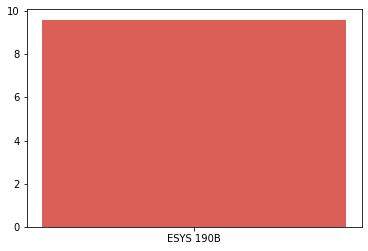

PHYS


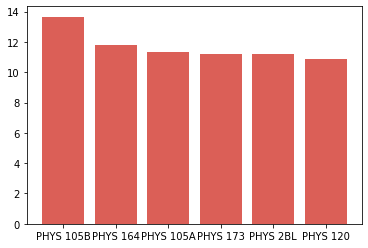

MGT


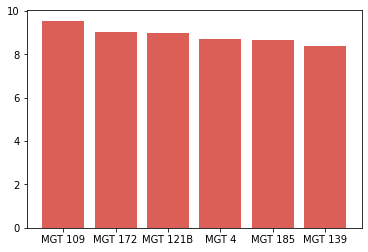

CGS


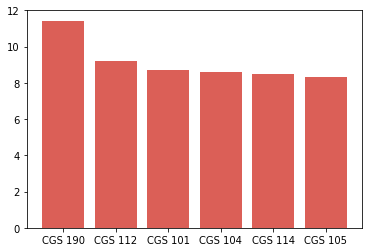

HIUS


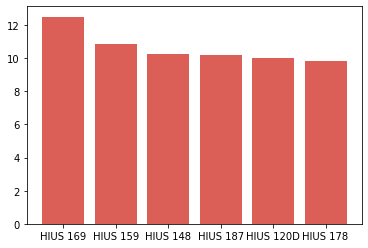

HUM


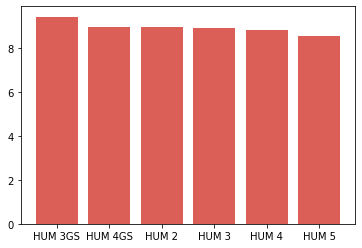

COHI


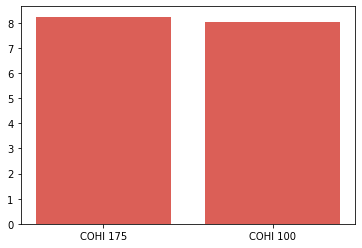

LTCH


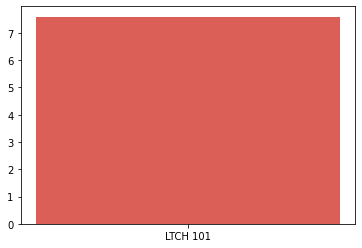

LIGN


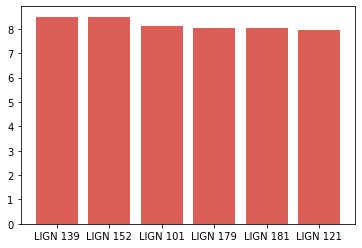

LIHL


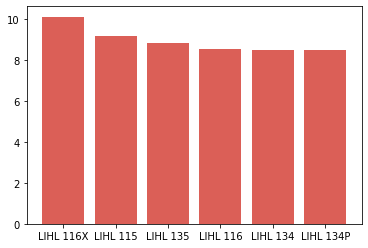

LTFR


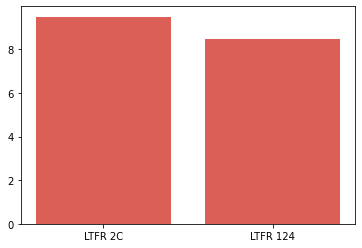

SIO


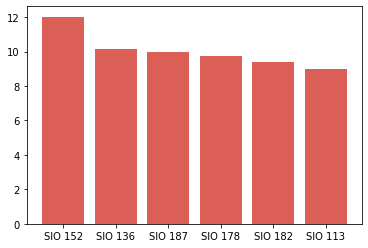

HILD


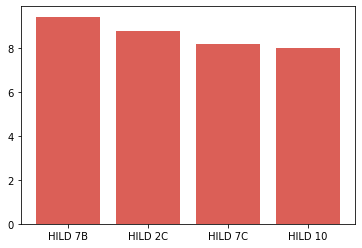

BENG


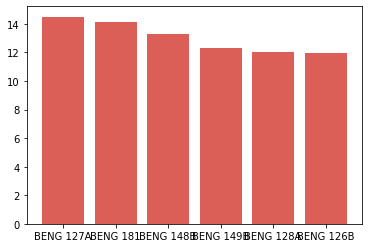

DSGN


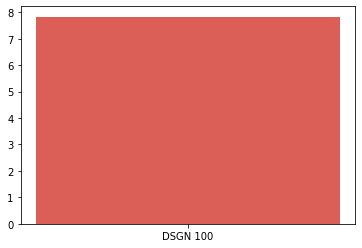

VIS


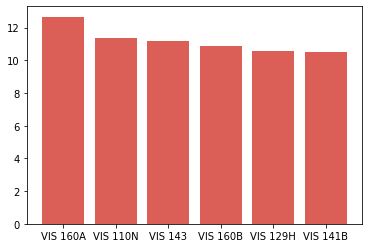

LTWL


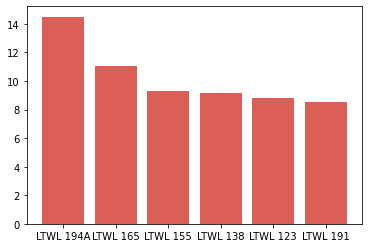

CONT


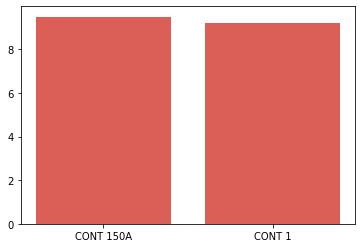

MUS


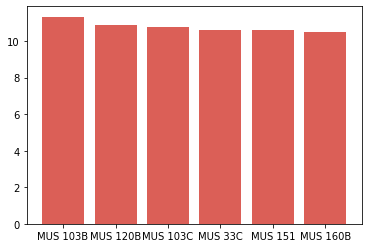

GLBH


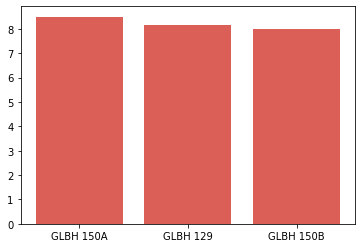

ETHN


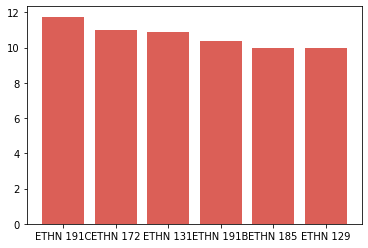

BIMM


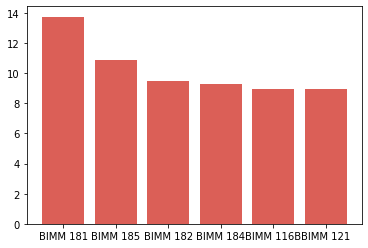

FMPH


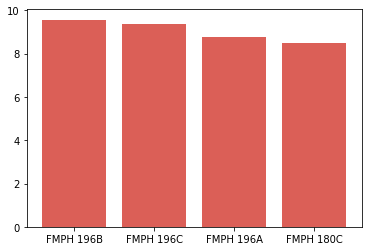

POLI


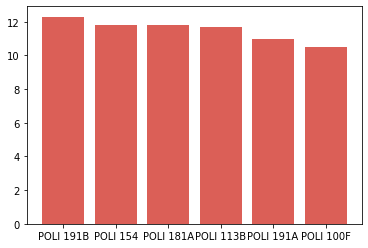

HINE


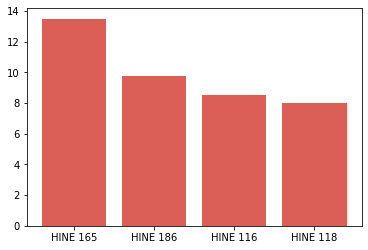

USP


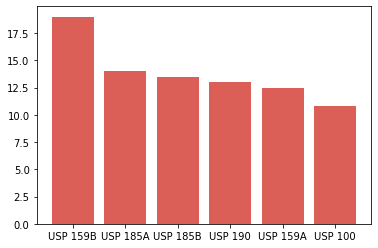

LTEN


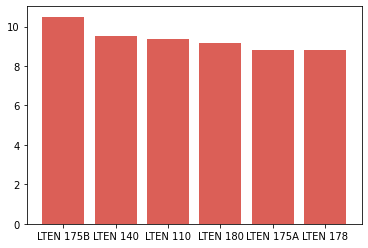

ENVR


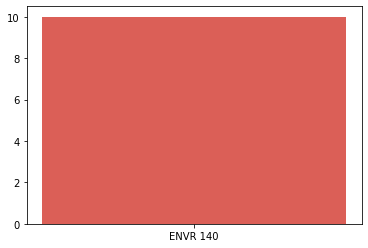

PSYC


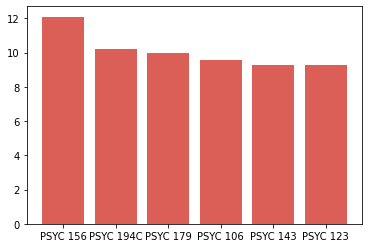

COMT


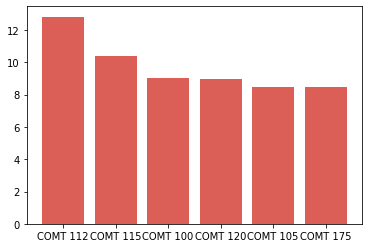

NANO


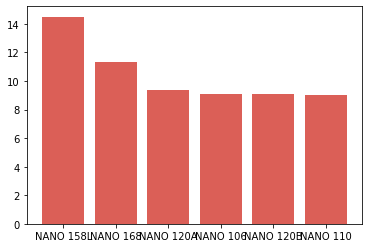

LTAM


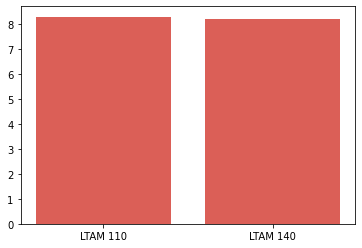

HISC


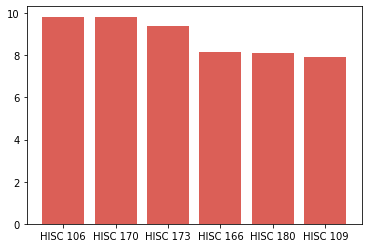

SOCB


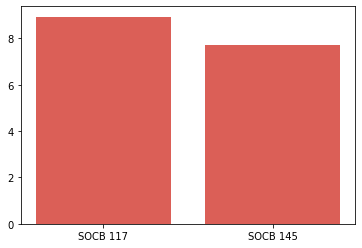

WCWP


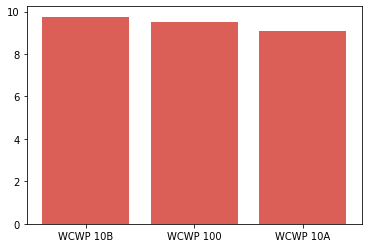

TDGE


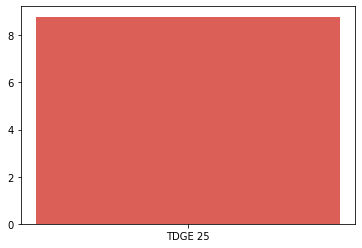

LAWS


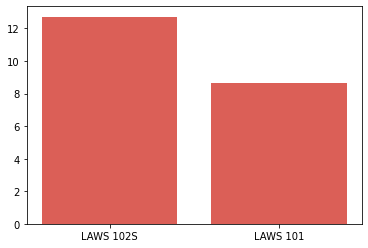

LTGK


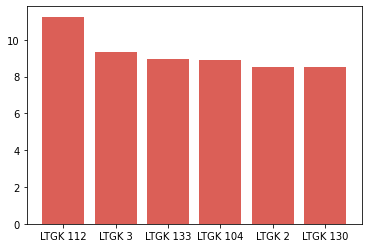

ENG


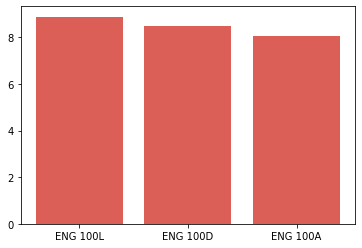

DOC


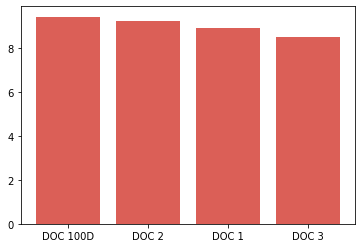

LTWR


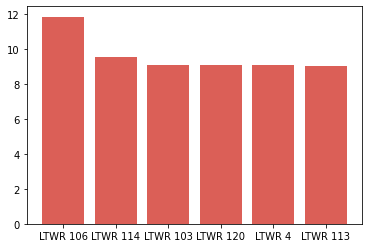

HMNR


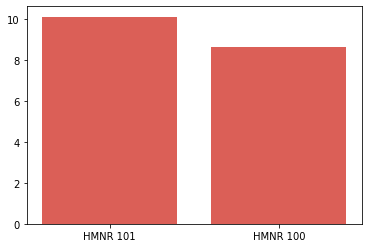

COCU


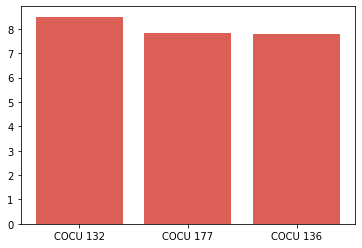

COGN


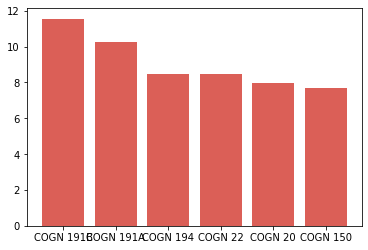

TMC


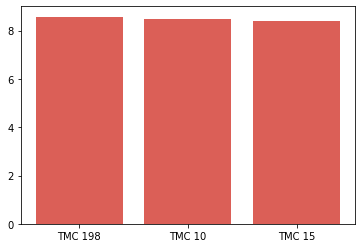

TDDR


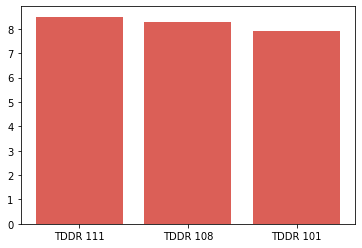

ANAR


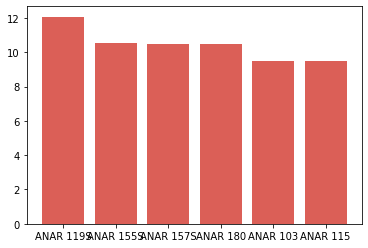

INTL


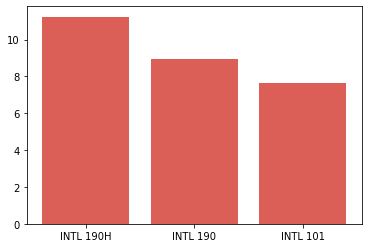

JAPN


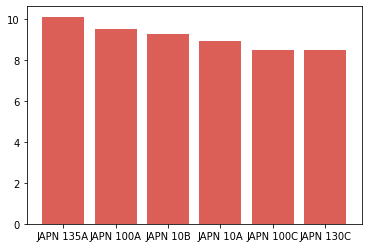

BILD


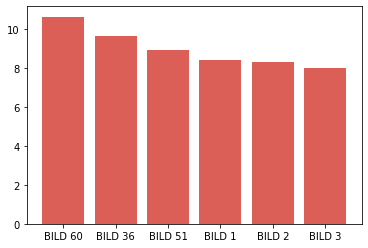

SOCI


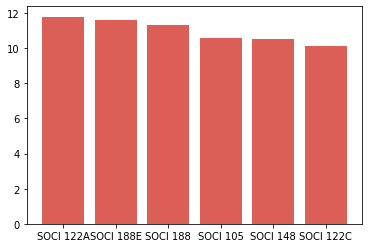

COSF


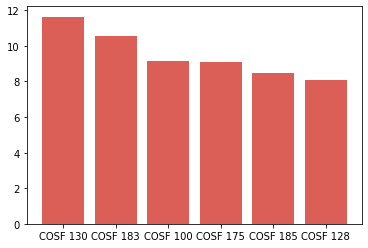

HDS


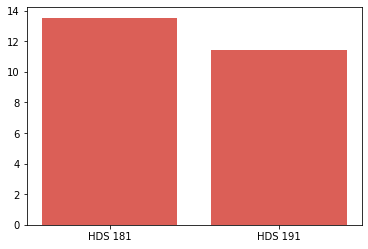

LTAF


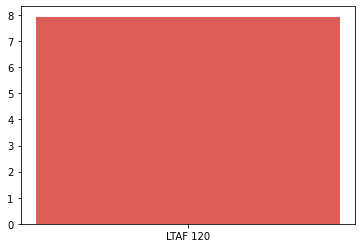

TWS


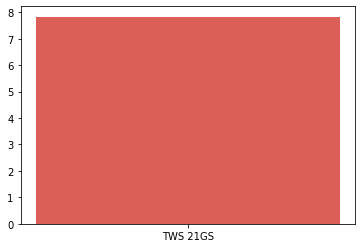

ANTH


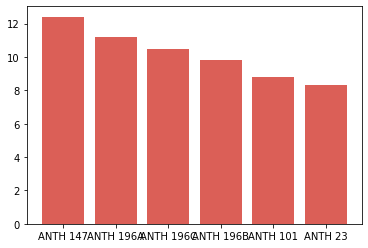

HITO


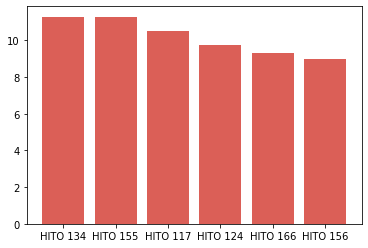

BIBC


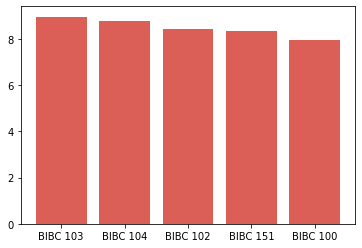

ECE


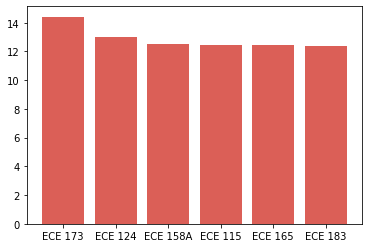

LTTH


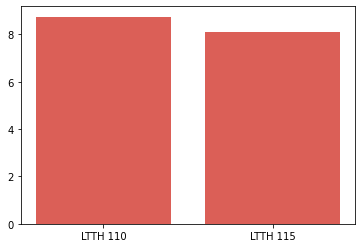

CSE


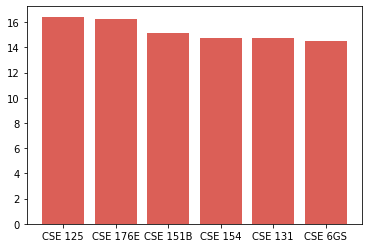

ANBI


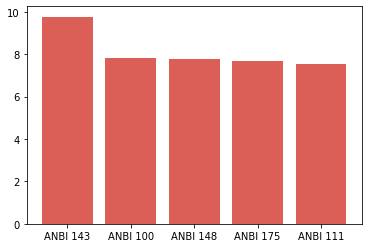

LTLA


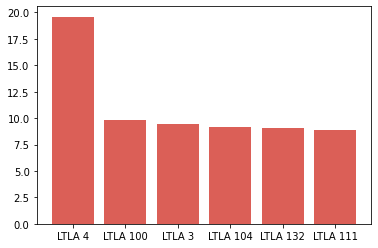

BIPN


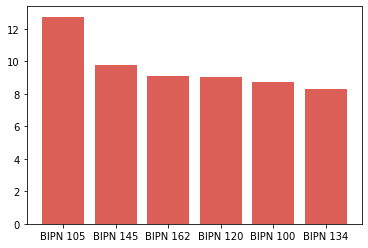

REV


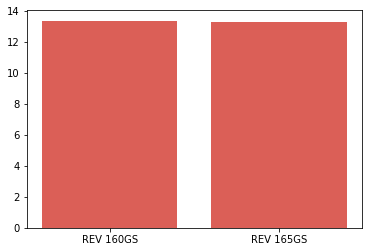

LTEA


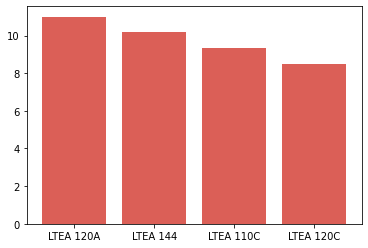

AIP


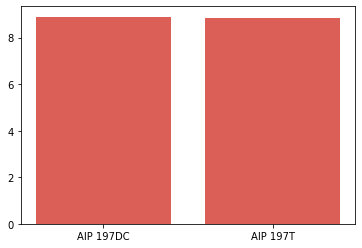

CAT


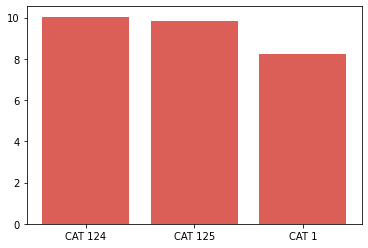

SOCC


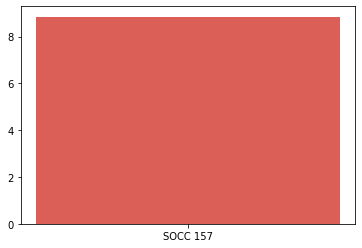

LTCS


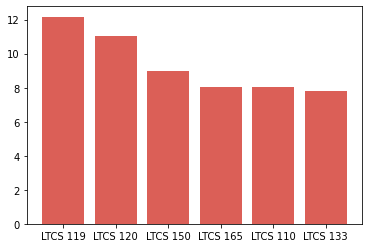

CSS


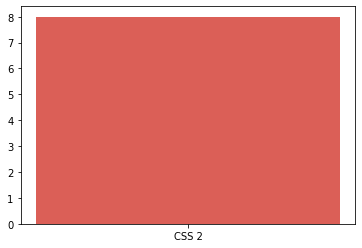

EDS


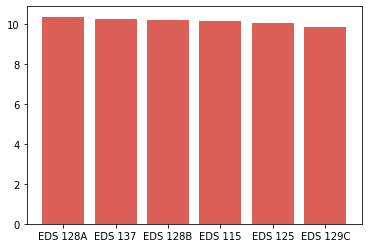

RELI


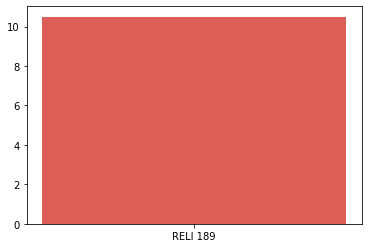

TDAC


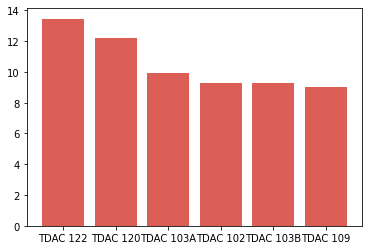

ECON


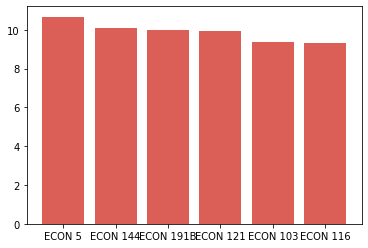

BICD


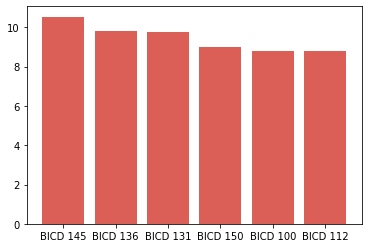

LTRU


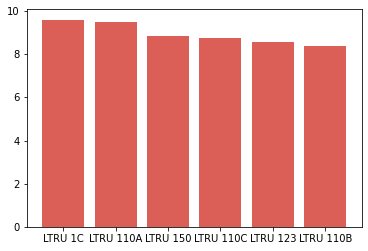

FILM


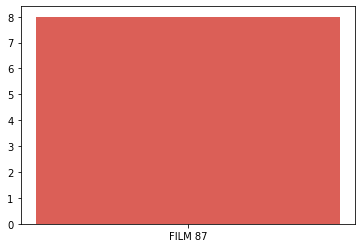

TDMV


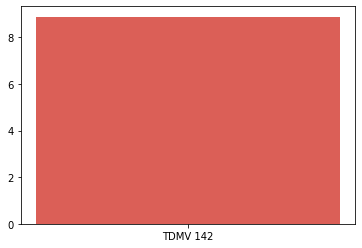

LATI


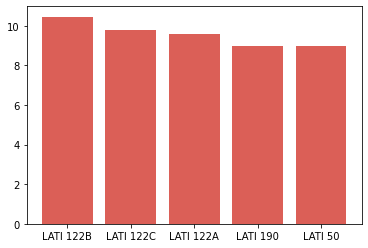

SOCA


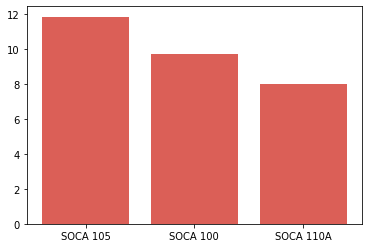

LTKO


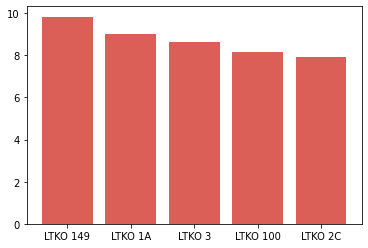

LTSP


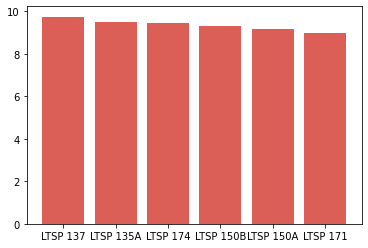

ELWR


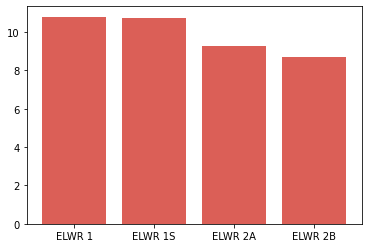

TDHT


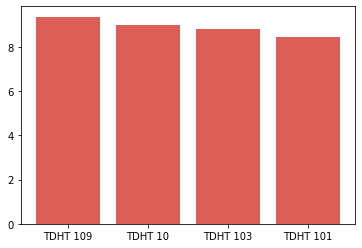

HILA


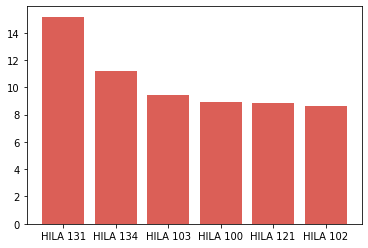

In [14]:
for dep in set(heavy_wkload['department'].values):
    heavy_wkload_0 = heavy_wkload[heavy_wkload['department'] == dep].groupby('course').mean().sort_values('hours', ascending=False)[0:6]
    heavy_wkload_0=heavy_wkload_0.reset_index()
    print(dep)
    plt.figure()
    plt.bar(heavy_wkload_0.course, heavy_wkload_0.hours)
    plt.show()
    

and the following courses would have less workloads

In [15]:
easy_wkload = df[df['hours']<2.5]
easy_wkload.groupby(['department','course'])['hours'].count()

department  course  
AAS         AAS 190      1
            AAS 87       3
AIP         AIP 197T     2
ANAR        ANAR 116     1
            ANAR 117     1
                        ..
VIS         VIS 87      13
WARR        WARR 1       6
            WARR 192     6
            WARR 2       5
            WARR 87     13
Name: hours, Length: 566, dtype: int64

<BarContainer object of 10 artists>

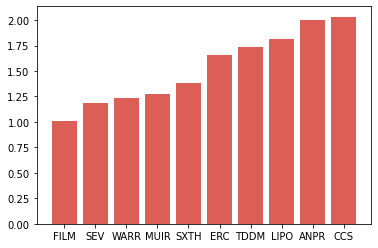

In [16]:
"""
group by department
"""
top_less_wkload = df.groupby('department').mean().sort_values('hours', ascending=True)[0:10]
top_less_wkload = top_less_wkload.reset_index()
plt.bar(top_less_wkload.department,top_less_wkload.hours)

DSC


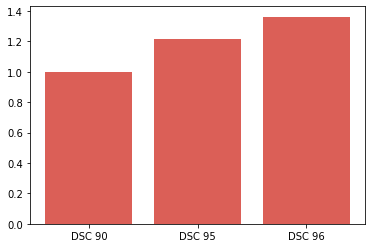

COMM


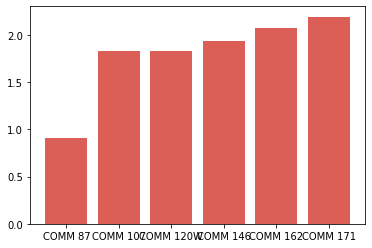

HIEU


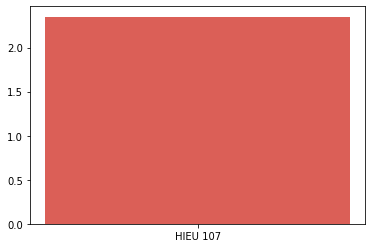

SE


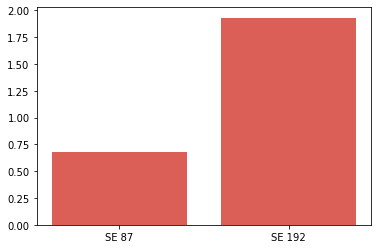

LTEU


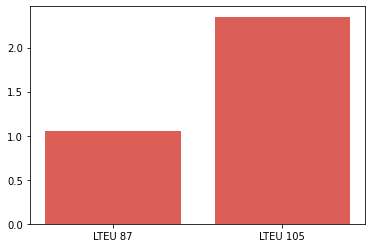

TDDE


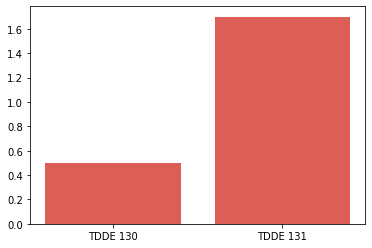

FPMU


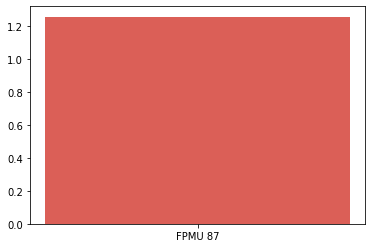

CHEM


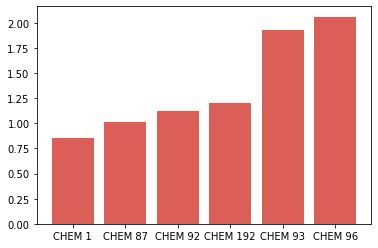

ICAM


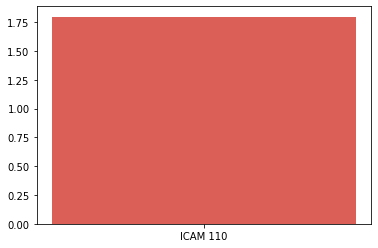

TDCH


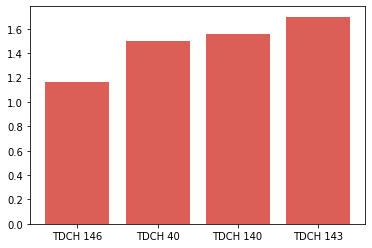

TDPW


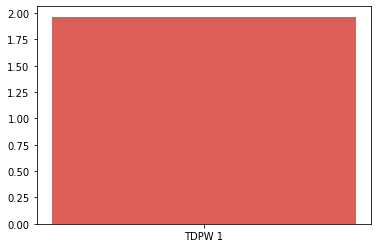

TDPR


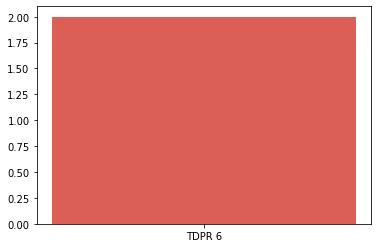

LIPO


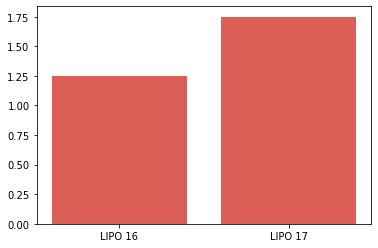

COGS


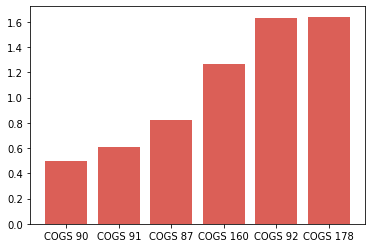

ERC


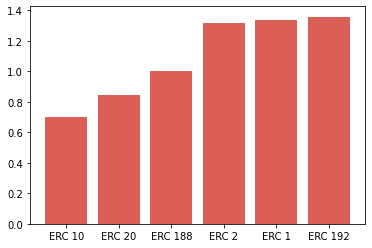

TDTR


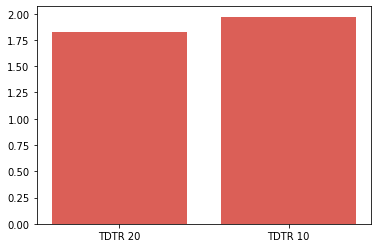

HIEA


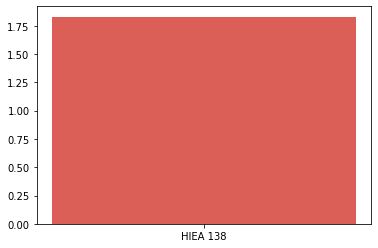

TDHD


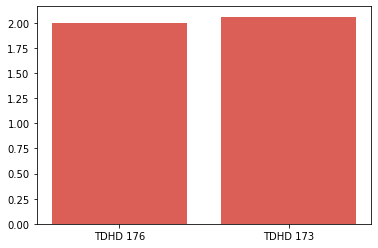

CENG


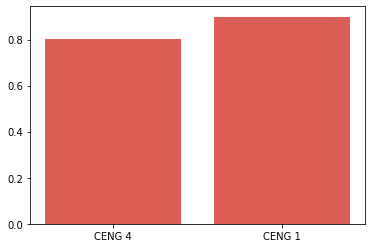

MAE


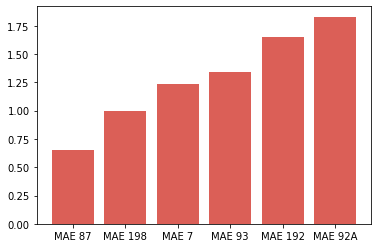

MATH


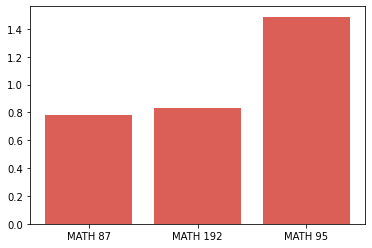

CHIN


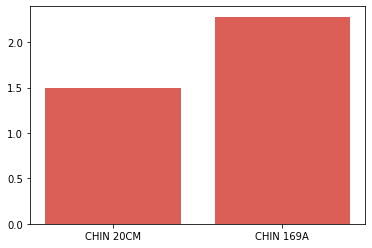

JUDA


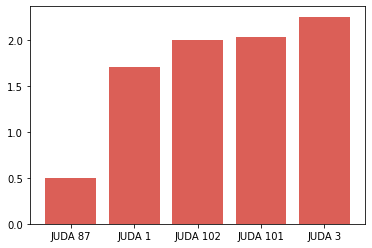

PHIL


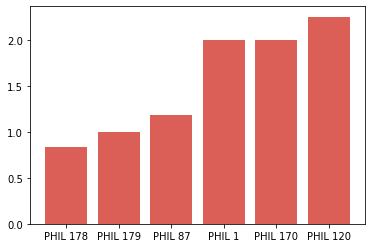

HDP


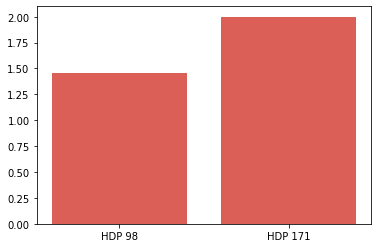

ANSC


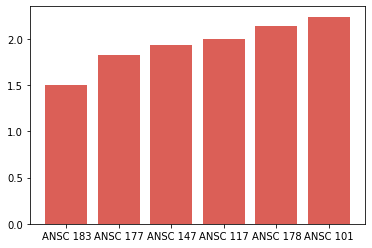

SOCE


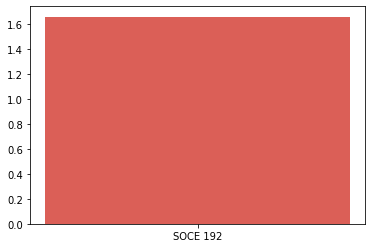

MMW


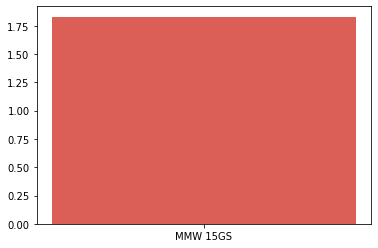

LIAB


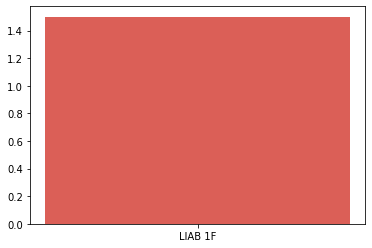

ESYS


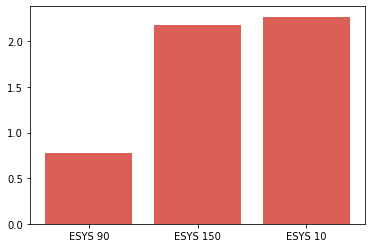

PHYS


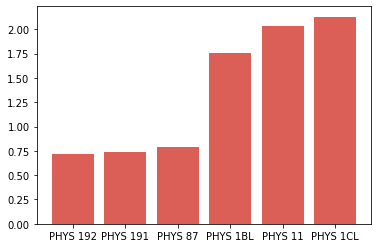

CGS


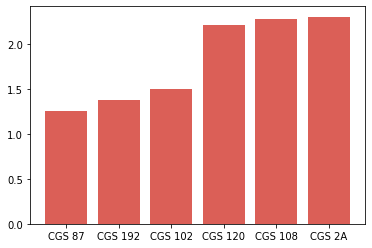

MGT


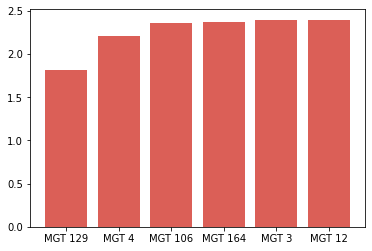

HIUS


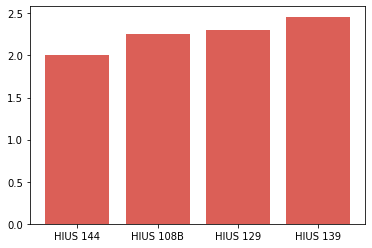

COHI


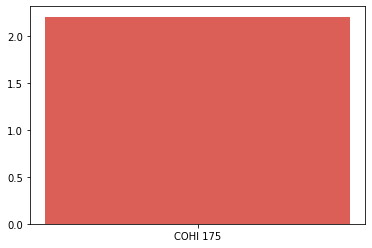

SXTH


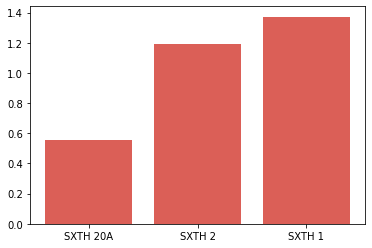

ANPR


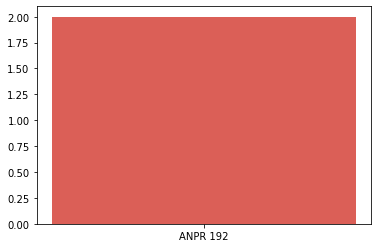

LIGN


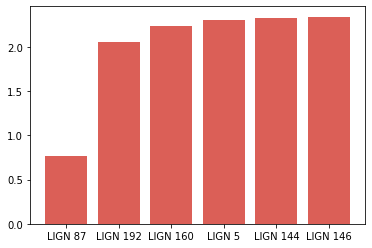

LIHL


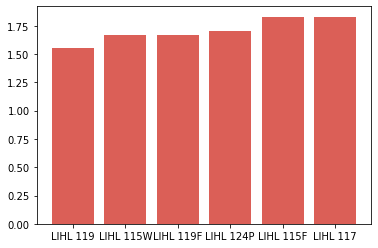

BISP


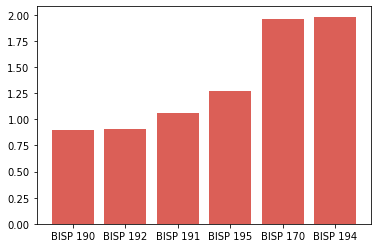

LTFR


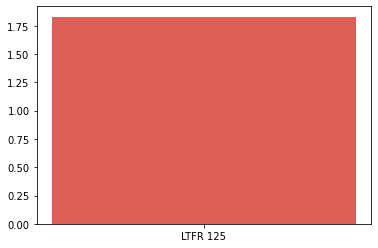

SIO


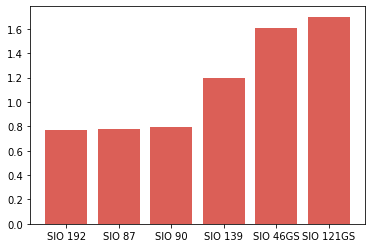

HILD


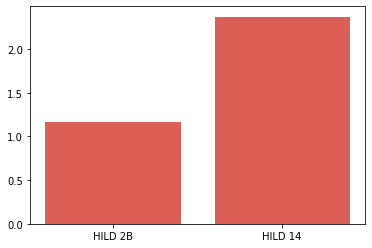

BENG


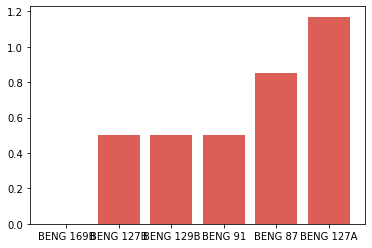

DSGN


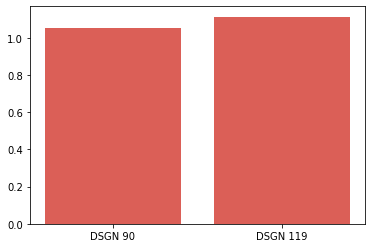

VIS


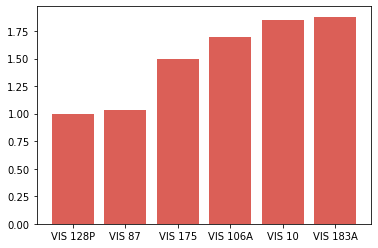

LTWL


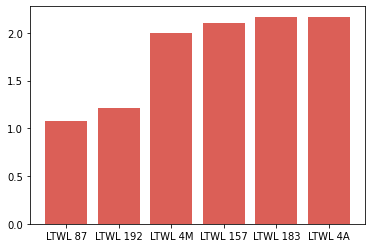

CONT


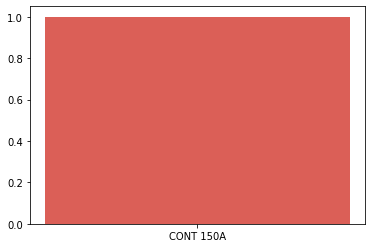

TDPF


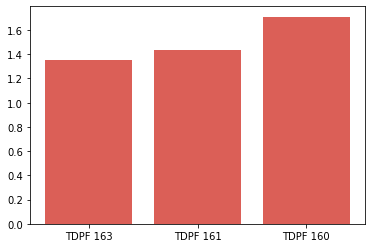

MUS


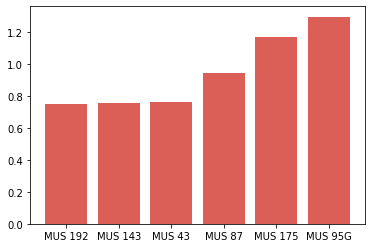

GLBH


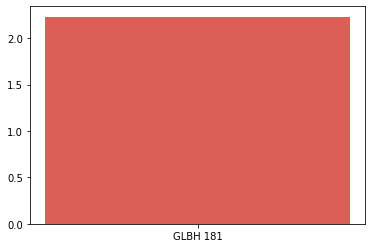

ETHN


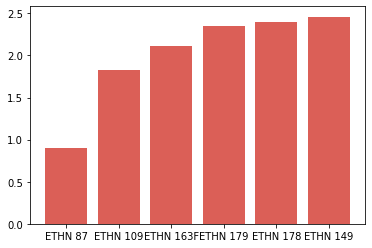

BIMM


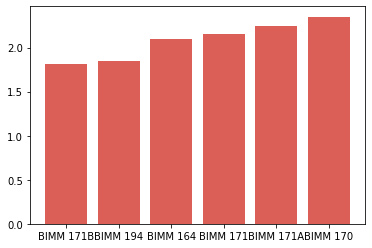

FMPH


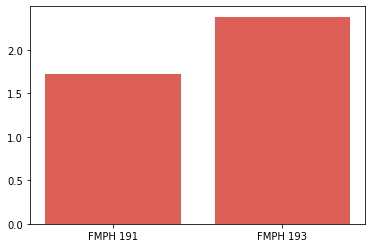

POLI


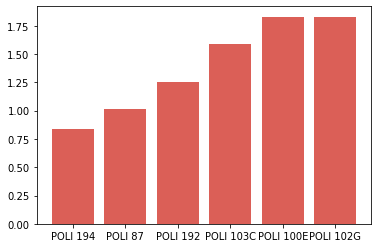

HINE


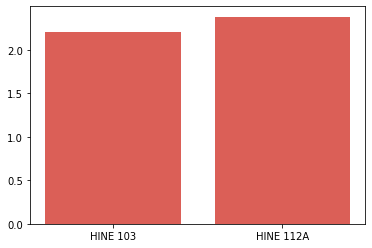

MUIR


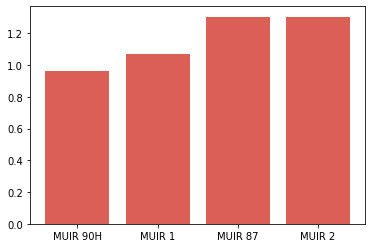

USP


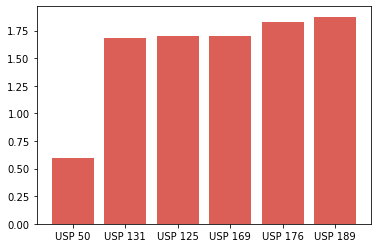

LTEN


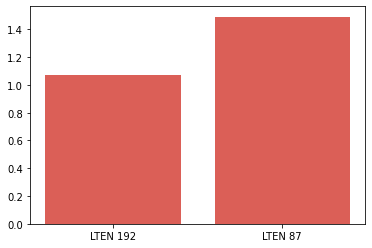

ENVR


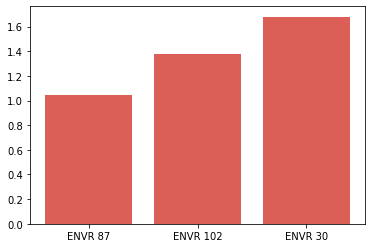

PSYC


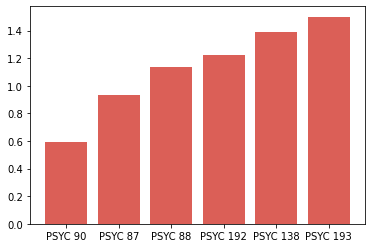

NANO


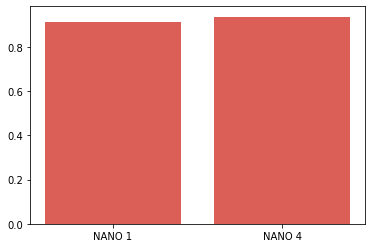

LTAM


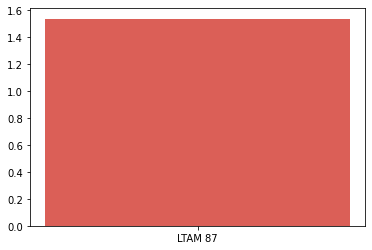

HISC


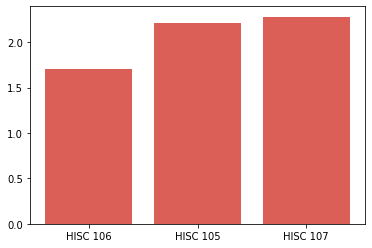

TDGE


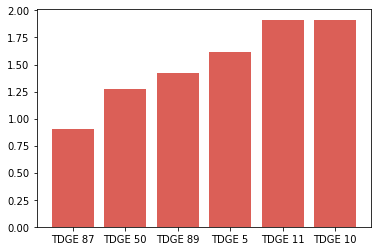

ENG


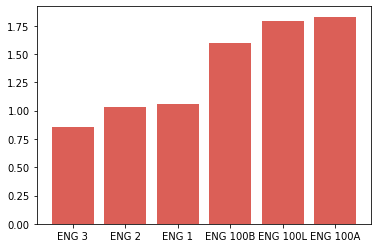

DOC


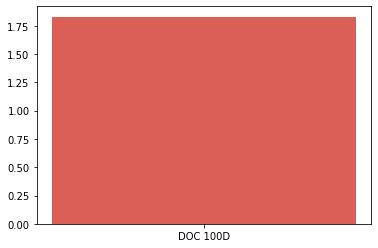

LTWR


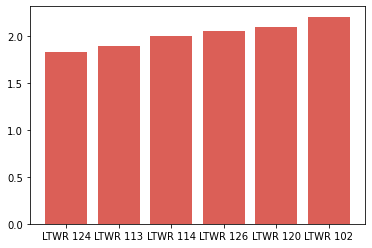

TDDM


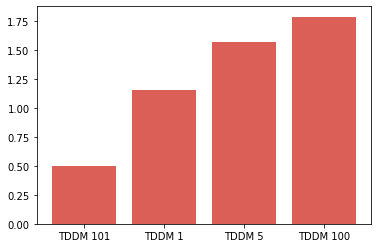

STPA


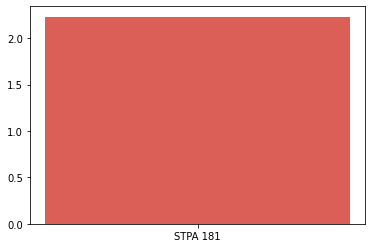

TMC


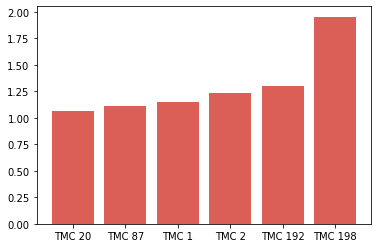

TDDR


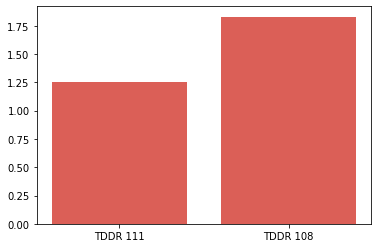

ANAR


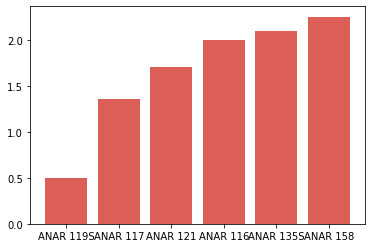

AAS


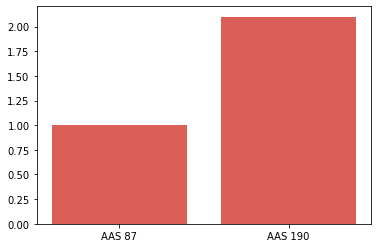

JAPN


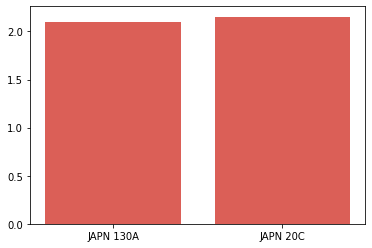

BILD


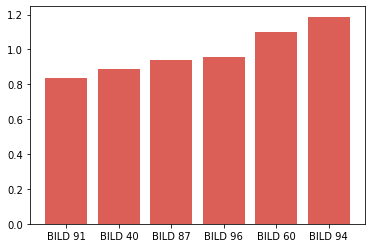

SOCI


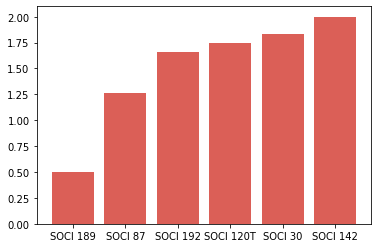

HDS


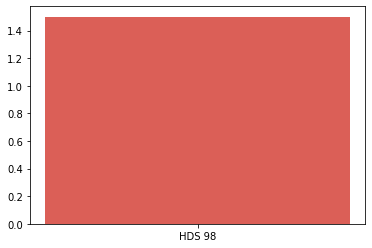

ANTH


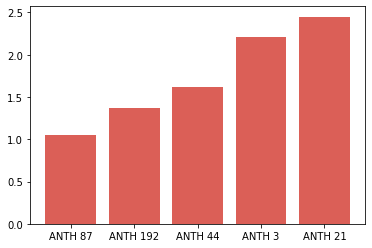

HITO


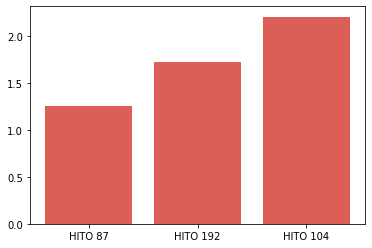

BIBC


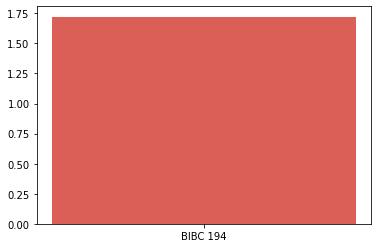

CCS


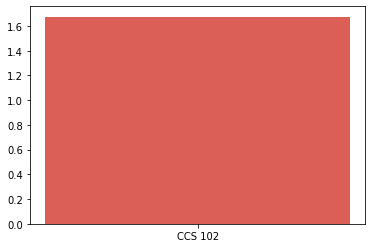

SOCL


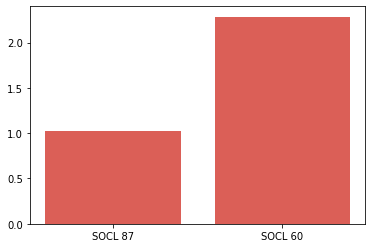

ECE


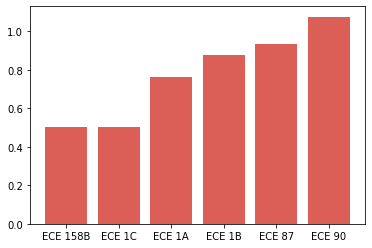

CSE


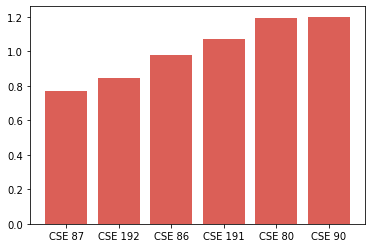

ANBI


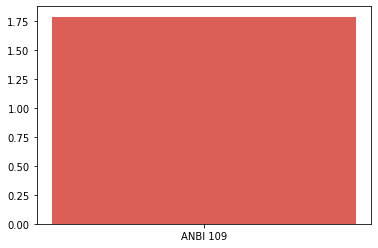

REV


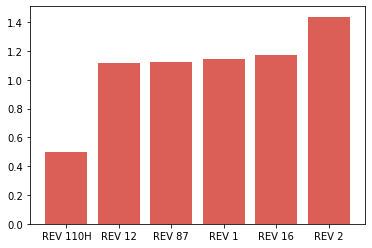

BIPN


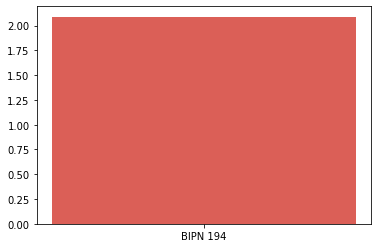

AIP


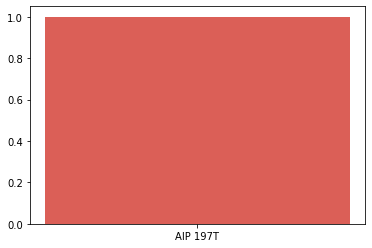

CAT


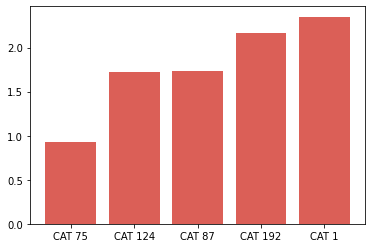

LTCS


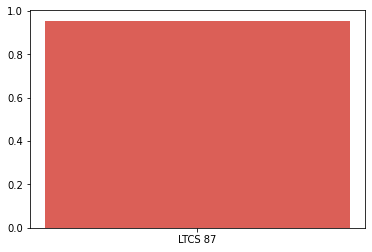

WARR


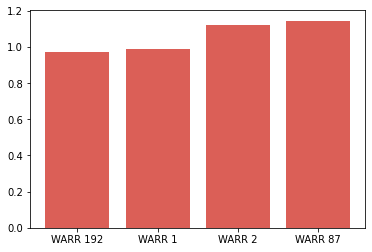

EDS


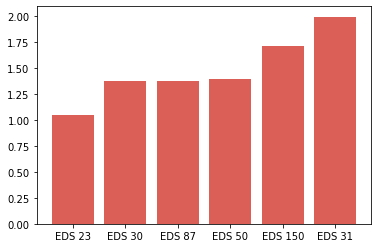

RELI


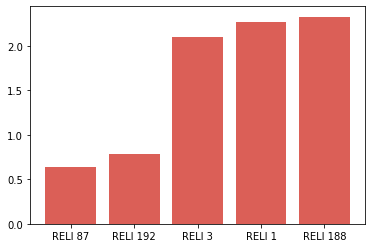

TDAC


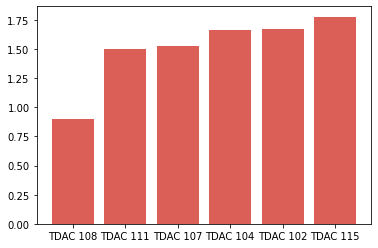

ECON


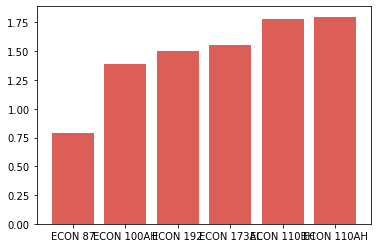

BICD


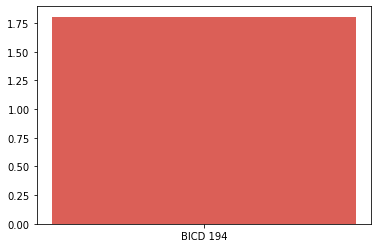

LTRU


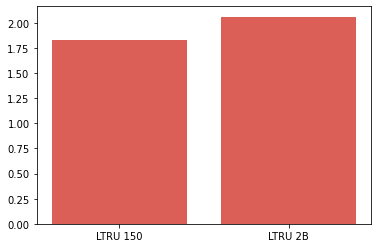

LTGM


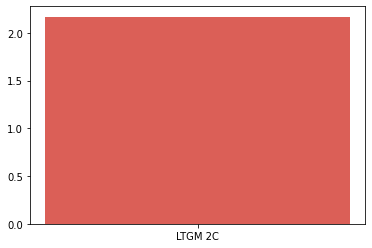

SEV


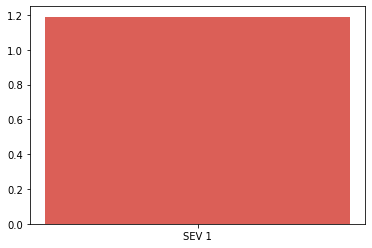

LTIT


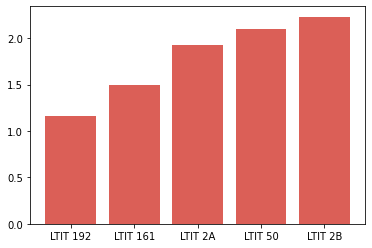

FILM


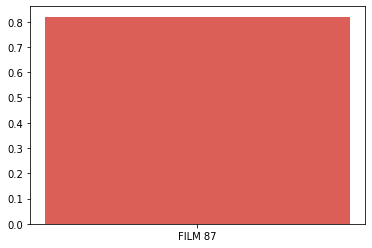

TDMV


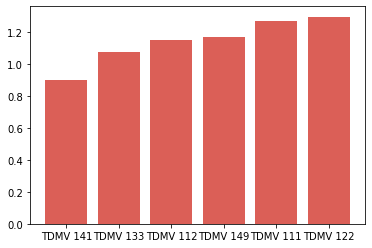

LATI


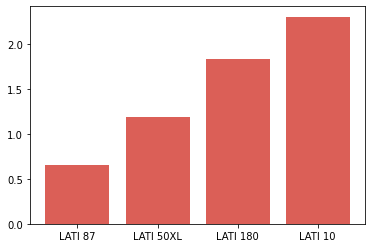

SOCA


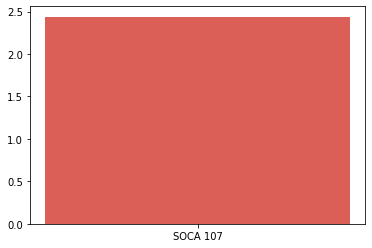

LTKO


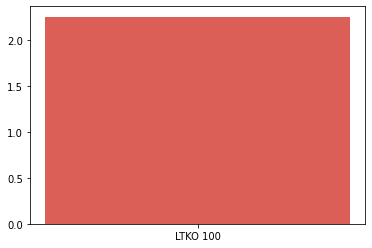

LTSP


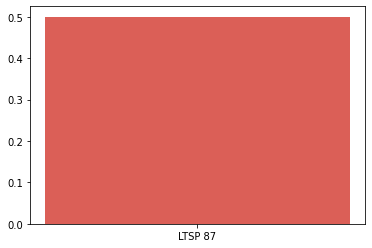

LISP


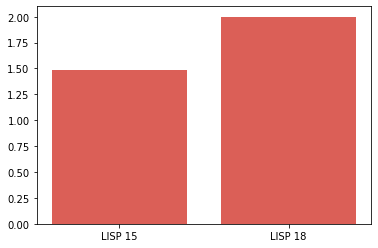

TDHT


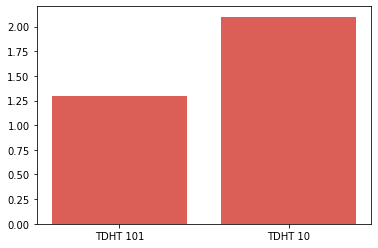

In [17]:
for dep in set(easy_wkload['department'].values):
    easy_wkload_0 = easy_wkload[easy_wkload['department'] == dep].groupby('course').mean().sort_values('hours', ascending=True)[0:6]
    easy_wkload_0=easy_wkload_0.reset_index()
    print(dep)
    plt.figure()
    plt.bar(easy_wkload_0.course, easy_wkload_0.hours)
    plt.show()

In [18]:
"""
Analysis on average gpa
"""
gpa_average = df.groupby(['course'])['gpaAvg'].mean()
gpa_average=gpa_average.reset_index()
top_df = df.groupby('department').mean().sort_values('gpaAvg', ascending=False).head(10) #top 10 gpa group by department
top_df = top_df.dropna()
top_df.head(10)

enrolled      evals   recClass   recInstr     hours    gpaExp  \
department                                                                   
TDCH        13.086957   6.695652  93.173913  91.521739  2.988696  3.945652   
TDPF        14.777778   5.981481  99.388889  98.000000  3.017037  3.987037   
TDDM        23.500000  11.916667  94.000000  94.500000  1.735833  3.916667   
LTIT        17.068493   9.315068  95.726027  96.013699  3.216986  3.753188   
TDMV        28.124138  13.344828  97.781609  95.772414  2.094287  3.919069   
TDHD        15.372093   8.744186  95.441860  98.069767  3.613023  3.821163   
TDPR        33.419355  13.000000  86.451613  96.032258  5.317419  3.910645   
BISP        31.266667  17.300000  95.160000  95.726667  2.559333  3.892708   
TDAC        17.816109   9.544073  98.367781  97.132219  3.782629  3.889255   
ERC         20.232558  12.170543  93.519380  94.186047  1.657132  3.936591   

              gpaAvg  
department            
TDCH        4.000000  
TDPF        3.995455  
TDDM        3.978571  
LTIT        3.891154  
TDMV        3.885944  
TDHD        3.844444  
TDPR        3.842069  
BISP        3.809875  
TDAC        3.800700  
ERC         3.795000

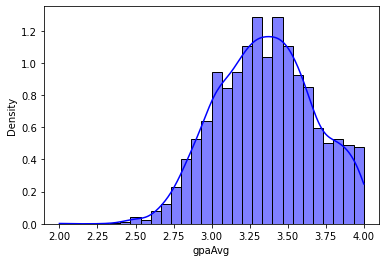

In [19]:
sns.set_palette("hls")
sns.histplot(gpa_average.gpaAvg,stat="density",color="blue",bins=30,kde=True)
plt.show()

In [20]:
#A class (A- ~ A+)
A_gpa = df[df['gpaAvg']>=3.7]
A_gpa.groupby(['department','course'])['gpaAvg'].count()

department  course   
AAS         AAS 10       1
ANAR        ANAR 100     3
            ANAR 114     1
            ANAR 135S    1
            ANAR 146     1
                        ..
VIS         VIS 60       7
            VIS 70N      4
            VIS 80       3
            VIS 84       1
WCWP        WCWP 100     3
Name: gpaAvg, Length: 1389, dtype: int64

DSC


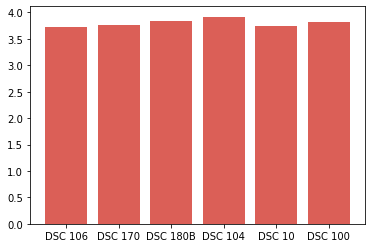

COMM


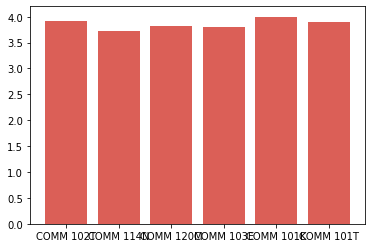

HIEU


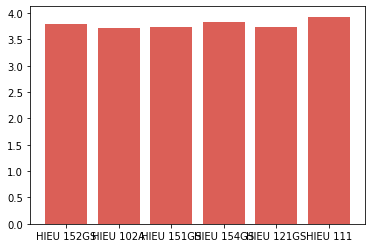

SE


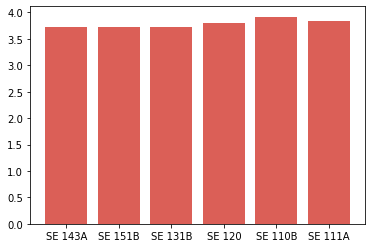

LTEU


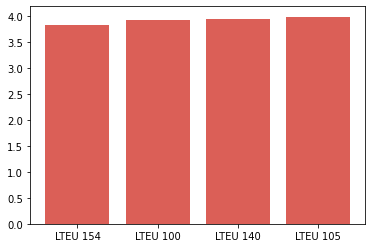

TDDE


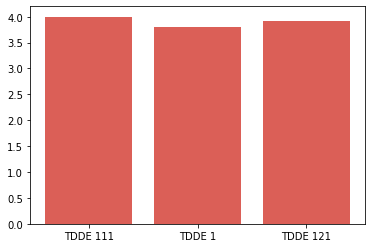

FPMU


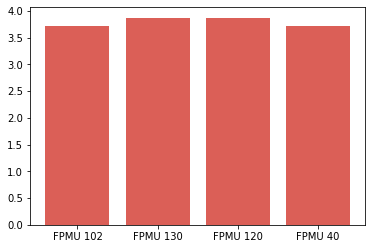

BIEB


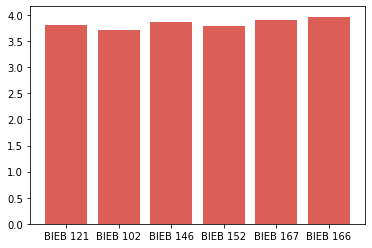

CHEM


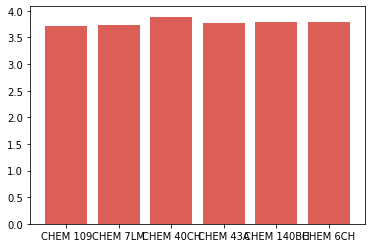

ICAM


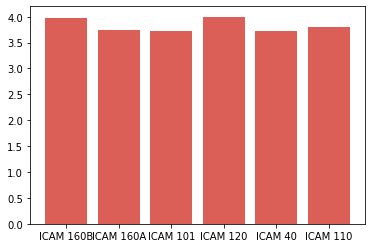

TDCH


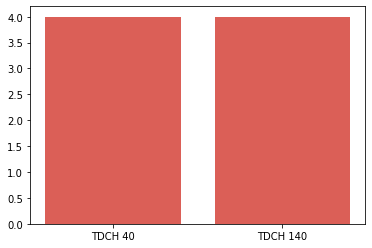

TDPR


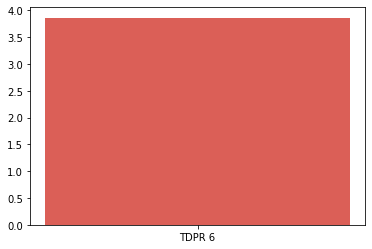

TDPW


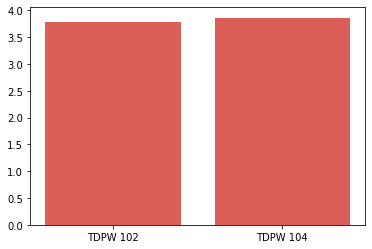

COGS


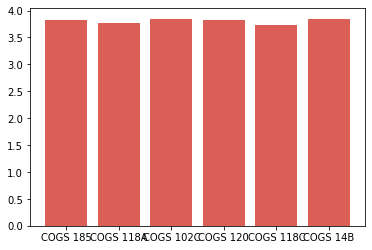

ERC


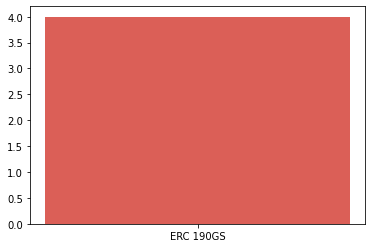

SOCD


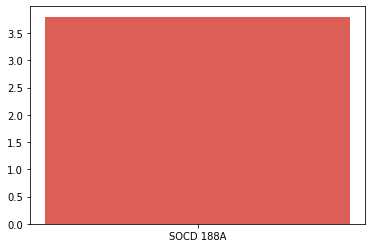

TDTR


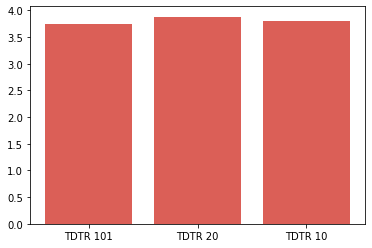

HIEA


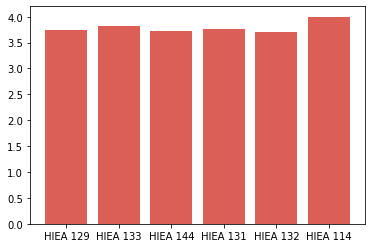

TDHD


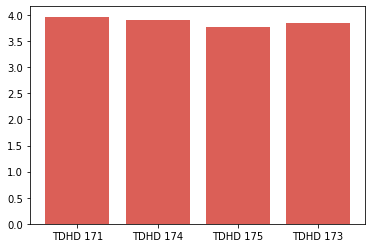

CENG


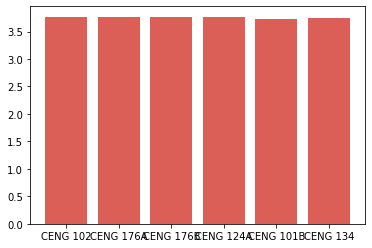

MAE


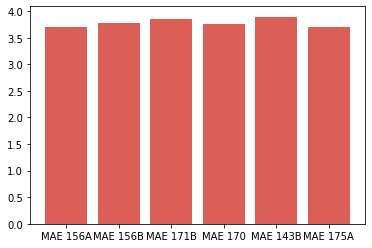

MATH


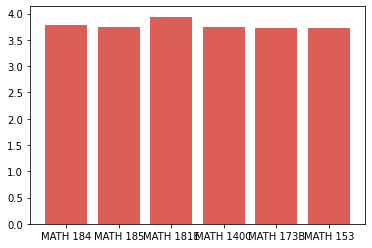

CHIN


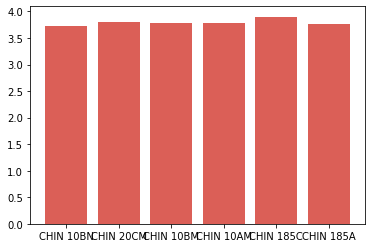

JUDA


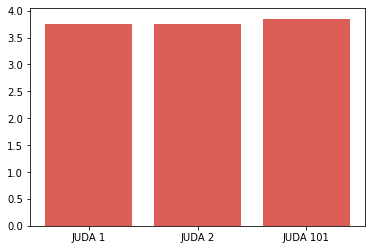

PHIL


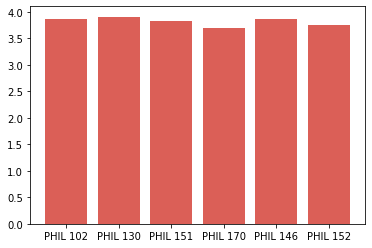

HDP


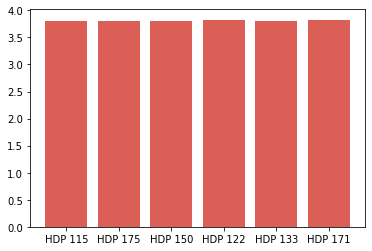

ANSC


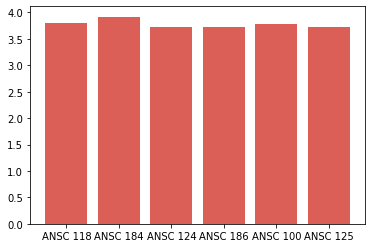

AWP


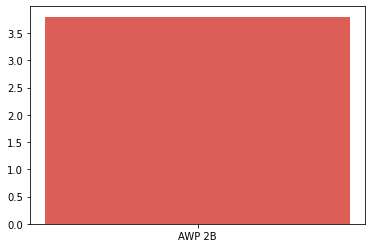

MMW


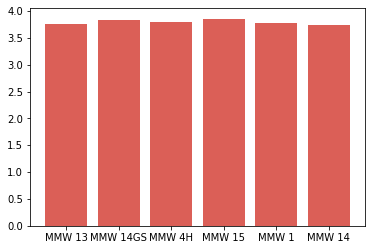

ESYS


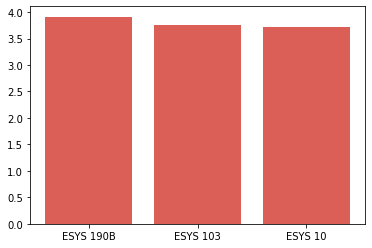

PHYS


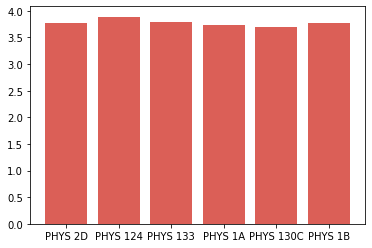

CGS


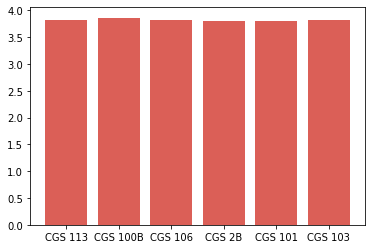

MGT


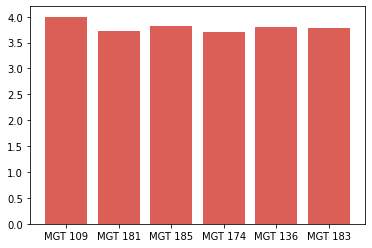

HIUS


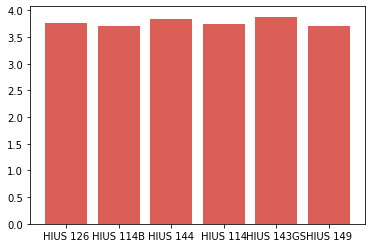

HUM


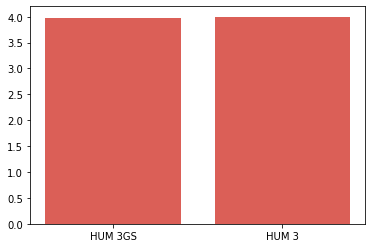

COHI


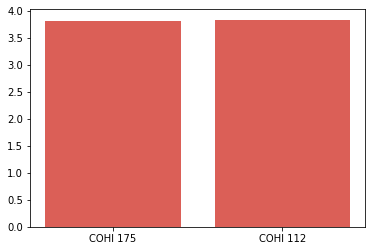

LTCH


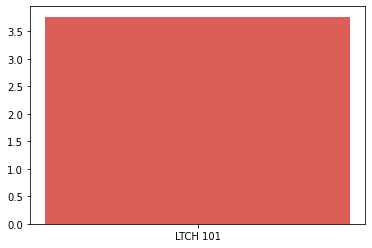

LIGN


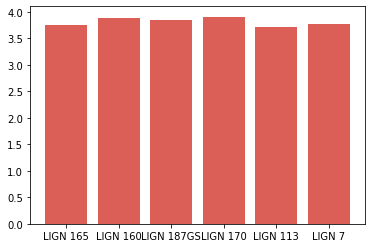

LIHL


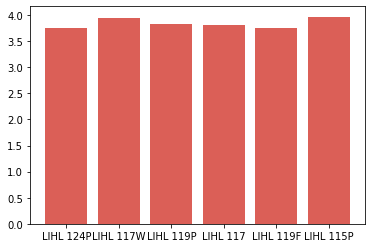

BISP


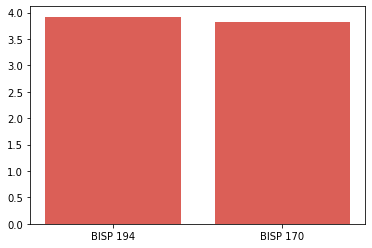

LTFR


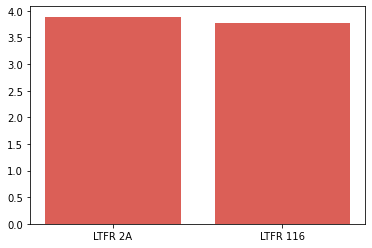

SIO


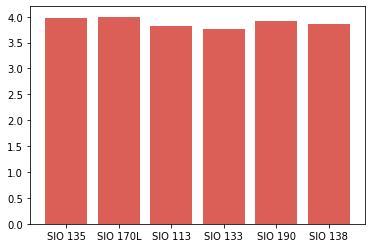

HILD


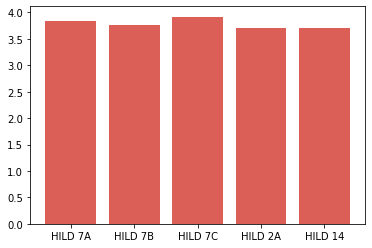

BENG


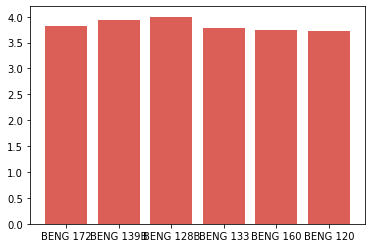

DSGN


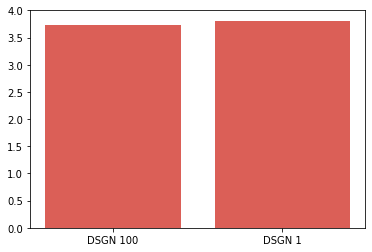

VIS


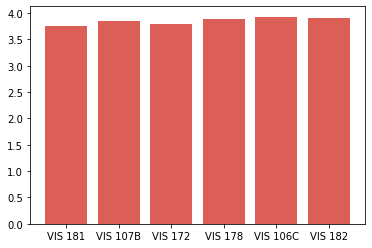

LTWL


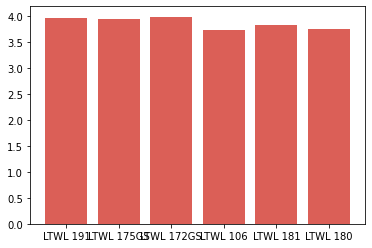

TDPF


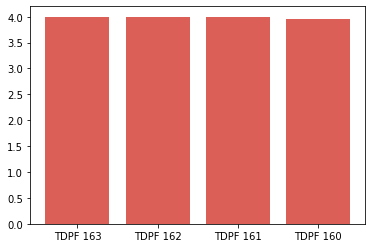

MUS


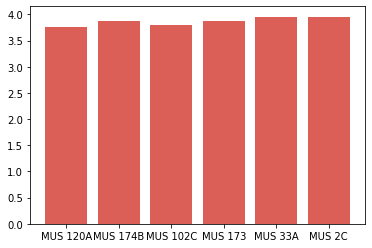

GLBH


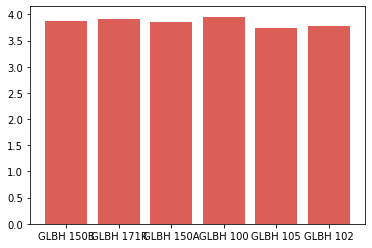

ETHN


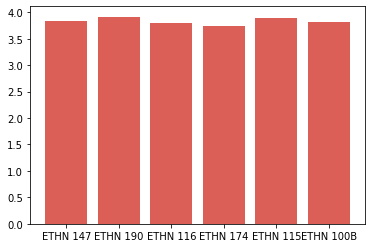

BIMM


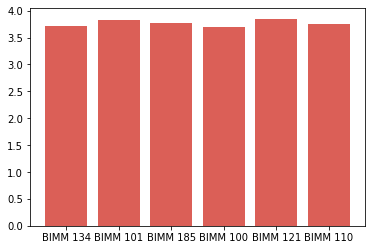

FMPH


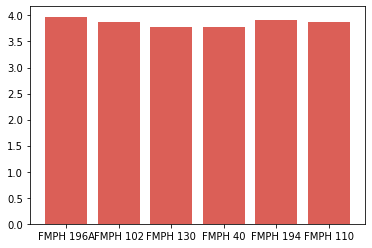

POLI


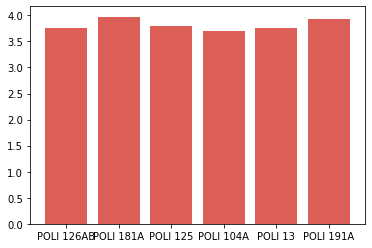

HINE


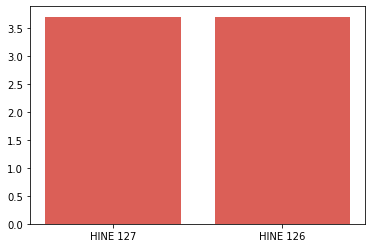

USP


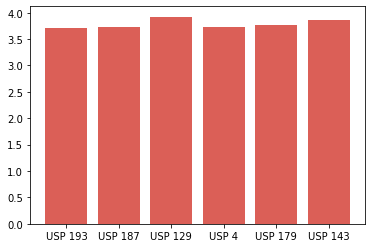

LTEN


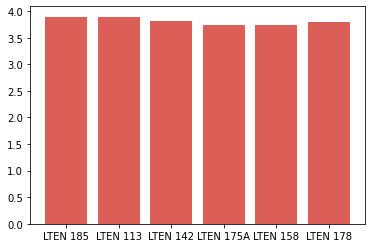

ENVR


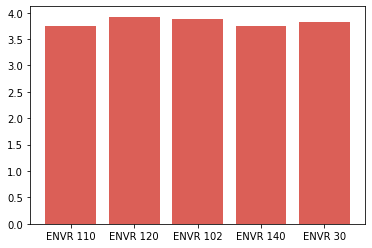

PSYC


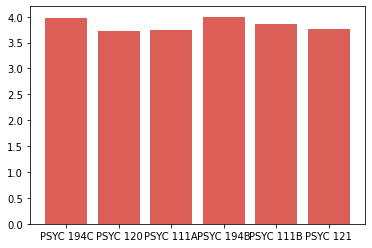

COMT


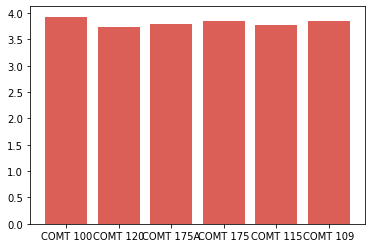

NANO


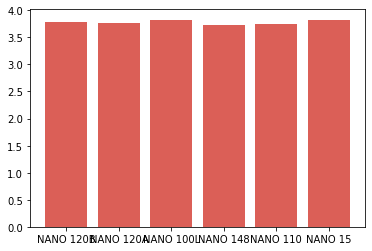

LTAM


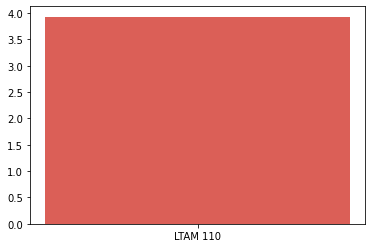

HISC


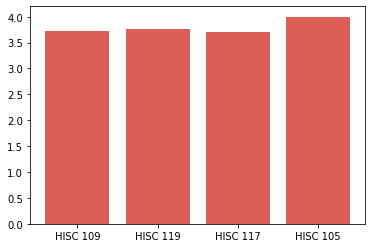

WCWP


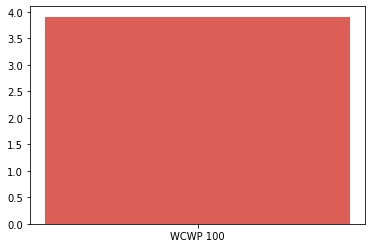

TDGE


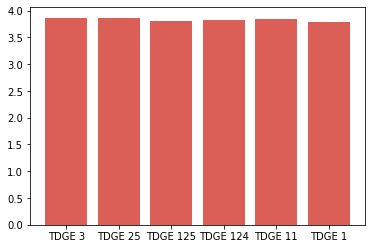

LTGK


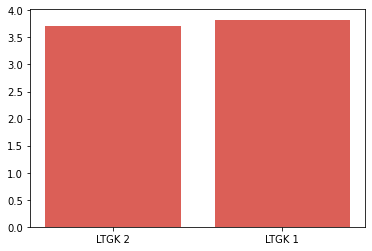

ENG


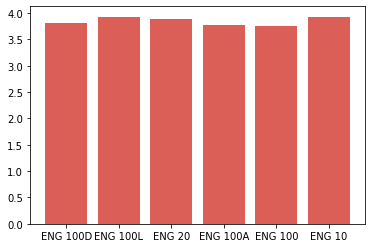

DOC


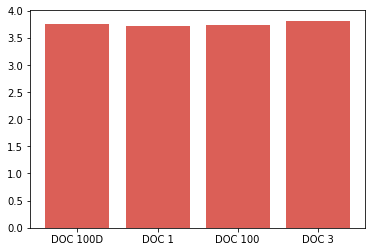

LTWR


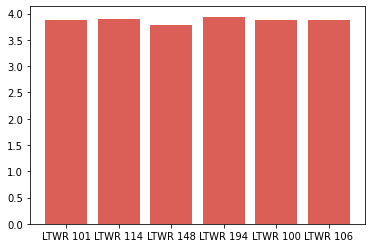

TDDM


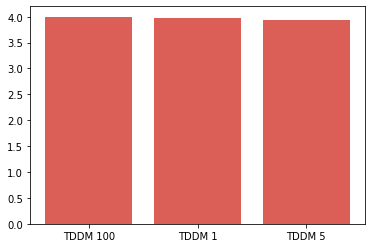

COCU


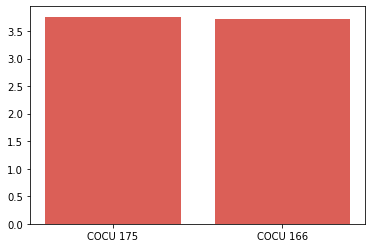

COGN


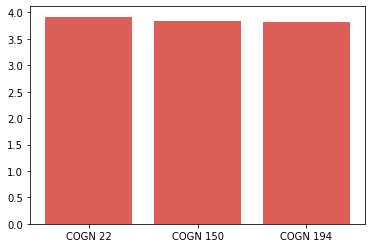

TMC


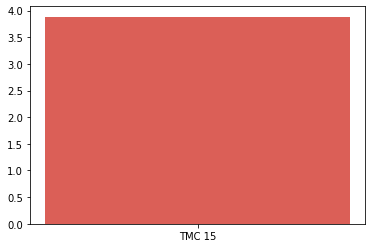

TDDR


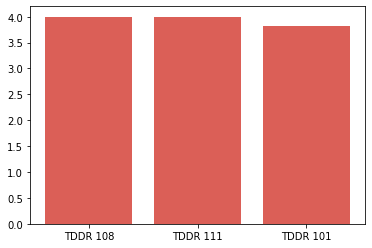

ANAR


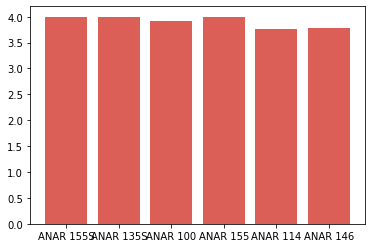

INTL


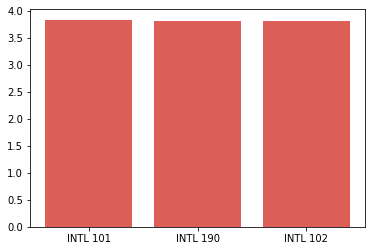

AAS


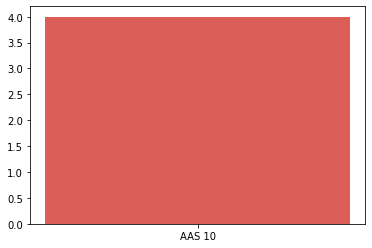

JAPN


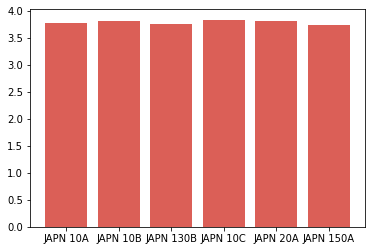

BILD


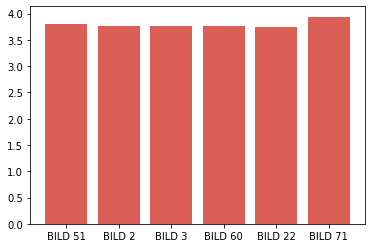

SOCI


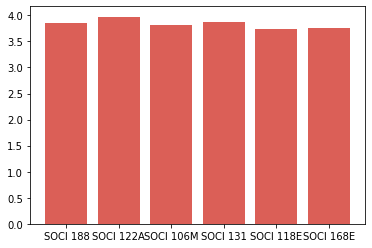

HDS


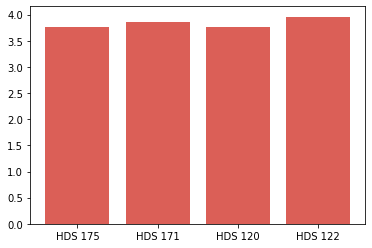

TWS


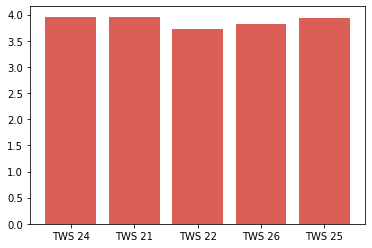

ANTH


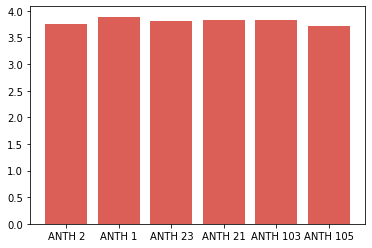

HITO


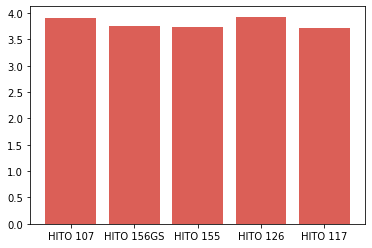

BIBC


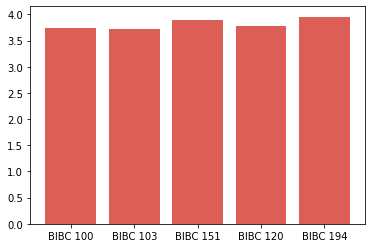

ECE


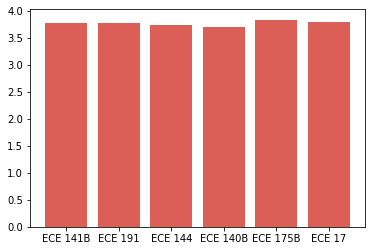

LTTH


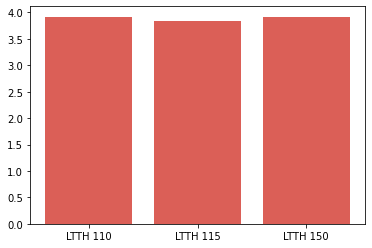

CSE


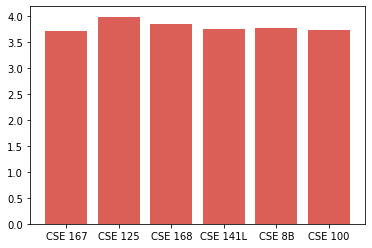

ANBI


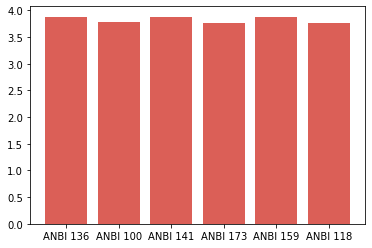

LTLA


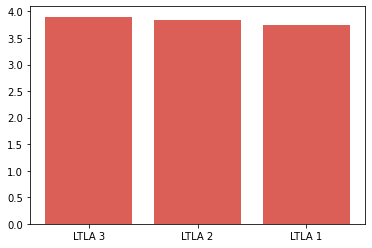

BIPN


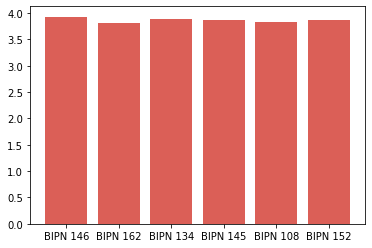

LTEA


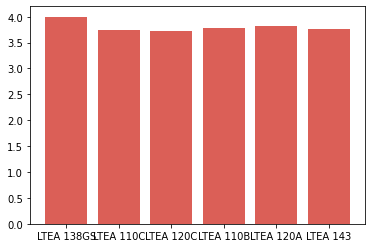

CAT


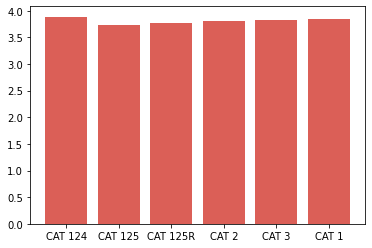

LTCS


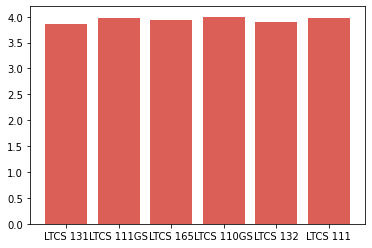

CSS


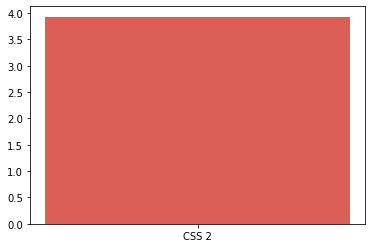

EDS


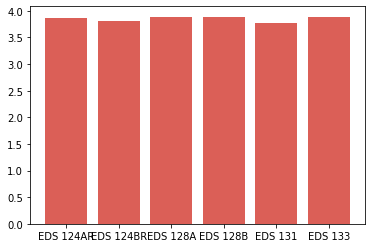

HIAF


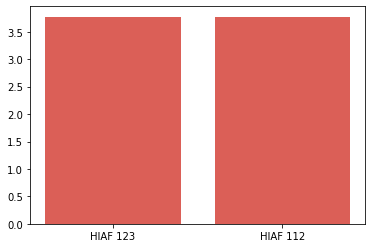

RELI


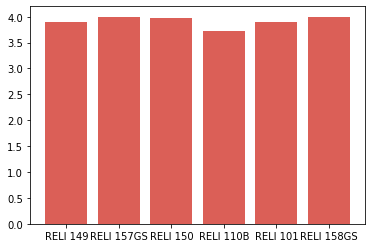

TDAC


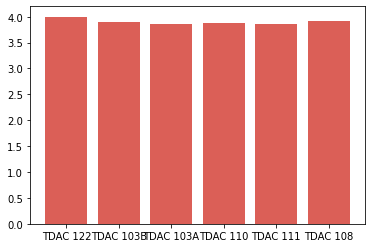

ECON


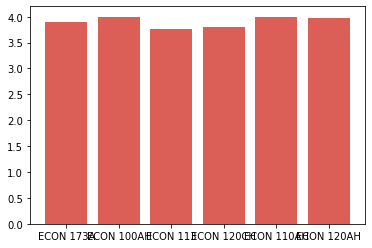

BICD


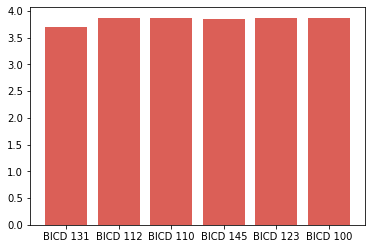

LTRU


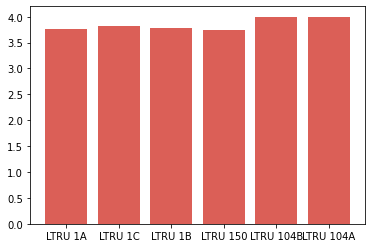

LTGM


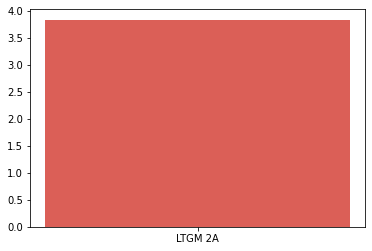

LTIT


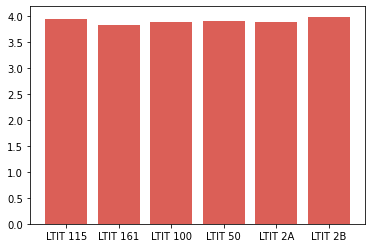

TDMV


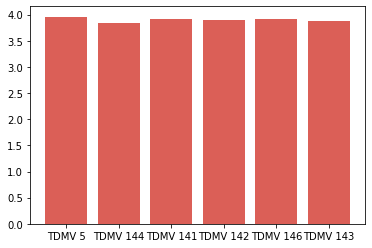

LATI


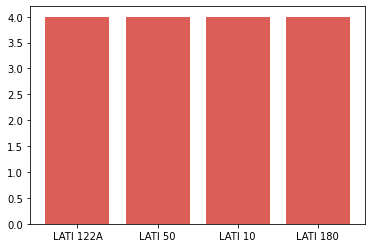

SOCA


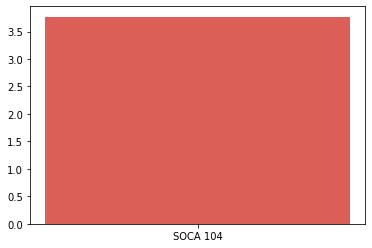

LTKO


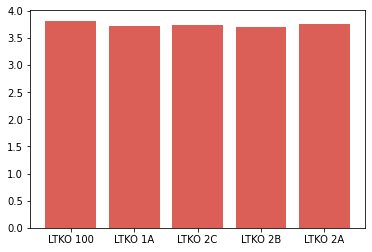

LTSP


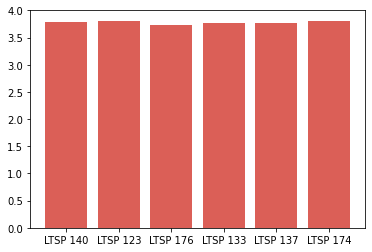

TDHT


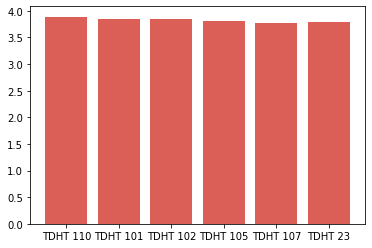

HILA


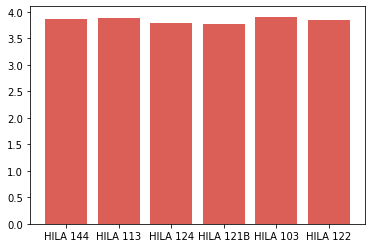

In [21]:
for dep in set(A_gpa['department'].values):
    A_gpa_0 = A_gpa[A_gpa['department'] == dep].groupby('course').mean().sort_values('hours', ascending=False)[0:6]
    A_gpa_0=A_gpa_0.reset_index()
    print(dep)
    plt.figure()
    plt.bar(A_gpa_0.course, A_gpa_0.gpaAvg)
    plt.show()

## Analysis of learning efficiency(ratio of gpa and workload)

In [22]:
"""
correlations
"""
learning_efficient = df[['department','course','hours','gpaAvg']]
learning_efficient.head(10)

department    course  hours  gpaAvg
0        AAS    AAS 10   4.50    3.33
1        AAS   AAS 190   2.10     NaN
2        AIP  AIP 197T   4.06     NaN
3       ANAR  ANAR 120   2.50     NaN
4       ANAR  ANAR 121   6.50     NaN
5       ANAR  ANAR 146   4.00    3.79
6       ANBI  ANBI 118   2.77    3.77
7       ANBI  ANBI 121   2.72     NaN
8       ANBI  ANBI 136   5.17    2.99
9       ANBI  ANBI 141   3.75    3.87

In [23]:
general_cor = learning_efficient[['hours','gpaAvg']].corr()
general_cor

hours    gpaAvg
hours   1.000000 -0.294634
gpaAvg -0.294634  1.000000

In [24]:
"""
by department
"""
from math import isnan
cor_list = {}
for dep in set(learning_efficient['department'].values):
    general_cor = learning_efficient[learning_efficient['department'] == dep][['hours','gpaAvg']].corr()
    cor_list[dep] = general_cor.iloc[1,0]
cor_list = {k: v for k, v in cor_list.items() if not isnan(v)}
cor_list

{'DSC': -0.36092943699503427,
 'COMM': 0.0024491354582867044,
 'HIEU': 0.03779280188078247,
 'SE': 0.03465063596623521,
 'LTEU': -0.45215634428144125,
 'TDDE': -0.07284451618905458,
 'FPMU': -0.19317538998591588,
 'BIEB': 0.15750109010316005,
 'CHEM': -0.18715484380033848,
 'ICAM': 0.05655594616305909,
 'TDPR': 0.26270721560186366,
 'TDPW': -0.6309174317393267,
 'COGS': 0.14645239188487388,
 'ERC': -0.9999999999999992,
 'SOCD': 0.4034661724172995,
 'TDHD': -0.0998666939938364,
 'HIEA': 0.17246575198555264,
 'TDTR': -0.2720801963664008,
 'CENG': -0.17708061684328416,
 'MAE': 0.15325952161727835,
 'MATH': -0.002316504150453796,
 'CHIN': -0.15564232195274813,
 'JUDA': -0.3369840384337402,
 'PHIL': 0.025798988778305547,
 'HDP': -0.5444241414383588,
 'ANSC': -0.24719107625255127,
 'AWP': -0.24795971046093074,
 'SOCE': 0.8208382339385786,
 'MMW': -0.22143995329041824,
 'ESYS': 0.4344498141702536,
 'PHYS': -0.26237220726617017,
 'CGS': -0.06774197852369596,
 'MGT': -0.18532258682274966,
 'HIU

<BarContainer object of 10 artists>

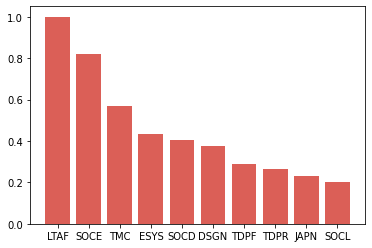

In [25]:
"""
select the most positive correlation departments, in which your gpa could better reflect your efforts
"""
top_positive_corr = {k: v for k, v in sorted(cor_list.items(), key=lambda item: item[1], reverse = True) if v > 0.2}
plt.bar(top_positive_corr.keys(),top_positive_corr.values())


In [26]:
"""
analysis the ratio of hours and gpas --> gpaAvg / hours
"""
gh_ratio = learning_efficient.copy()
gh_ratio['ratio'] = gh_ratio['gpaAvg']/ gh_ratio['hours']
gh_ratio = gh_ratio.dropna()
gh_ratio.head(10)

department    course  hours  gpaAvg     ratio
0         AAS    AAS 10   4.50    3.33  0.740000
5        ANAR  ANAR 146   4.00    3.79  0.947500
6        ANBI  ANBI 118   2.77    3.77  1.361011
8        ANBI  ANBI 136   5.17    2.99  0.578337
9        ANBI  ANBI 141   3.75    3.87  1.032000
12       ANSC  ANSC 121   3.83    3.91  1.020888
13       ANSC  ANSC 122   4.90    3.30  0.673469
14       ANSC  ANSC 124   5.50    3.53  0.641818
15       ANSC  ANSC 133   3.27    3.62  1.107034
16       ANSC  ANSC 144   4.42    3.80  0.859729

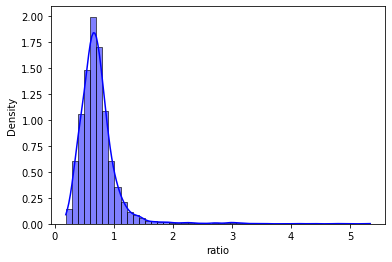

In [27]:
ratio_average = gh_ratio.groupby(['course'])['ratio'].mean()
ratio_average=ratio_average.reset_index()
sns.set_palette("hls")
sns.histplot(ratio_average.ratio,stat="density",color="b",bins=50,kde=True)
plt.show()

we can see for most of courses, you can achieve 0.4~1.0 point of gpa per learning hour per week, then we want to choose the ones having higher efficient for obtaining gpa.

DSC


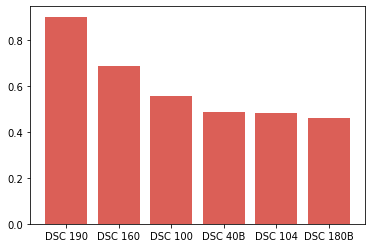

COMM


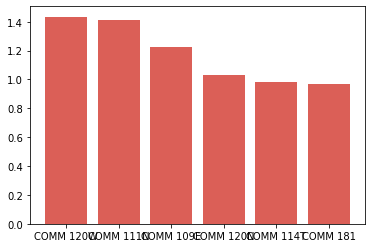

HIEU


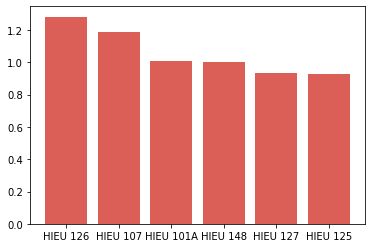

SE


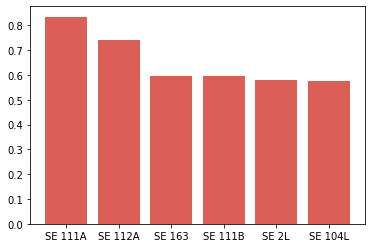

LTEU


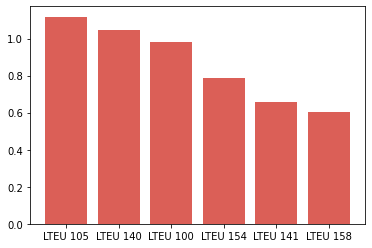

TDDE


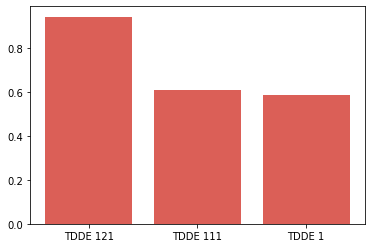

FPMU


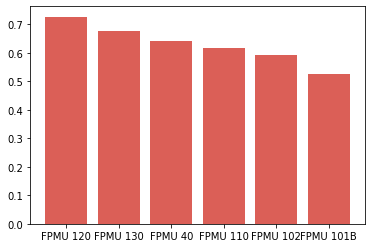

BIEB


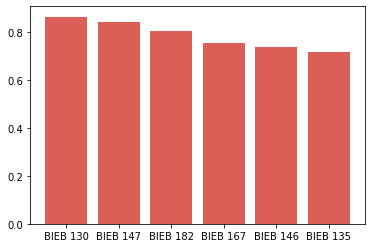

CHEM


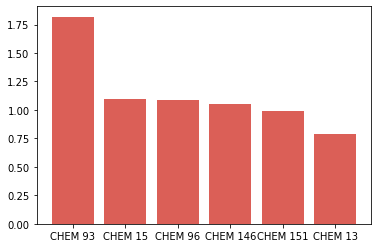

ICAM


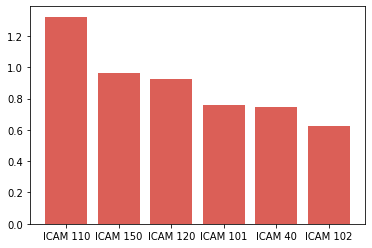

TDCH


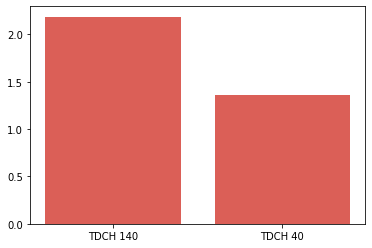

TDPR


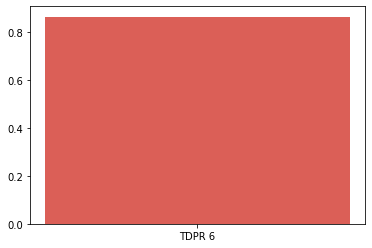

TDPW


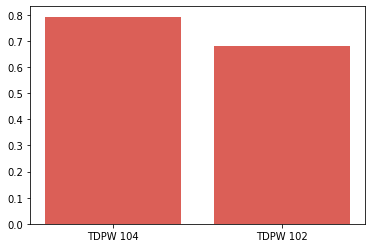

COGS


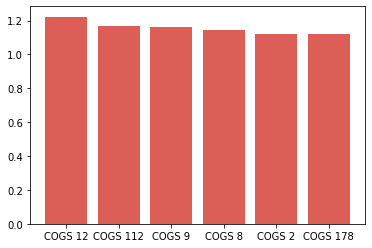

ERC


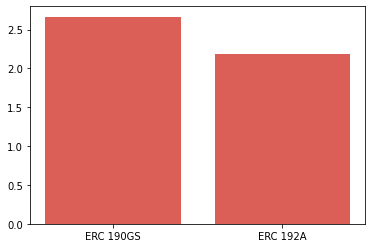

SOCD


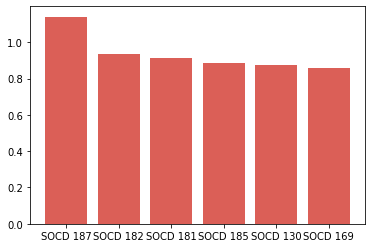

TDTR


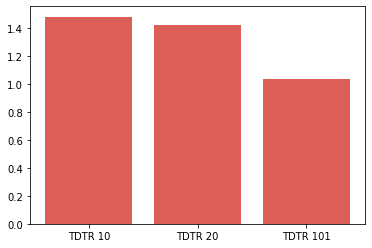

HIEA


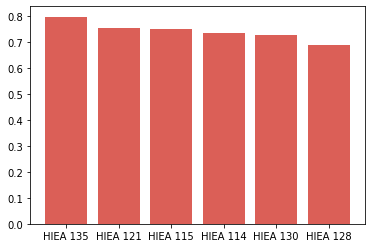

TDHD


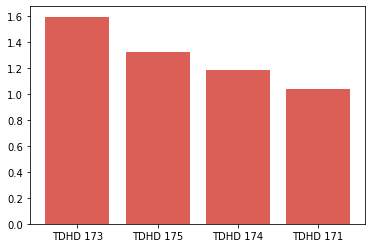

CENG


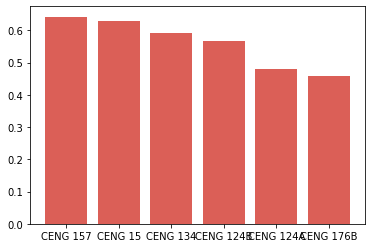

MAE


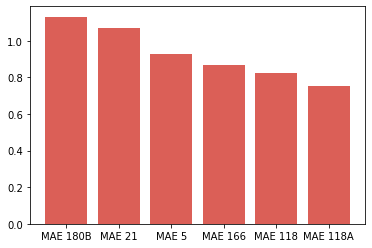

MATH


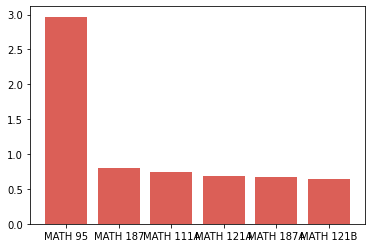

CHIN


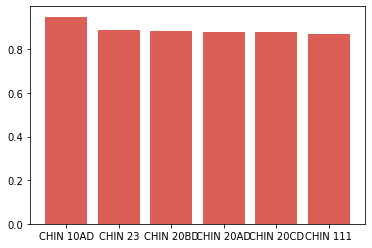

JUDA


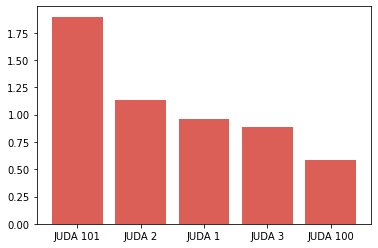

PHIL


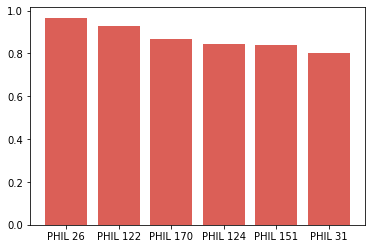

HDP


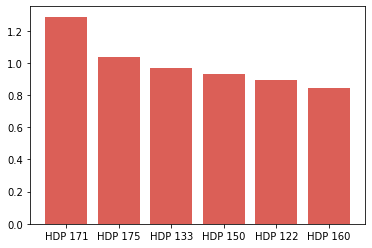

ANSC


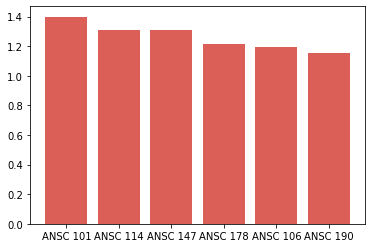

AWP


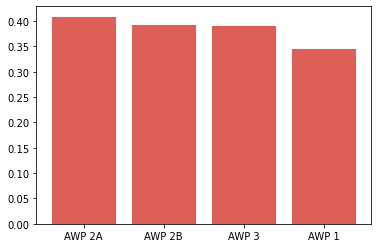

SOCE


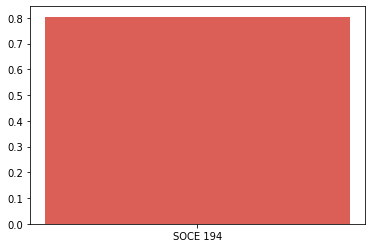

MMW


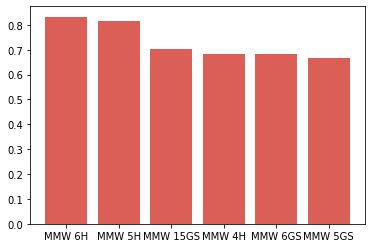

ESYS


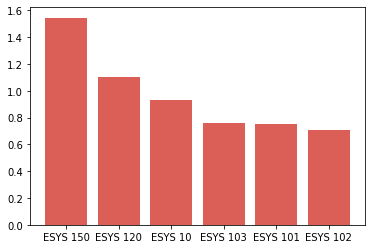

PHYS


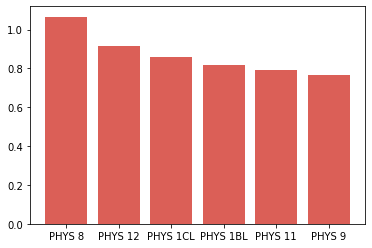

CGS


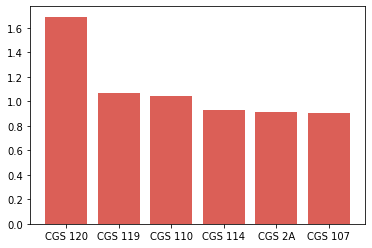

MGT


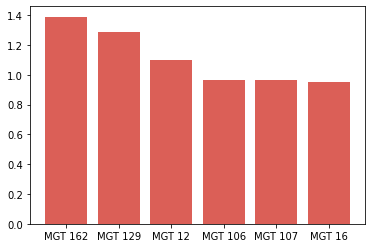

HIUS


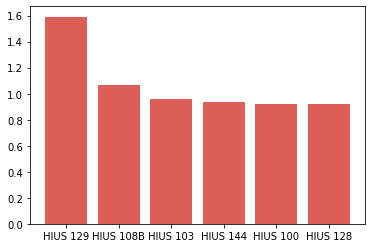

HUM


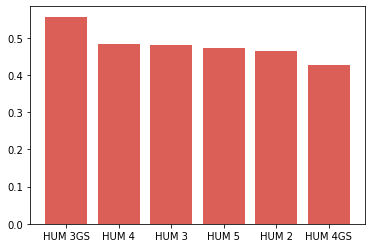

COHI


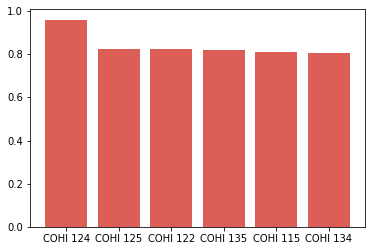

LTCH


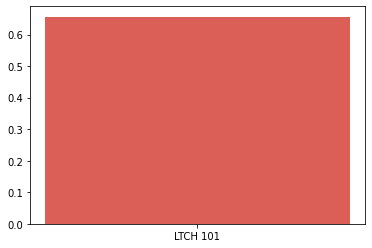

LIGN


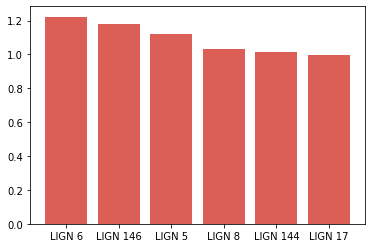

LIHL


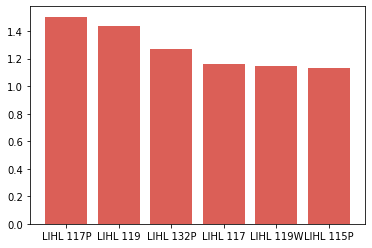

BISP


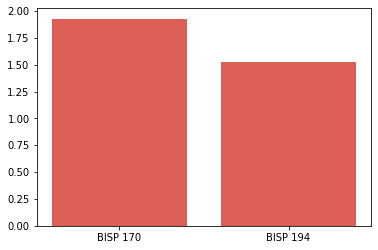

LTFR


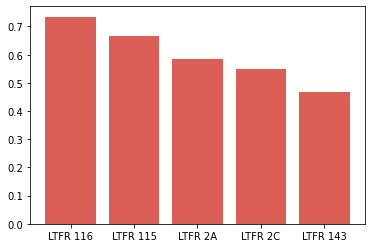

HILD


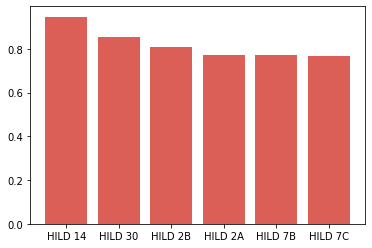

SIO


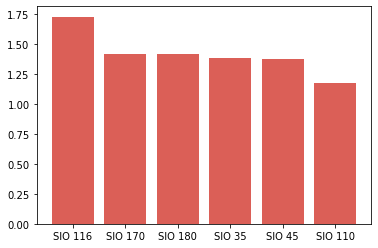

BENG


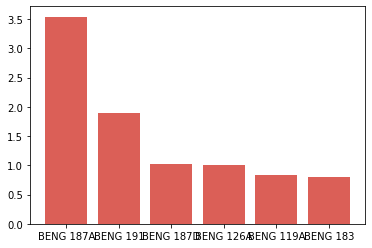

DSGN


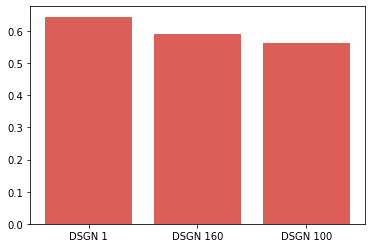

VIS


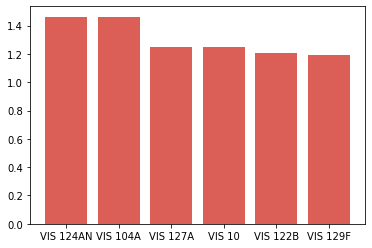

LTWL


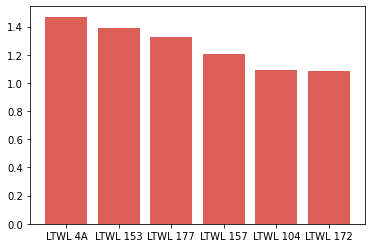

TDPF


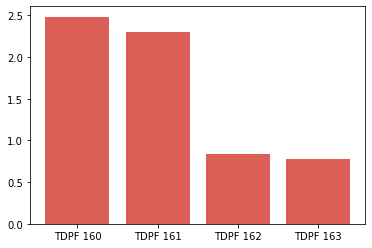

MUS


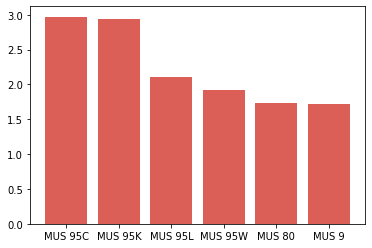

GLBH


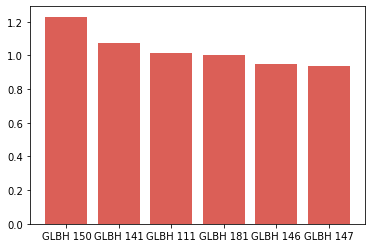

ETHN


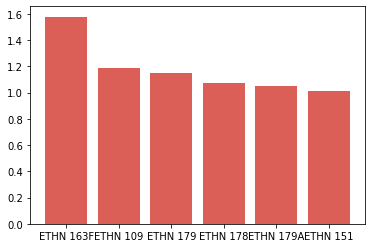

BIMM


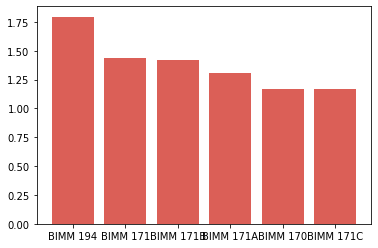

FMPH


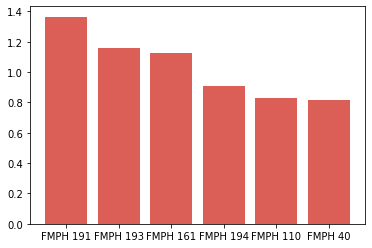

POLI


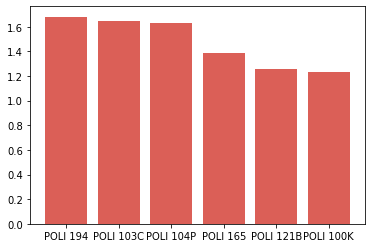

HINE


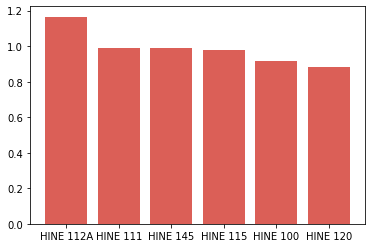

USP


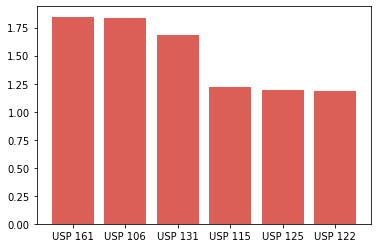

LTEN


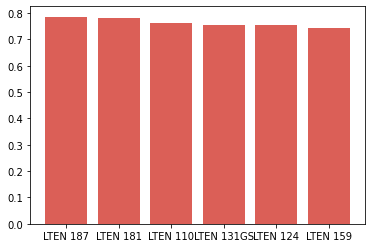

ENVR


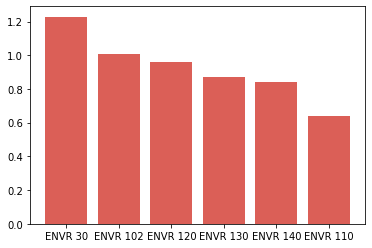

PSYC


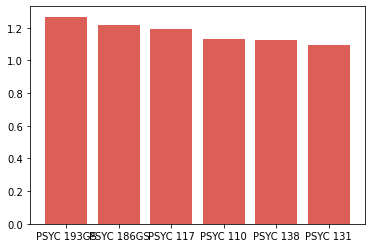

COMT


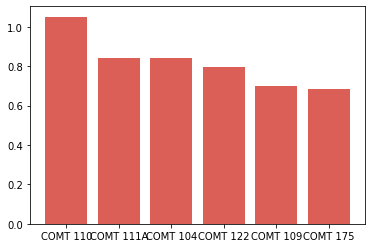

LTAM


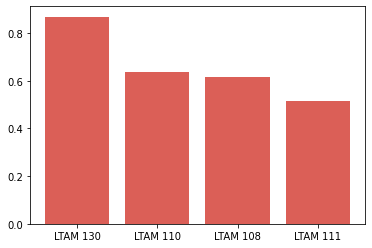

NANO


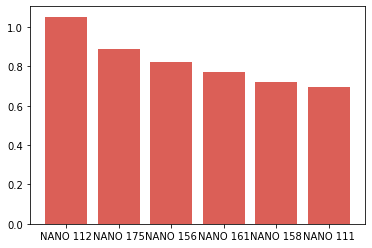

HISC


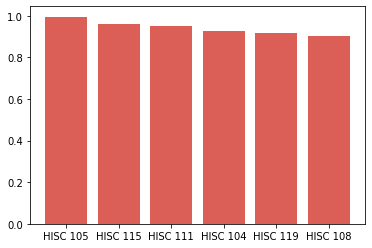

SOCB


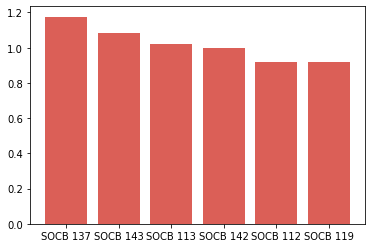

WCWP


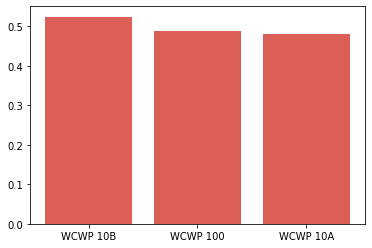

TDGE


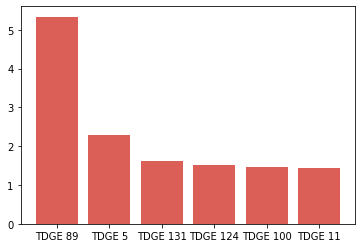

LAWS


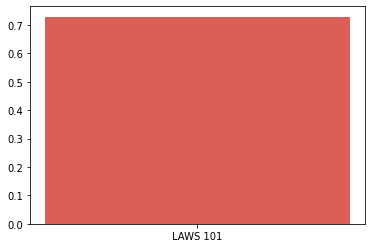

LTGK


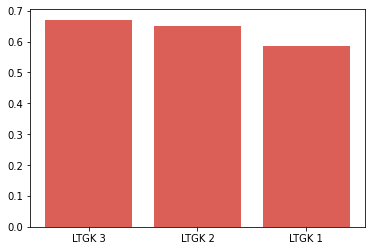

ENG


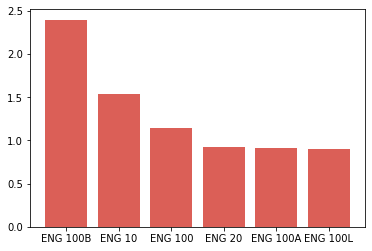

DOC


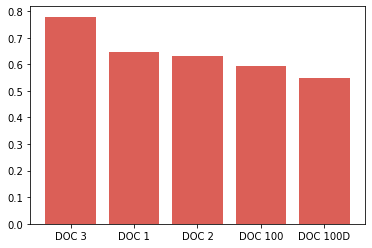

LTWR


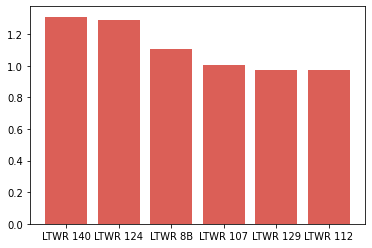

TDDM


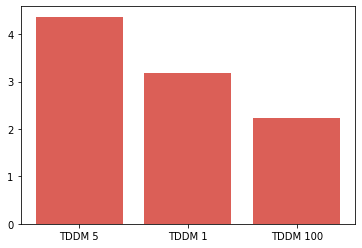

HMNR


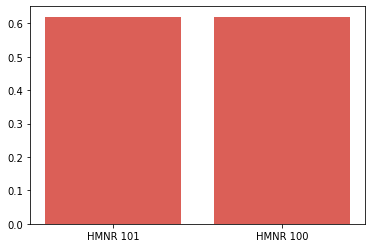

COCU


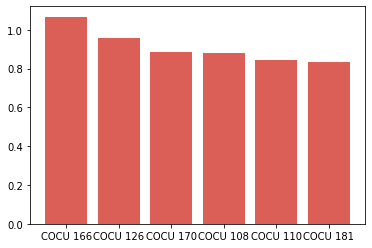

COGN


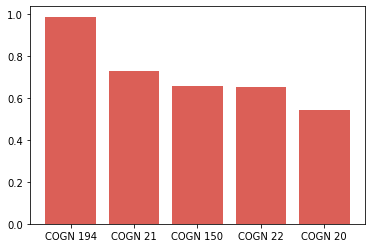

STPA


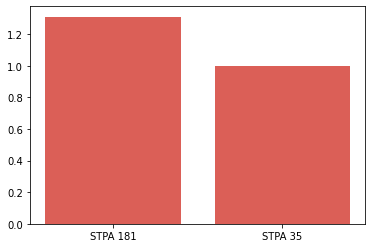

TMC


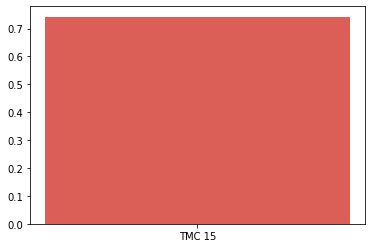

TDDR


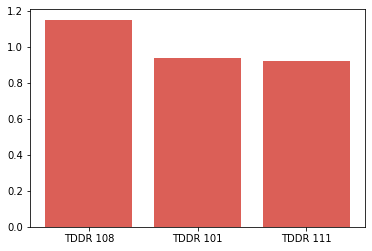

ANAR


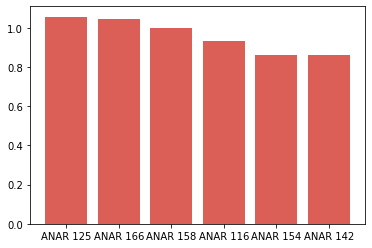

AAS


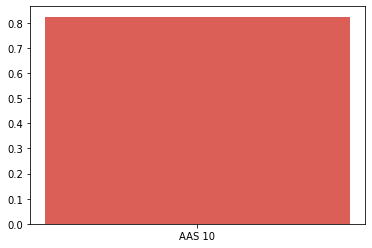

INTL


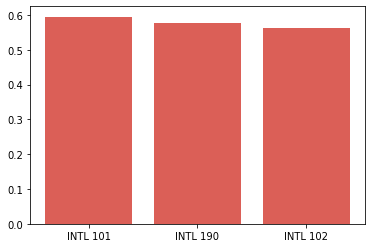

JAPN


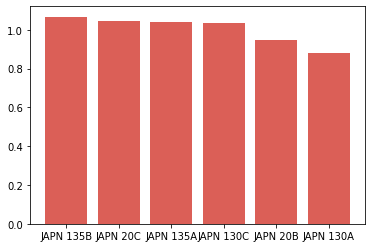

BILD


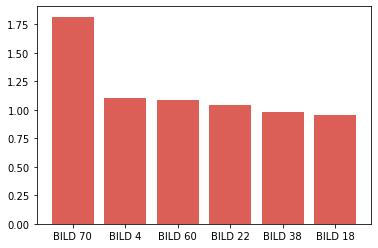

SOCI


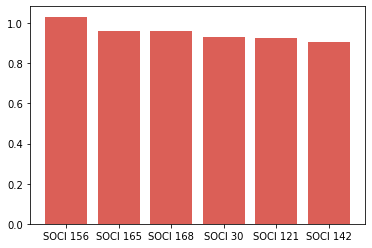

COSF


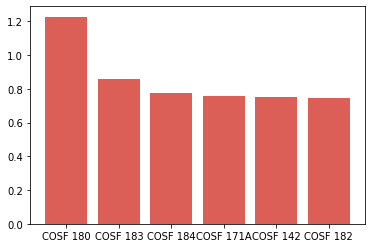

HDS


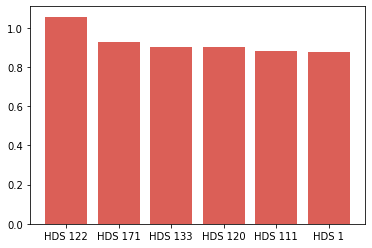

LTAF


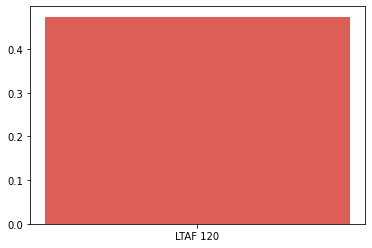

TWS


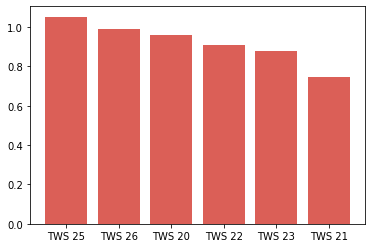

ANTH


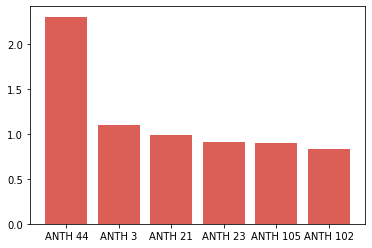

HITO


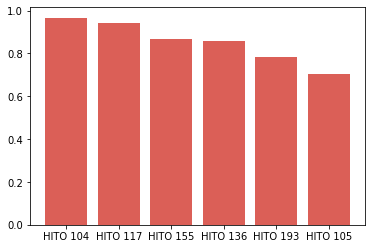

BIBC


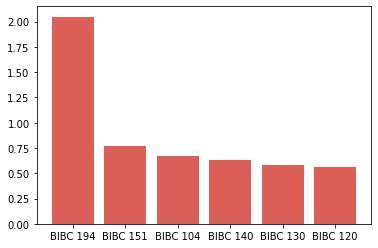

CCS


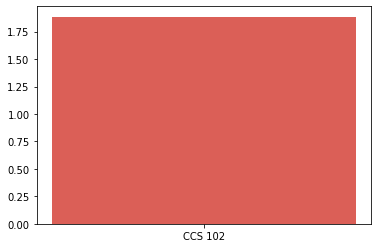

SOCL


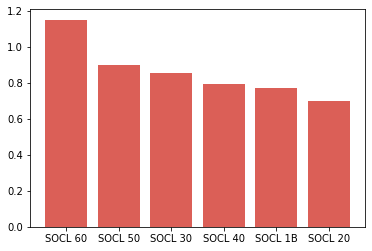

ECE


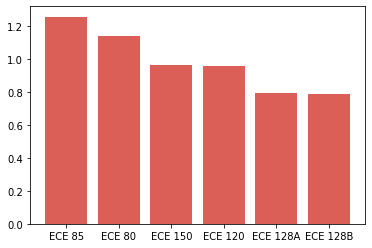

LTTH


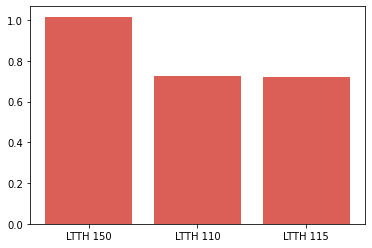

CSE


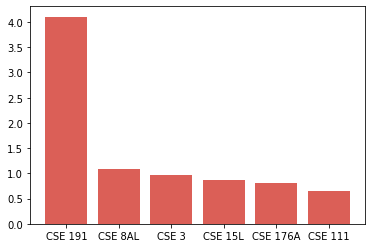

ANBI


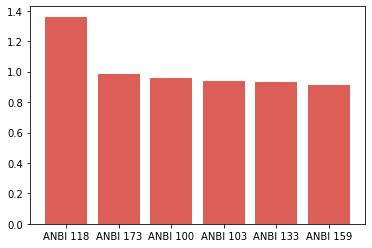

LTLA


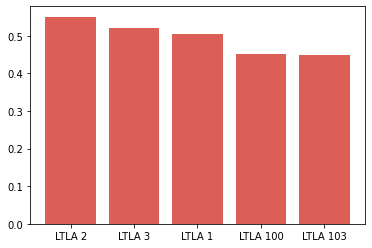

BIPN


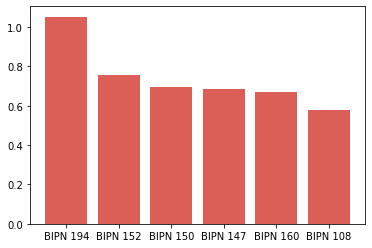

LTEA


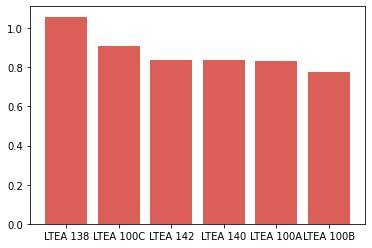

CAT


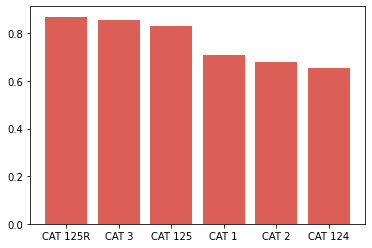

SOCC


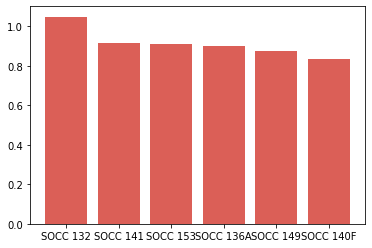

LTCS


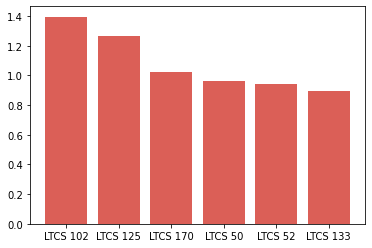

CSS


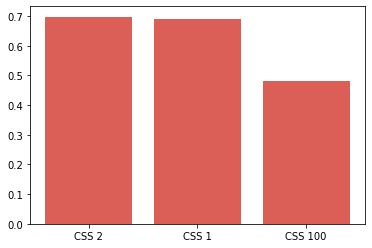

EDS


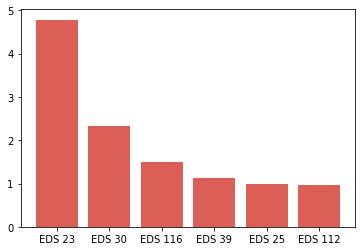

HIAF


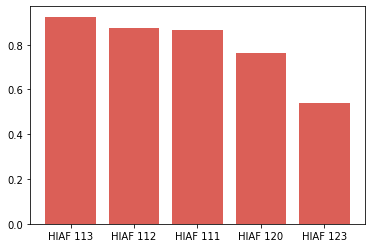

RELI


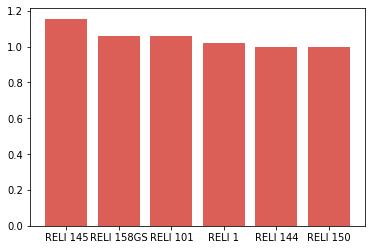

TDAC


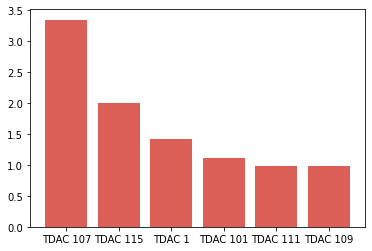

ECON


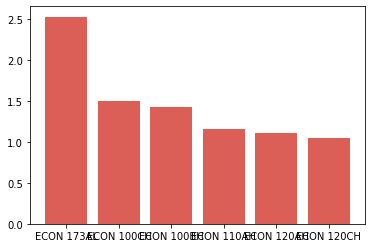

BICD


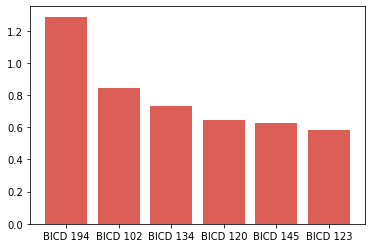

LTRU


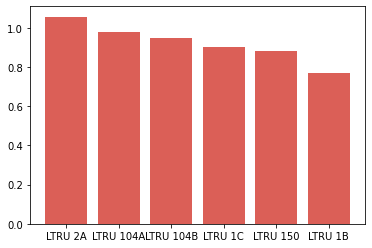

LTGM


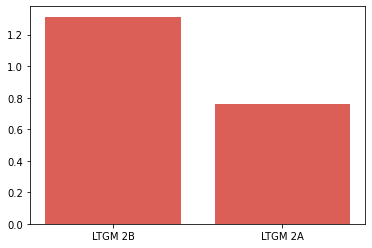

LTIT


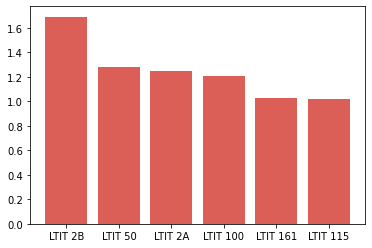

TDMV


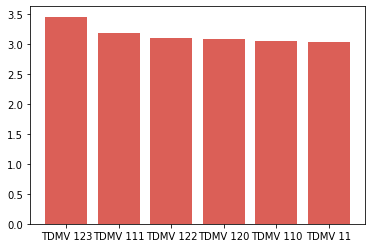

LATI


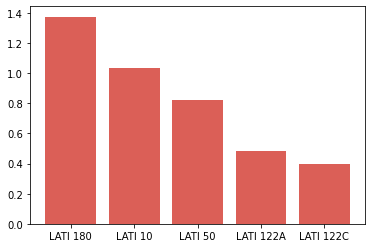

SOCA


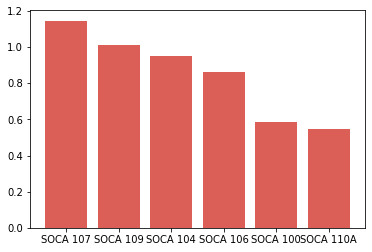

LTKO


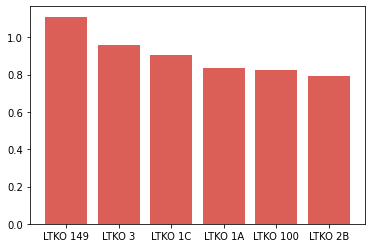

LTSP


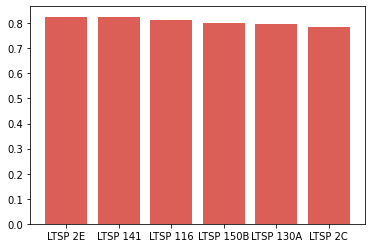

ELWR


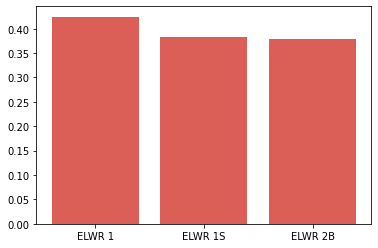

TDHT


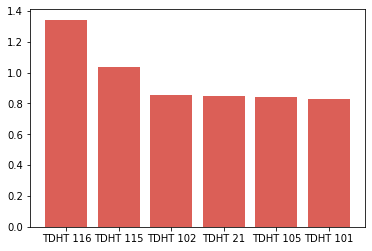

HILA


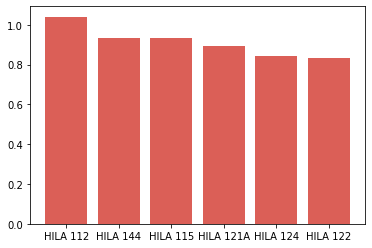

In [28]:
for dep in set(gh_ratio['department'].values):
    gh_ratio_0 = gh_ratio[gh_ratio['department'] == dep].groupby('course').mean().sort_values('ratio', ascending=False)[0:6]# top 6
    gh_ratio_0=gh_ratio_0.reset_index()
    print(dep)
    plt.figure()
    plt.bar(gh_ratio_0.course, gh_ratio_0.ratio)
    plt.show()

## Analysis on better instructors

Best instructors by recommendation rate:

In [59]:
insts = df.groupby(['instr'])['recInstr'].mean()
insts

instr
AMARO, ROMMIE                   95.666667
Aamari, Eddie                   70.000000
Abarbanel, Henry Don Isaac      67.500000
Abbasi Hafshejani, Anahita      87.142857
Abbasi, Shaghayegh              83.000000
                                  ...    
duBois, Page Ann                89.909091
el Tayeb, Fatima                87.312500
ngim, roger                     77.500000
stuart, christina               96.000000
van den Hout, Charlotte Emma    89.500000
Name: recInstr, Length: 4820, dtype: float64

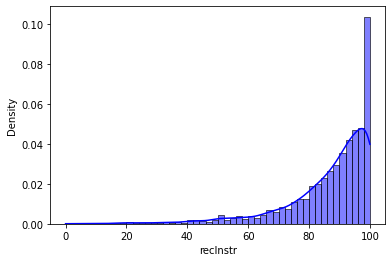

In [60]:
insts=insts.reset_index()
sns.set_palette("hls")
sns.histplot(insts.recInstr,stat="density",color="b",bins=50,kde=True)
plt.show()

DSC


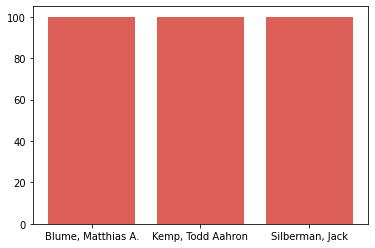

COMM


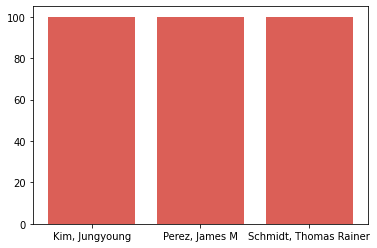

HIEU


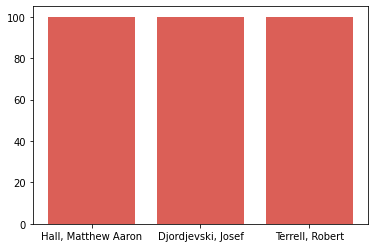

SE


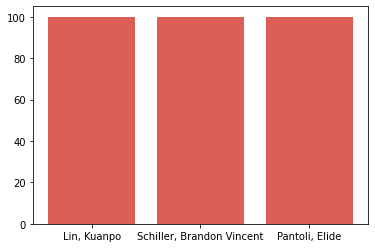

LTEU


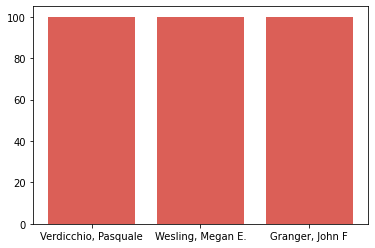

TDDE


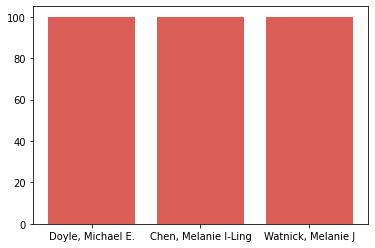

FPMU


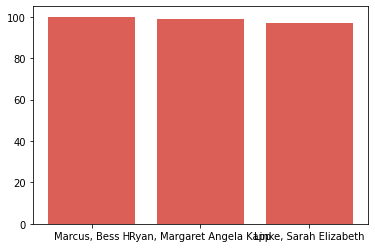

BIEB


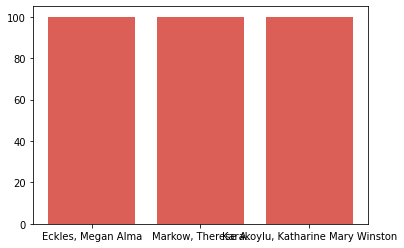

CHEM


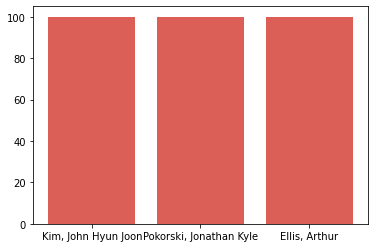

ICAM


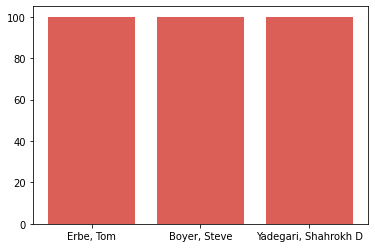

TDCH


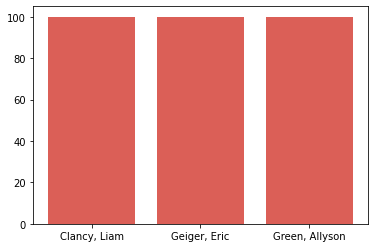

TDPR


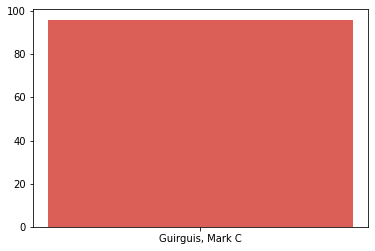

TDPW


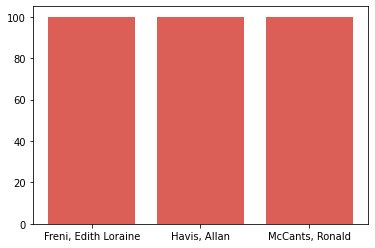

LIPO


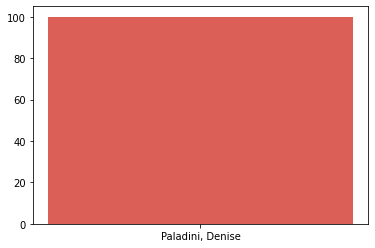

COGS


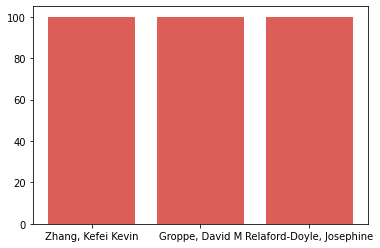

ERC


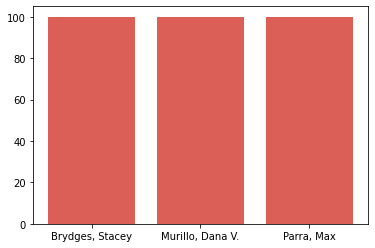

SOCD


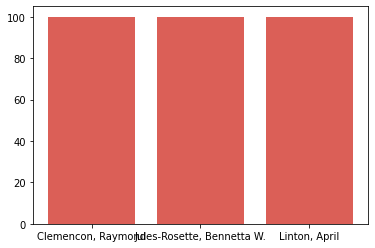

TDHD


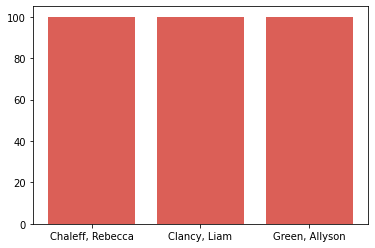

HIEA


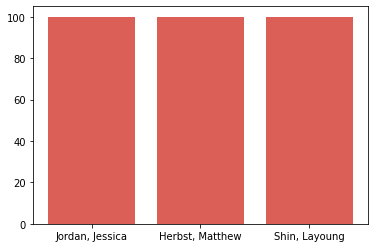

TDTR


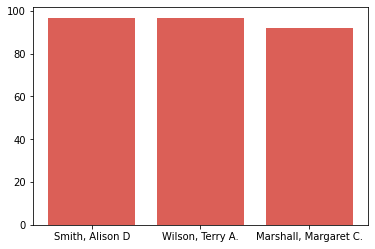

CENG


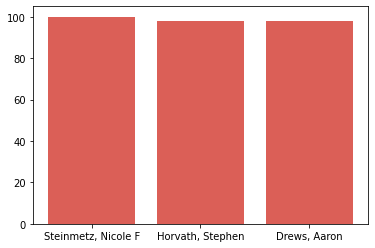

MAE


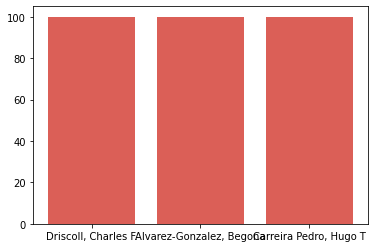

MATH


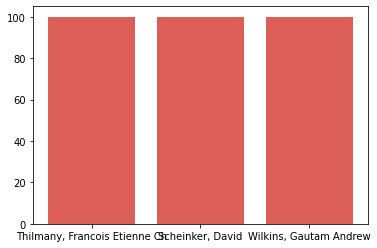

CHIN


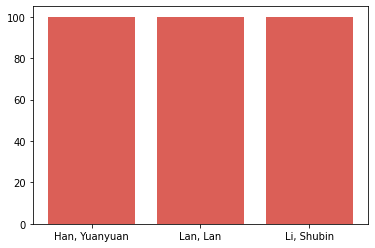

JUDA


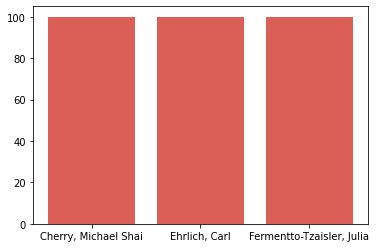

PHIL


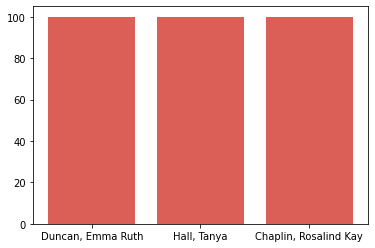

HDP


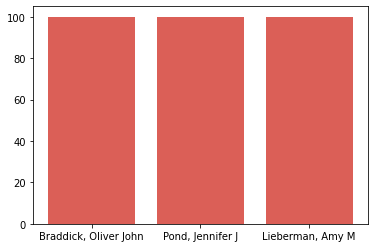

ANSC


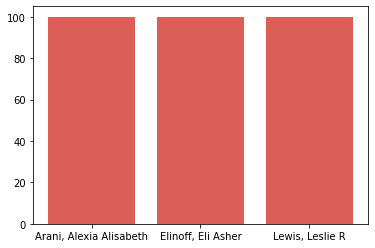

AWP


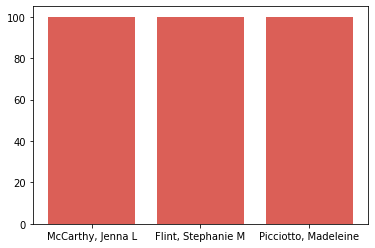

SOCE


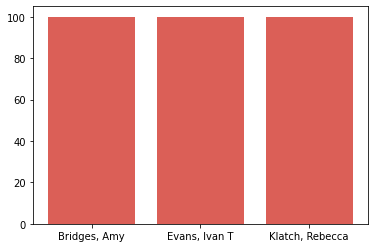

MMW


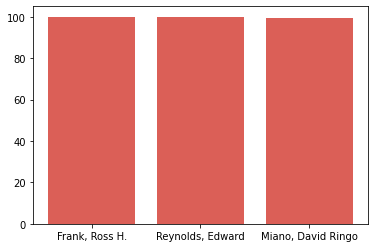

LIAB


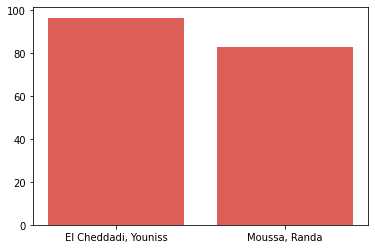

ESYS


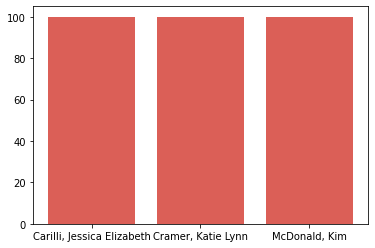

PHYS


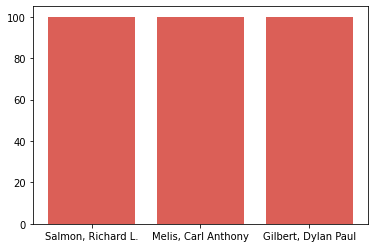

CGS


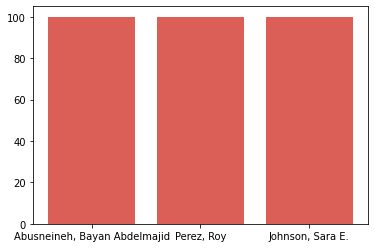

MGT


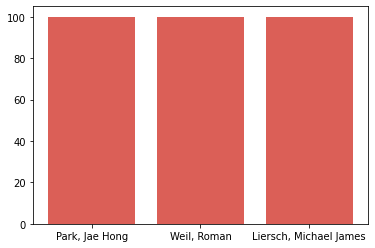

ANLD


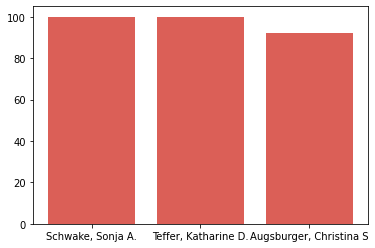

LIIT


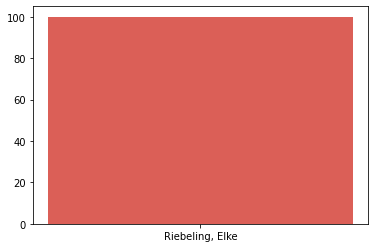

HIUS


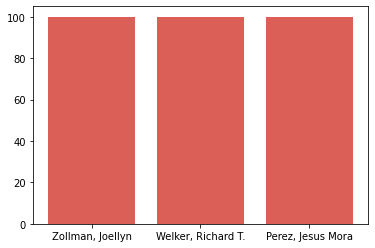

HUM


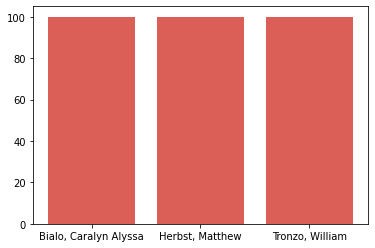

COHI


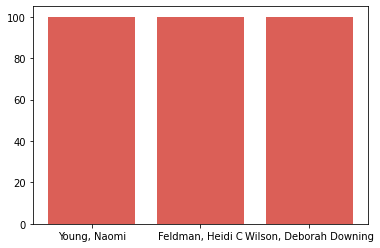

SXTH


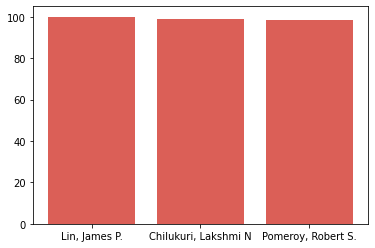

LTCH


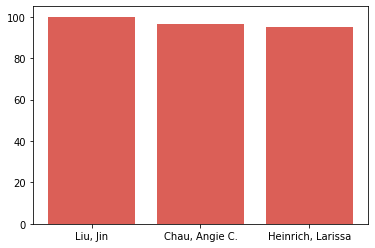

ANPR


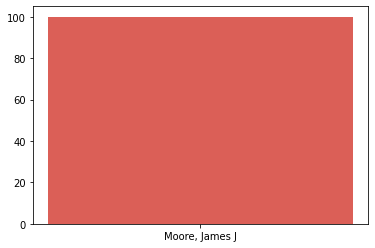

LIGN


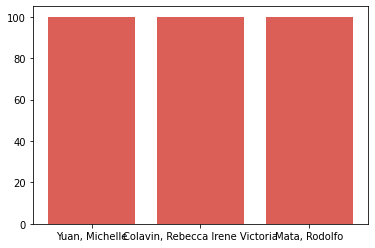

LIHL


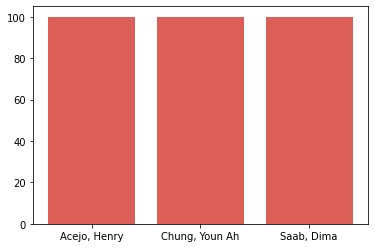

BISP


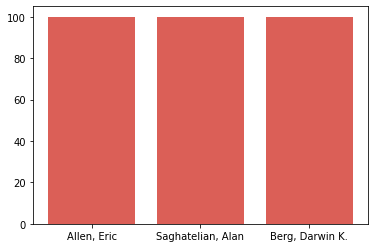

LTFR


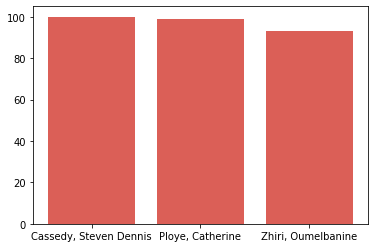

HILD


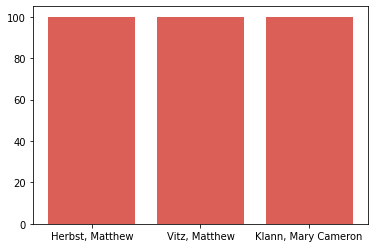

SIO


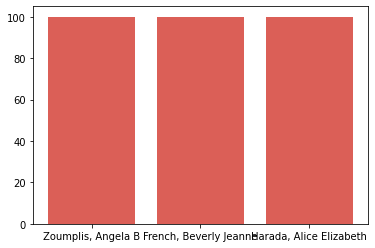

BENG


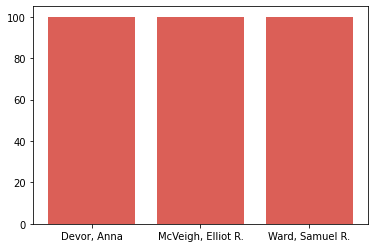

DSGN


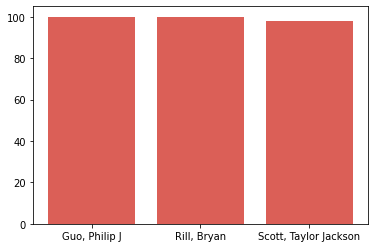

VIS


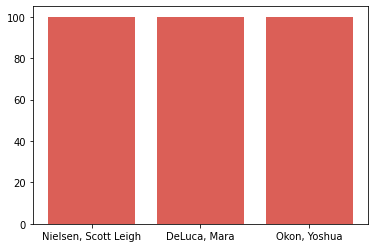

LTWL


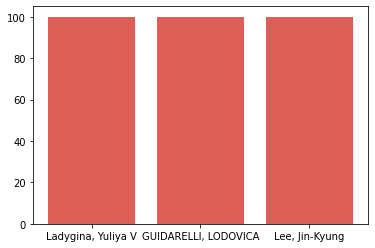

CONT


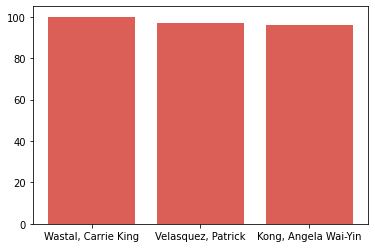

TDPF


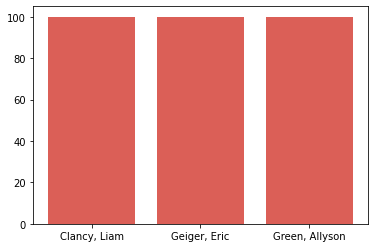

MUS


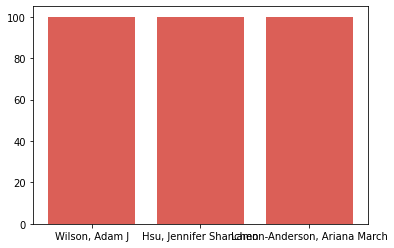

GLBH


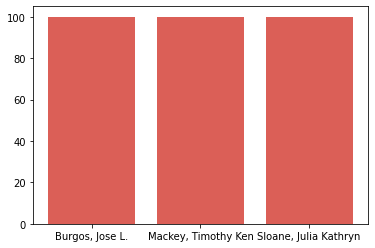

ETHN


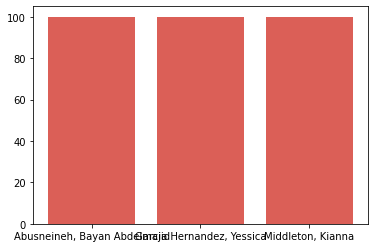

LIGM


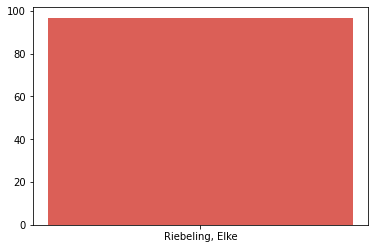

BIMM


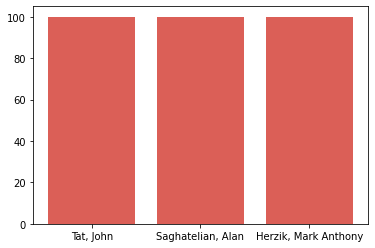

FMPH


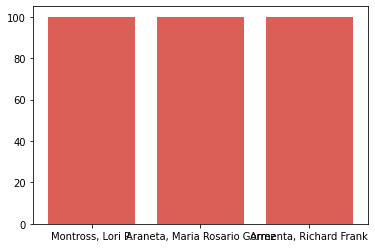

JWSP


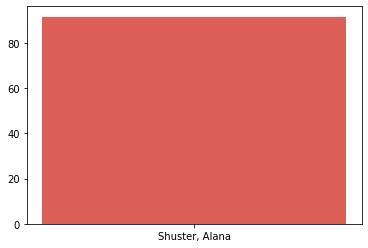

POLI


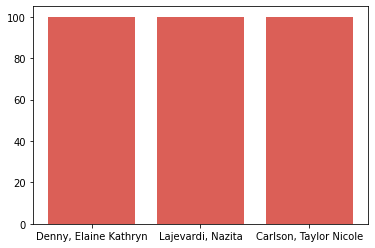

HINE


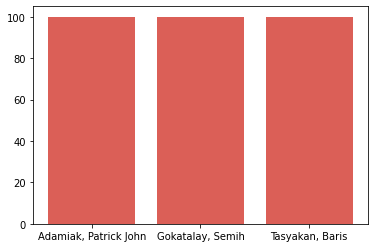

MUIR


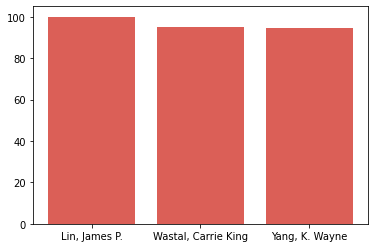

USP


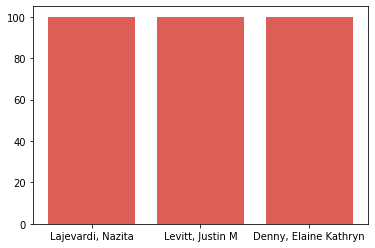

LTEN


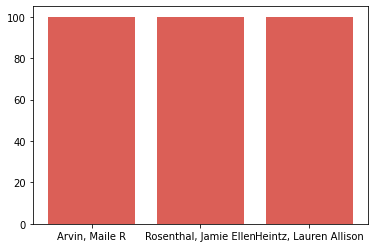

ENVR


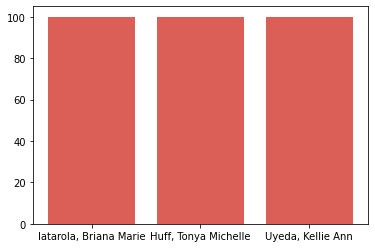

PSYC


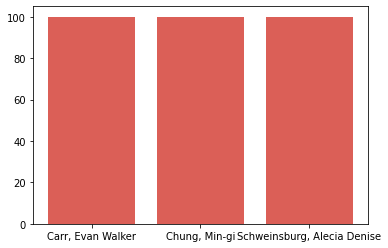

COMT


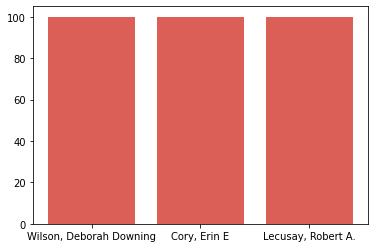

LTAM


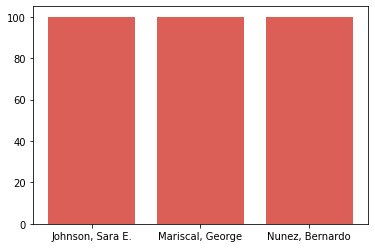

NANO


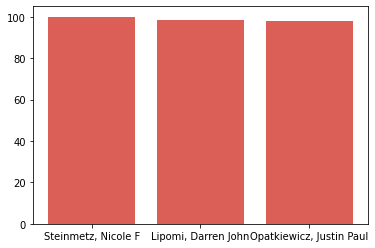

HISC


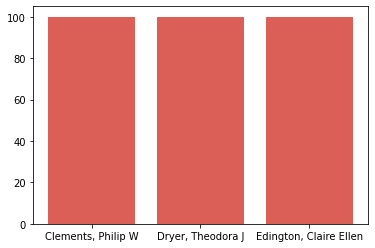

SOCB


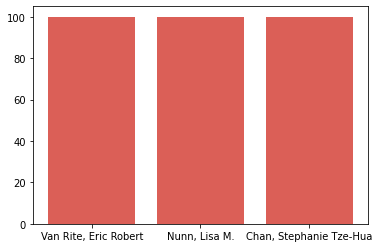

WCWP


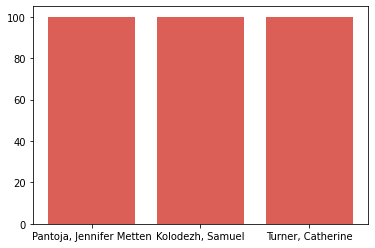

TDGE


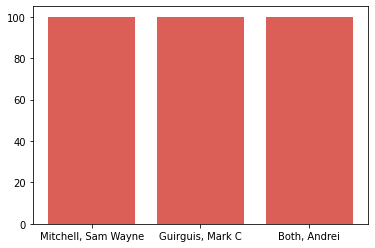

LAWS


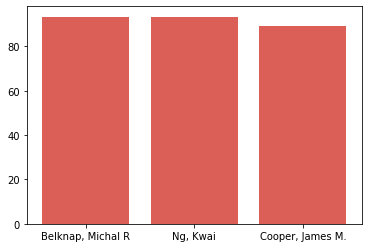

LTGK


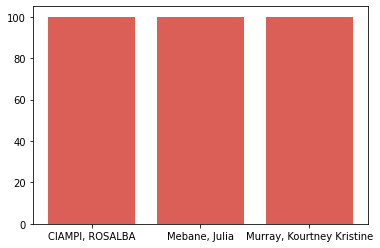

ENG


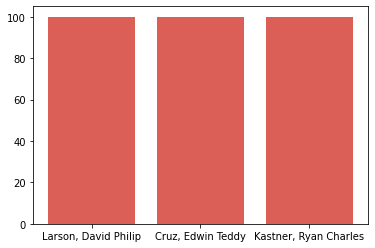

DOC


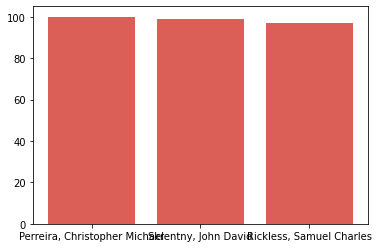

LTWR


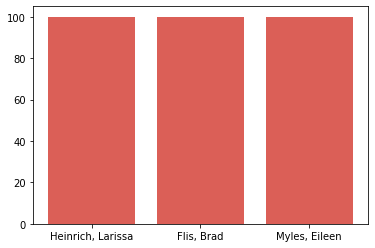

TDDM


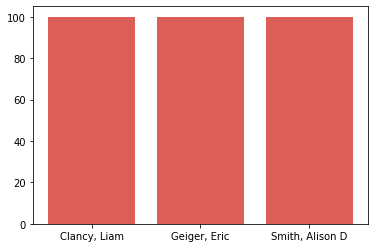

HMNR


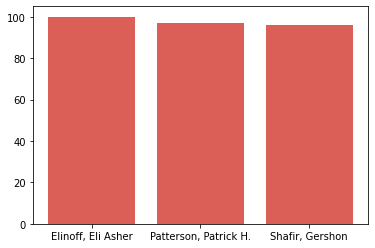

COCU


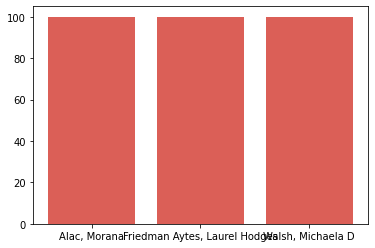

COGN


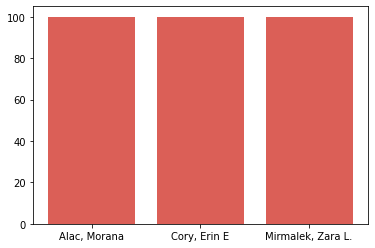

STPA


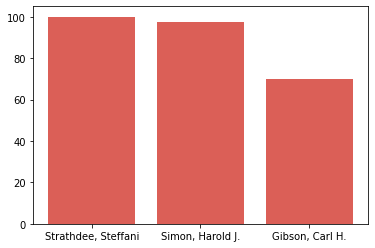

TMC


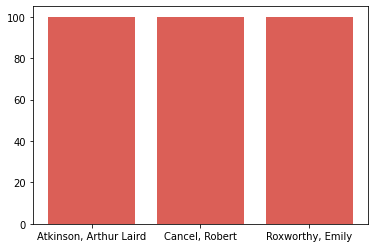

TDDR


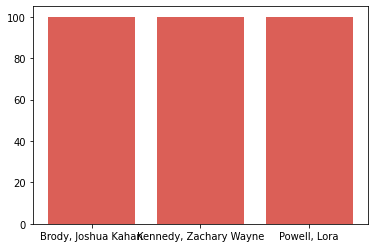

ANAR


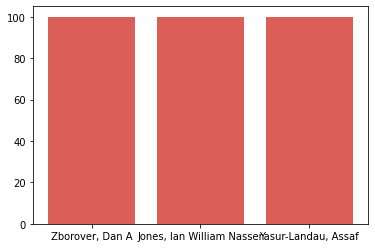

AAS


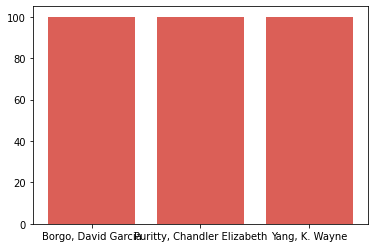

INTL


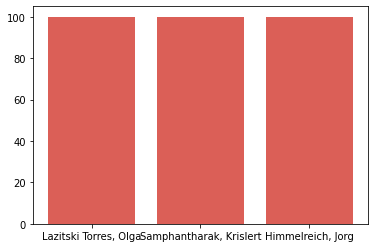

JAPN


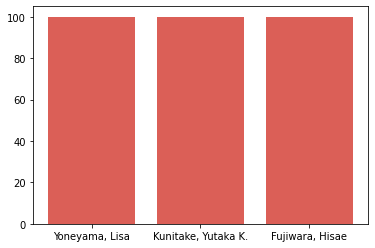

BILD


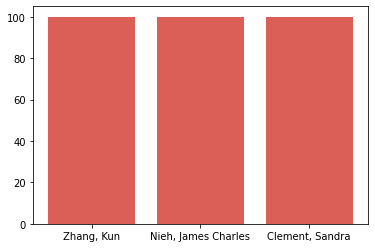

SOCI


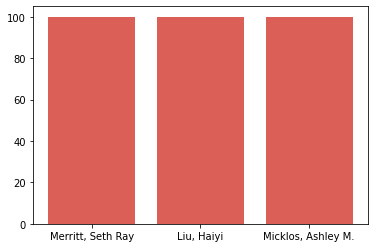

COSF


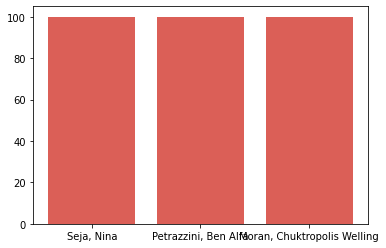

HDS


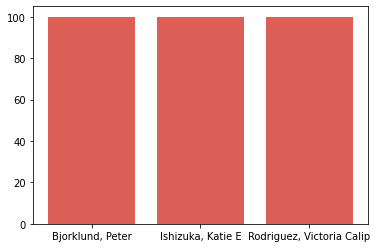

LTAF


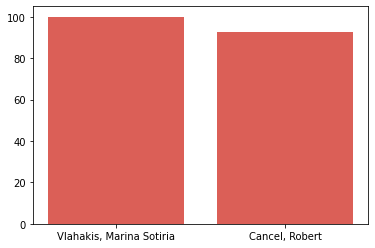

TWS


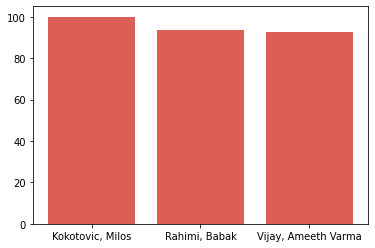

ANTH


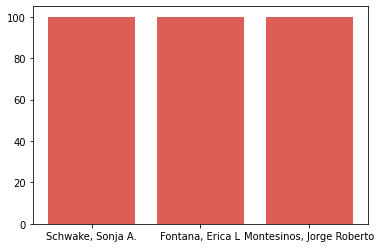

HITO


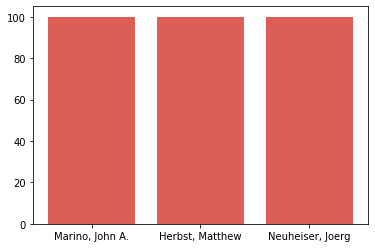

BIBC


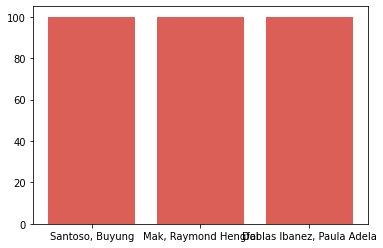

CCS


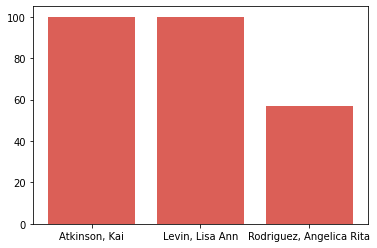

SOCL


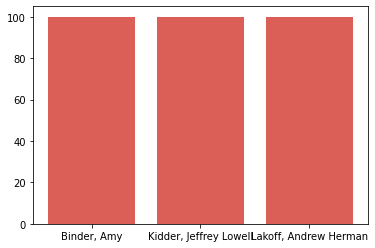

ECE


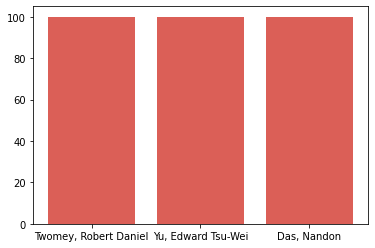

LTTH


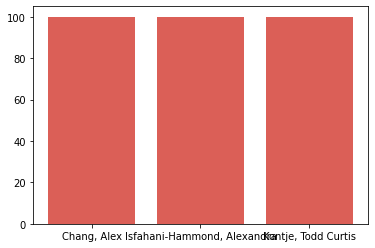

CSE


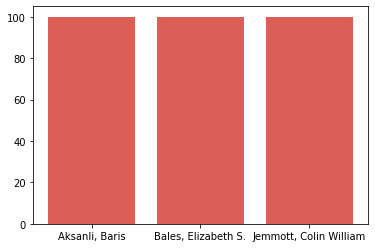

ANBI


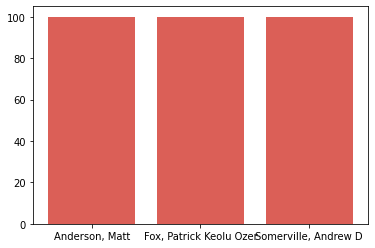

LTLA


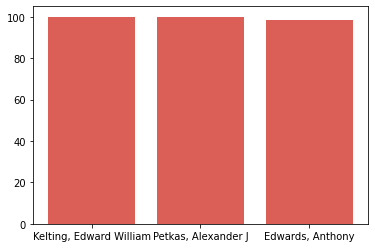

BIPN


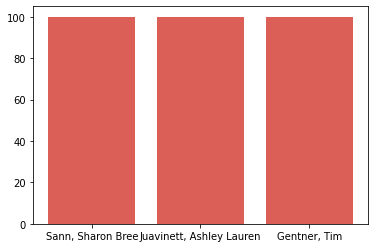

REV


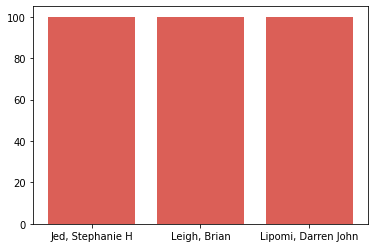

AIP


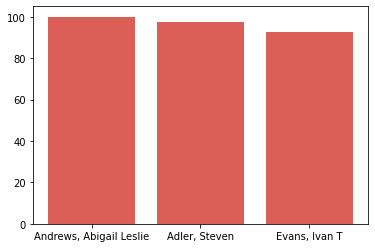

LTEA


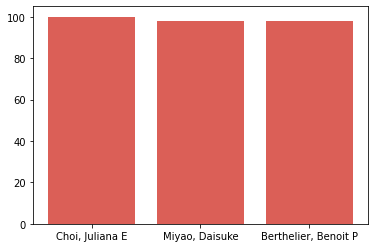

CAT


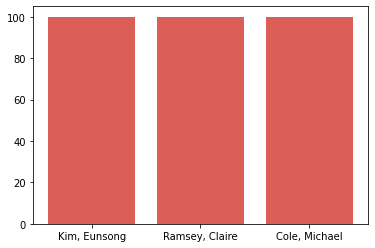

SOCC


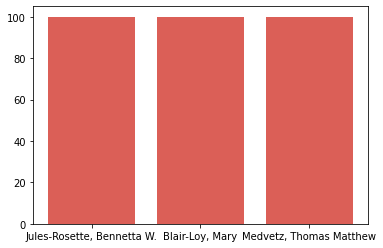

LTCS


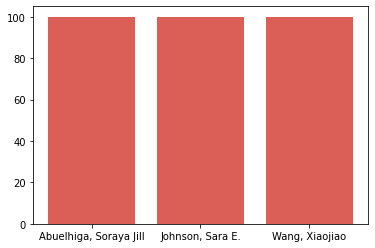

WARR


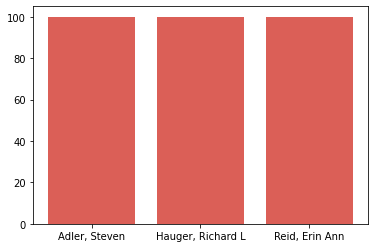

CSS


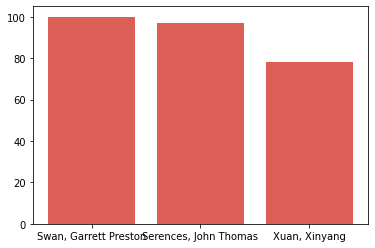

EDS


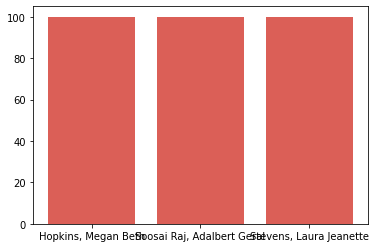

HIAF


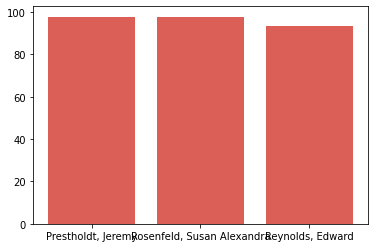

RELI


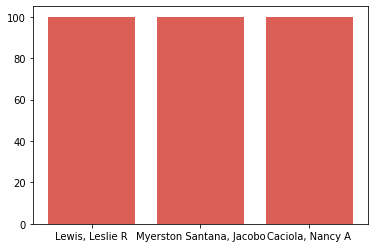

TDAC


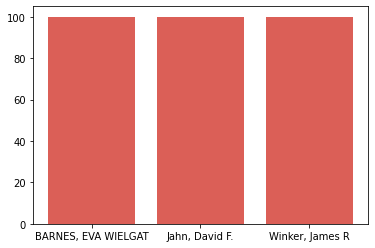

ECON


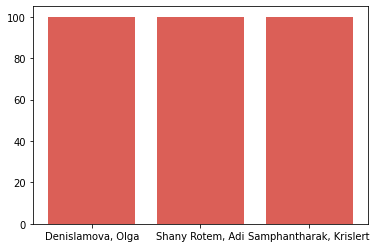

BICD


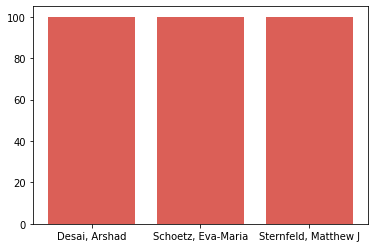

LTRU


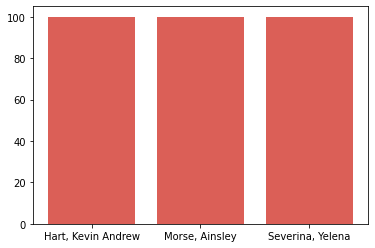

LTGM


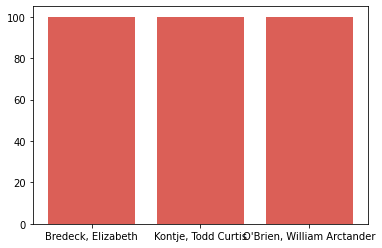

SEV


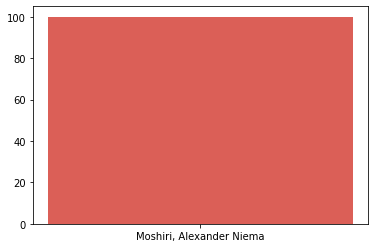

LTIT


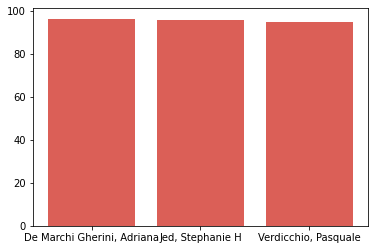

FILM


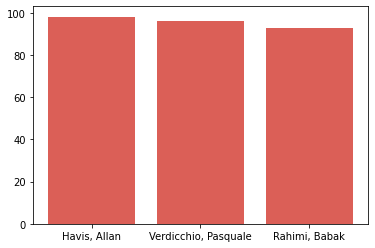

TDMV


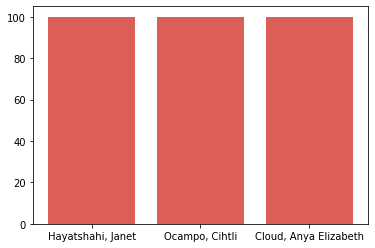

LATI


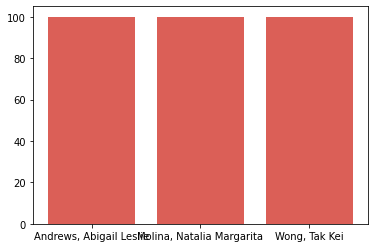

SOCA


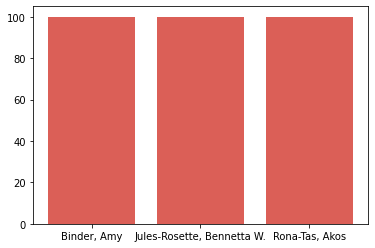

LTKO


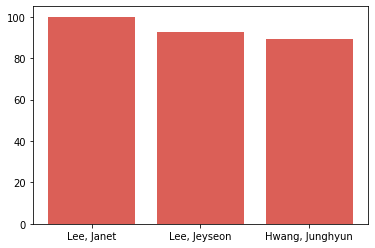

LTSP


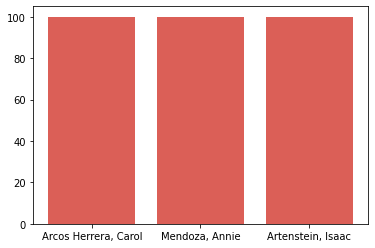

ELWR


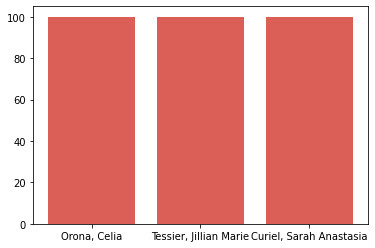

LISP


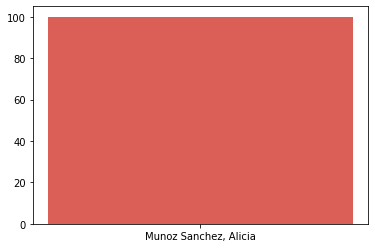

TDHT


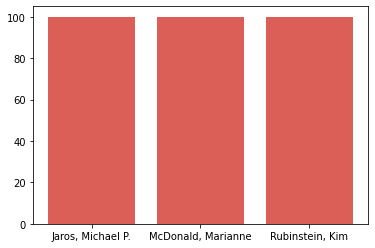

HILA


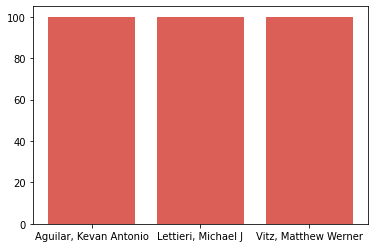

In [64]:
insts = df.copy()
for dep in set(df['department'].values):
    insts_0 = insts[insts['department'] == dep].groupby('instr').mean().sort_values('recInstr', ascending=False)[0:3]# top 3
    insts_0=insts_0.reset_index()
    print(dep)
    plt.figure()
    plt.bar(insts_0.instr, insts_0.recInstr)
    plt.show()

Best instructors by gpa

In [65]:
insts = df.groupby(['instr'])['gpaAvg'].mean()
insts

instr
AMARO, ROMMIE                   3.395000
Aamari, Eddie                   3.007500
Abarbanel, Henry Don Isaac      2.836667
Abbasi Hafshejani, Anahita      3.803333
Abbasi, Shaghayegh              2.700000
                                  ...   
duBois, Page Ann                3.203235
el Tayeb, Fatima                3.362000
ngim, roger                     2.910000
stuart, christina               2.880000
van den Hout, Charlotte Emma    3.810000
Name: gpaAvg, Length: 4820, dtype: float64

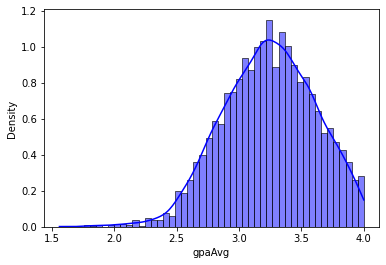

In [66]:
insts=insts.reset_index()
sns.set_palette("hls")
sns.histplot(insts.gpaAvg,stat="density",color="b",bins=50,kde=True)
plt.show()

DSC


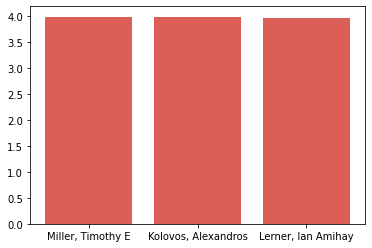

COMM


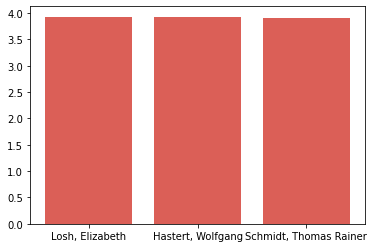

HIEU


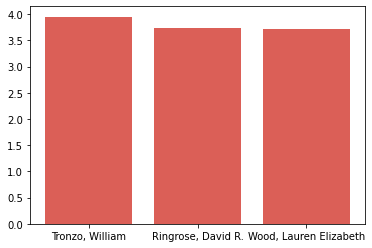

SE


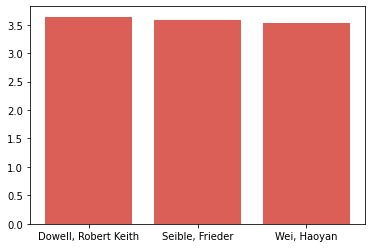

LTEU


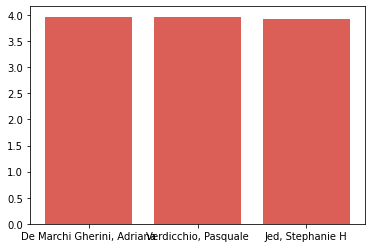

TDDE


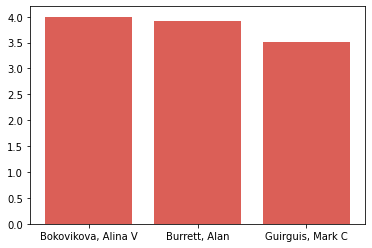

FPMU


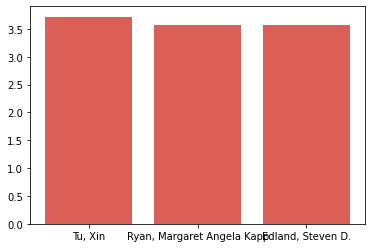

BIEB


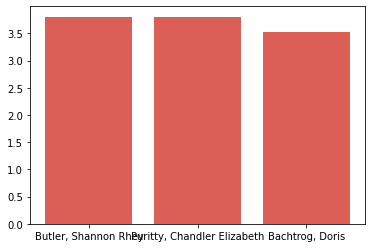

CHEM


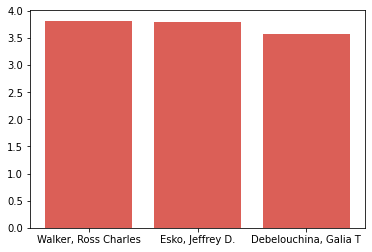

ICAM


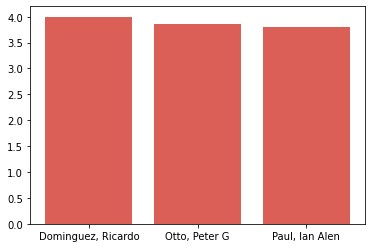

TDCH


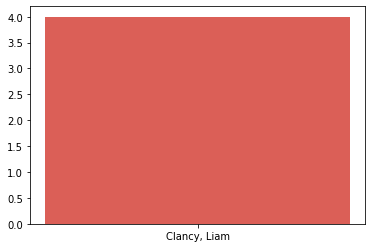

TDPR


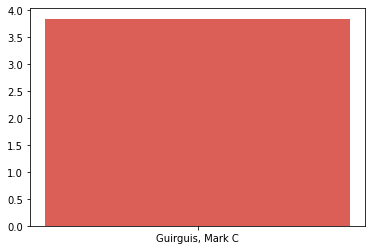

TDPW


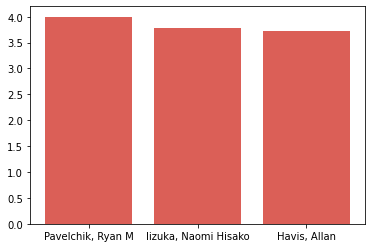

LIPO


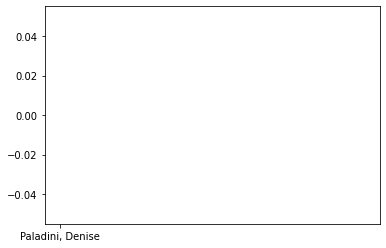

COGS


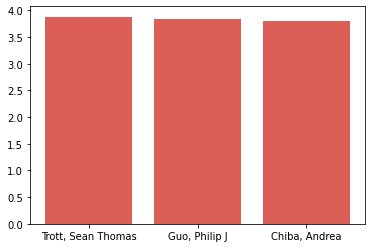

ERC


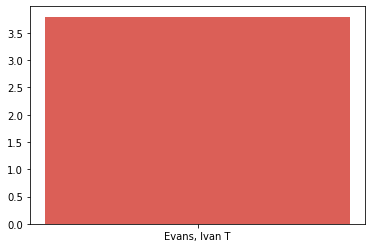

SOCD


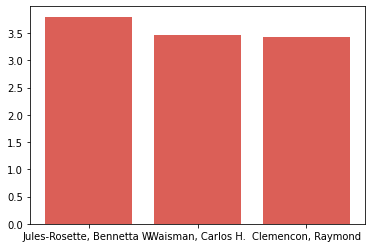

TDHD


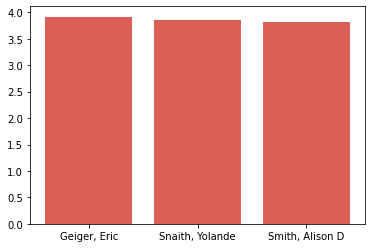

HIEA


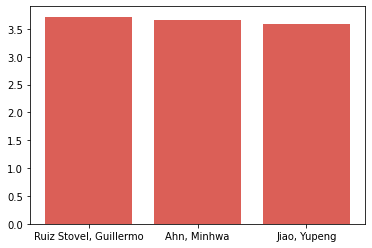

TDTR


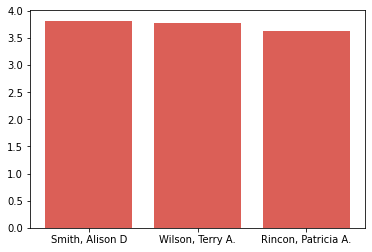

CENG


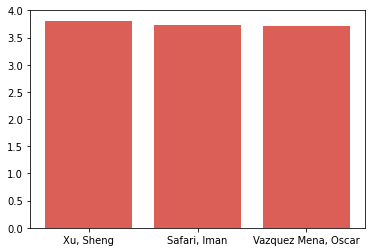

MAE


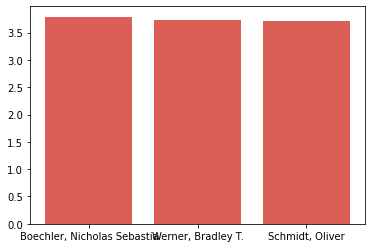

MATH


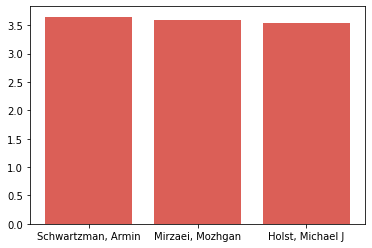

CHIN


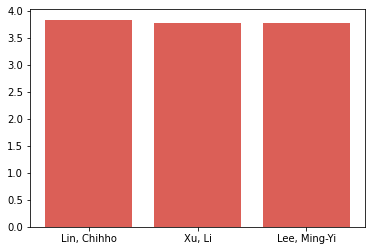

JUDA


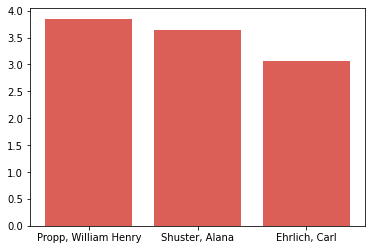

PHIL


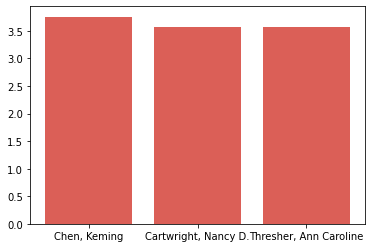

HDP


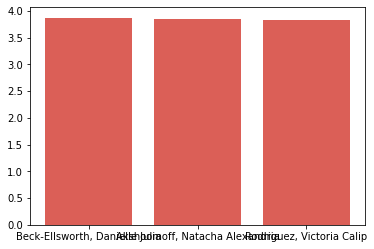

ANSC


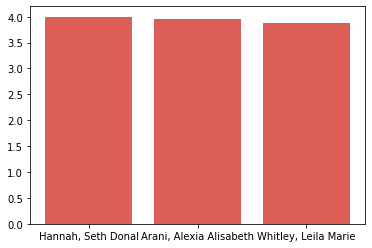

AWP


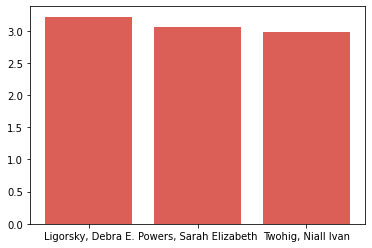

SOCE


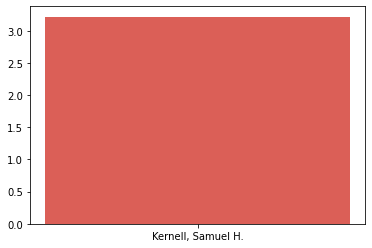

MMW


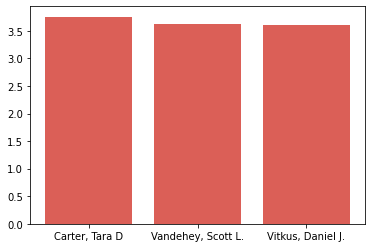

LIAB


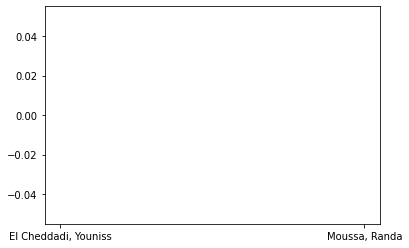

ESYS


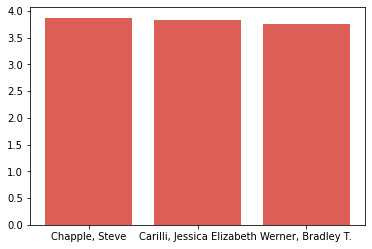

PHYS


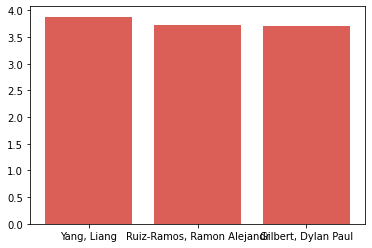

CGS


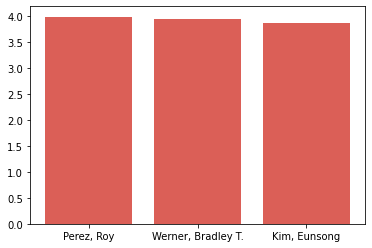

MGT


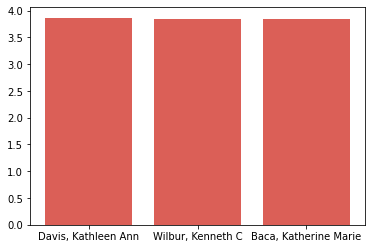

ANLD


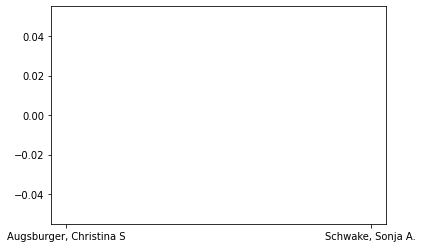

LIIT


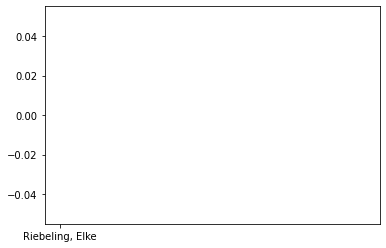

HIUS


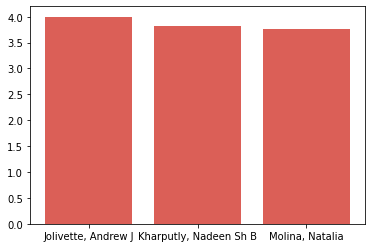

HUM


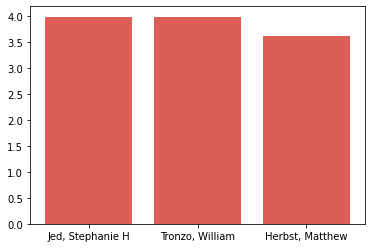

COHI


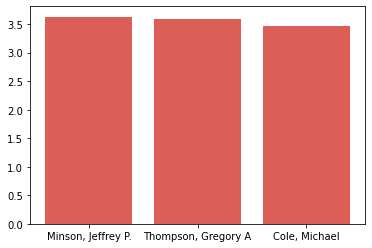

SXTH


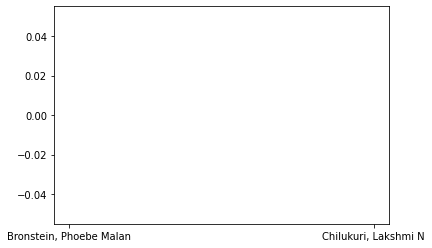

LTCH


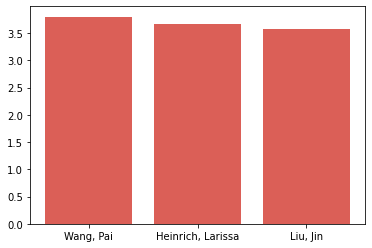

ANPR


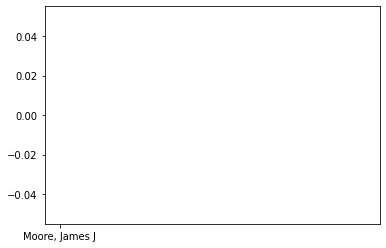

LIGN


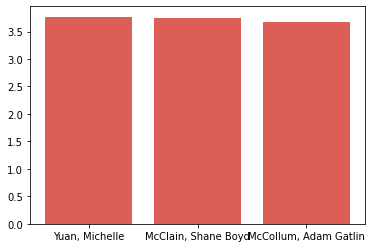

LIHL


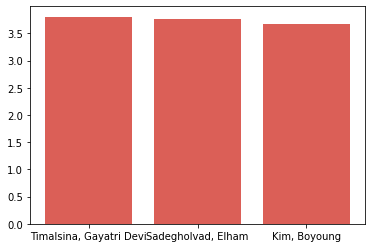

BISP


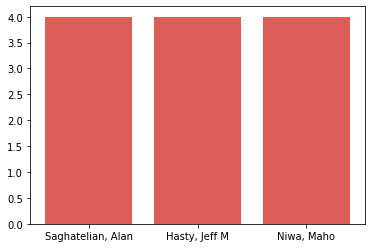

LTFR


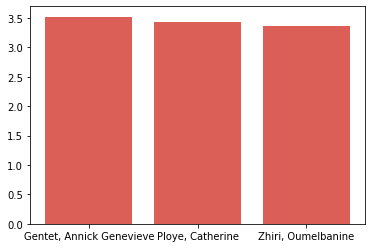

HILD


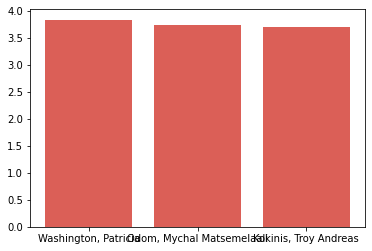

SIO


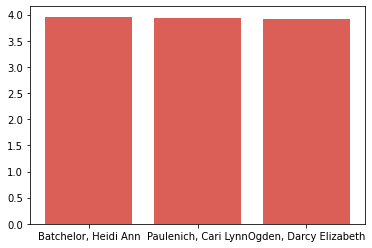

BENG


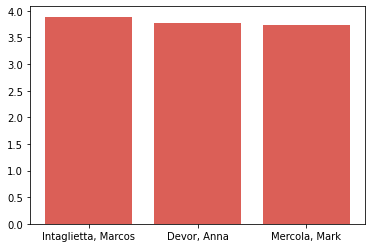

DSGN


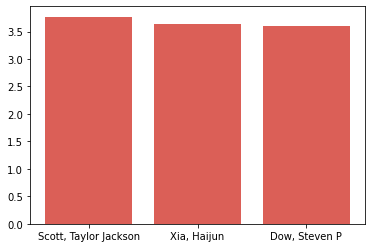

VIS


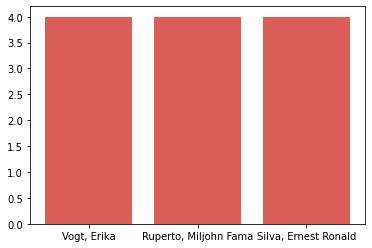

LTWL


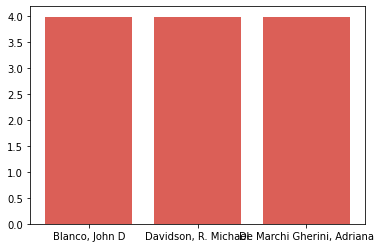

CONT


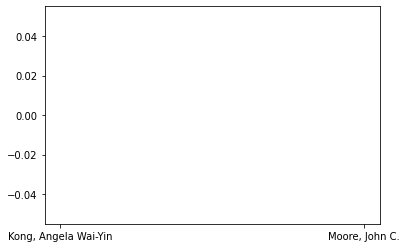

TDPF


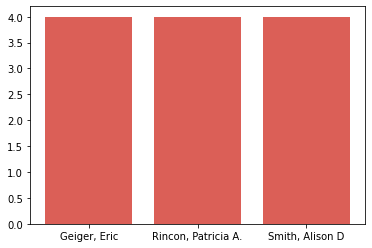

MUS


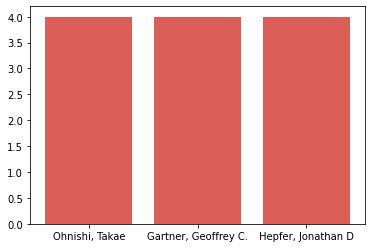

GLBH


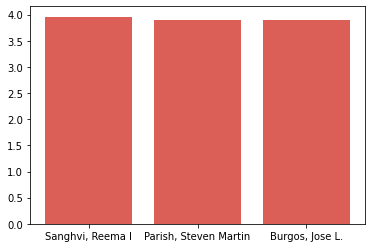

ETHN


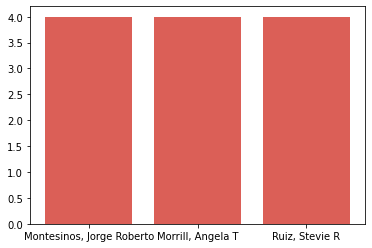

LIGM


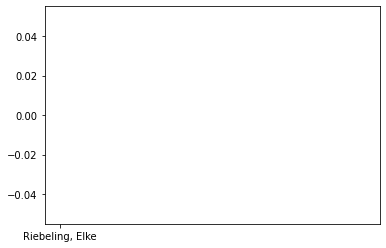

BIMM


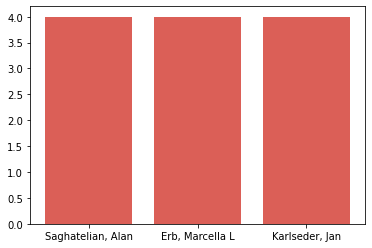

FMPH


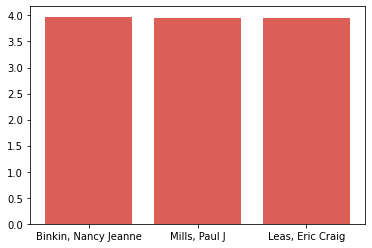

JWSP


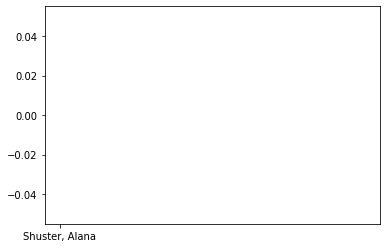

POLI


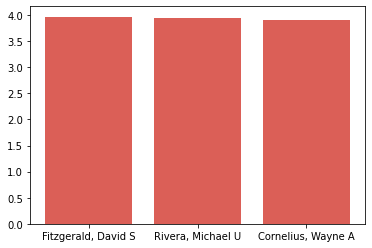

HINE


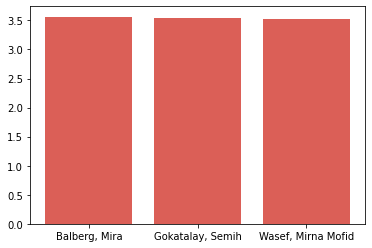

MUIR


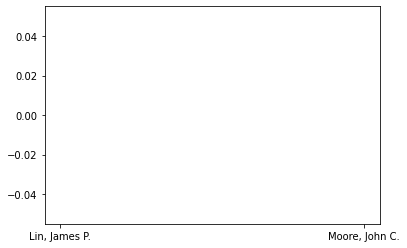

USP


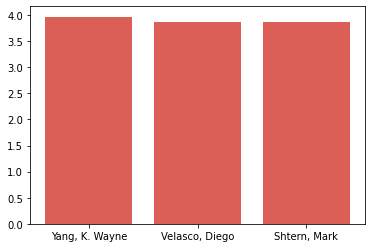

LTEN


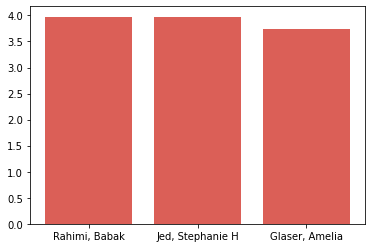

ENVR


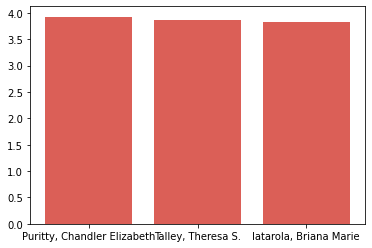

PSYC


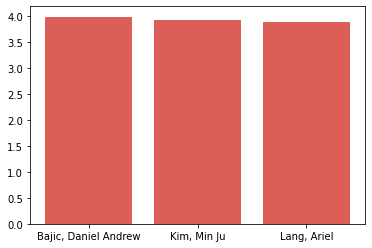

COMT


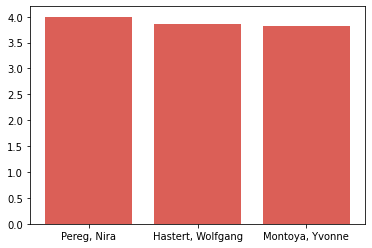

LTAM


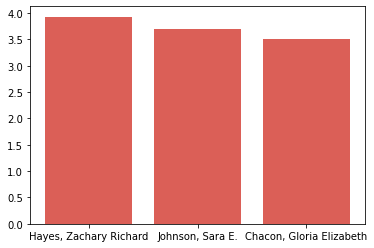

NANO


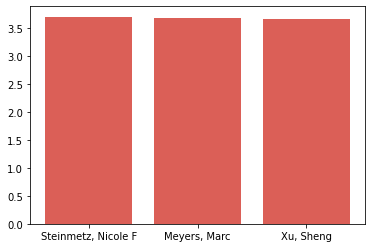

HISC


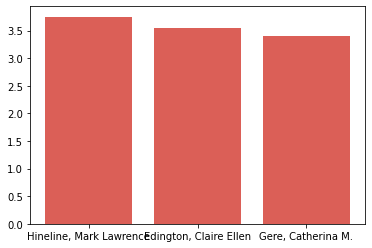

SOCB


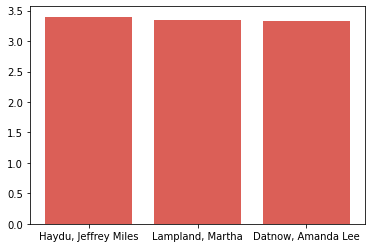

WCWP


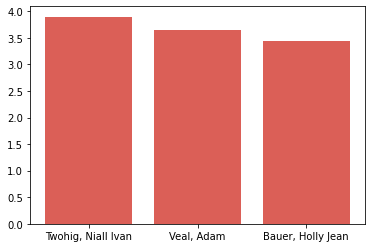

TDGE


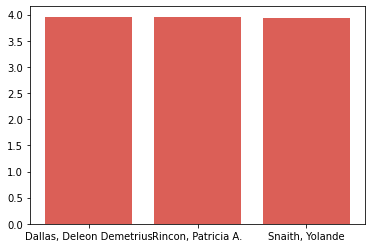

LAWS


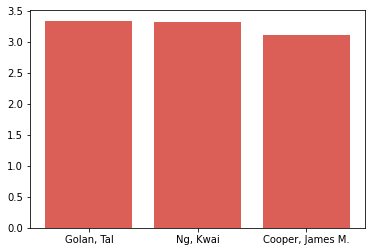

LTGK


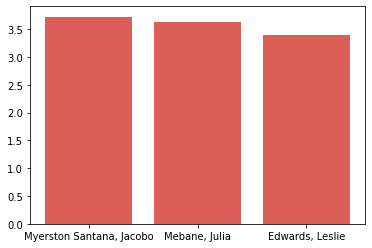

ENG


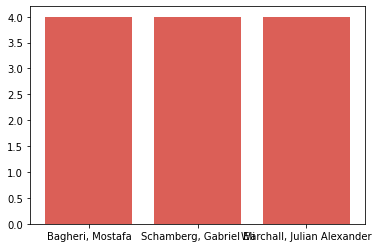

DOC


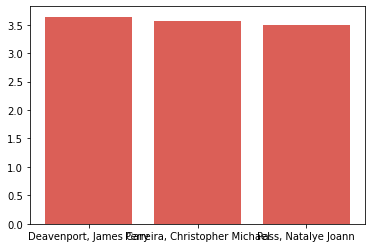

LTWR


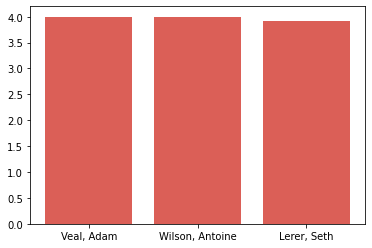

TDDM


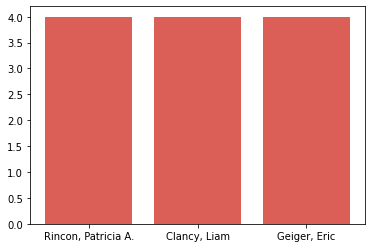

HMNR


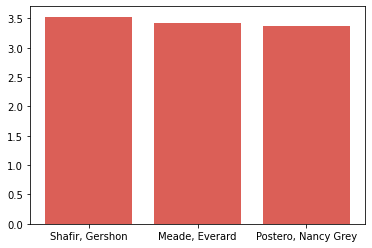

COCU


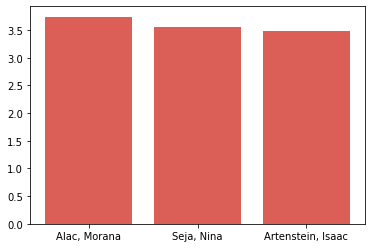

COGN


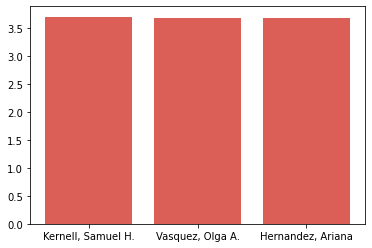

STPA


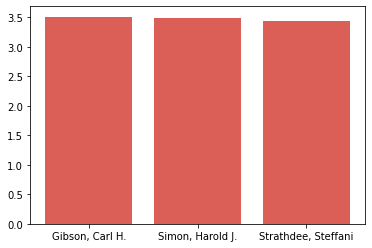

TMC


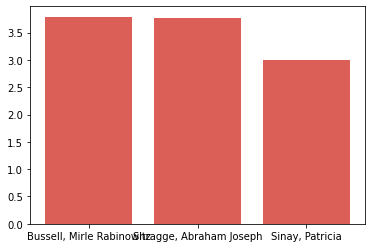

TDDR


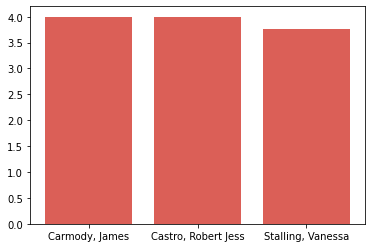

ANAR


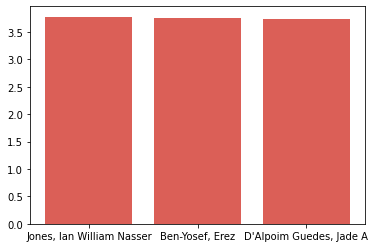

AAS


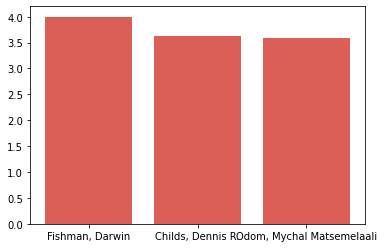

INTL


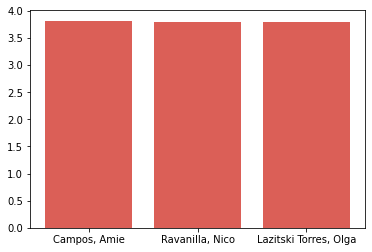

JAPN


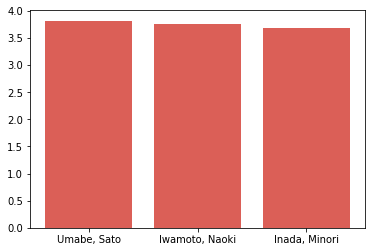

BILD


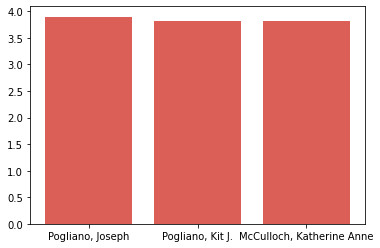

SOCI


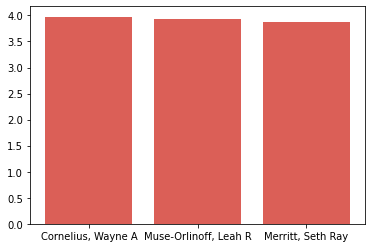

COSF


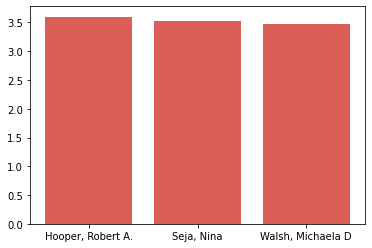

HDS


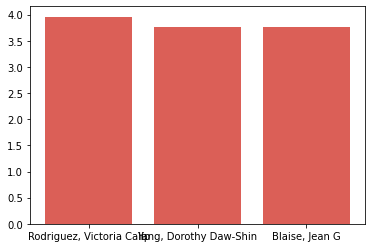

LTAF


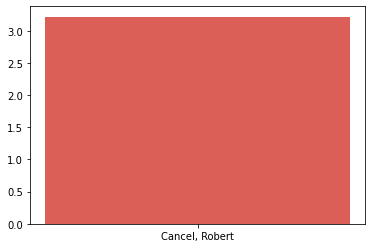

TWS


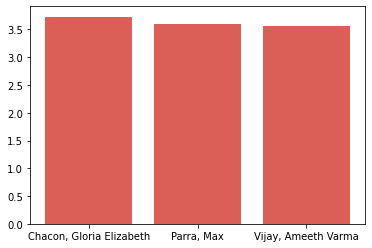

ANTH


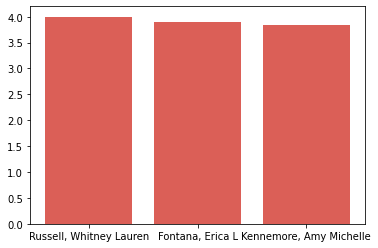

HITO


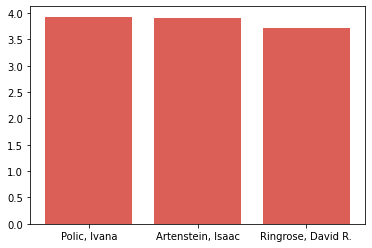

BIBC


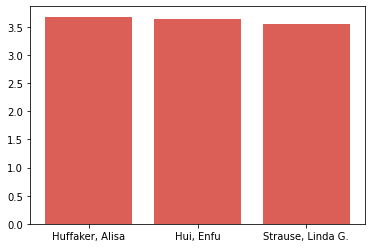

CCS


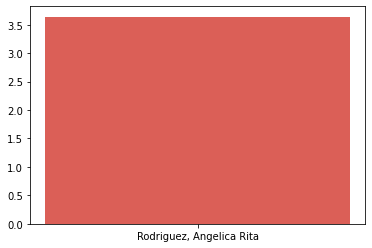

SOCL


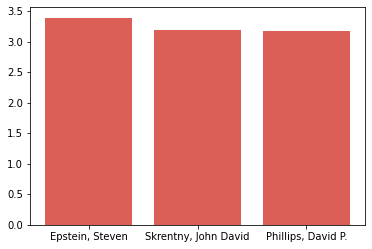

ECE


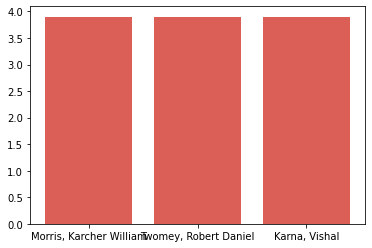

LTTH


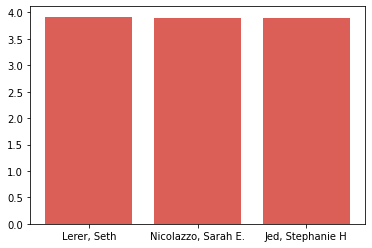

CSE


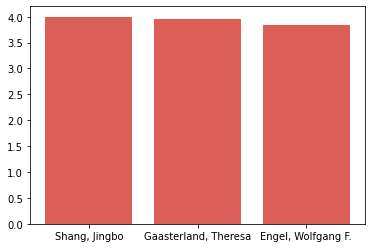

ANBI


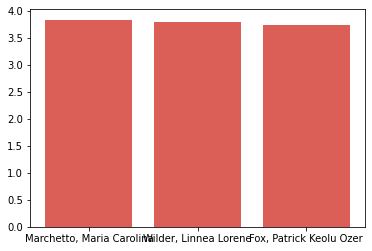

LTLA


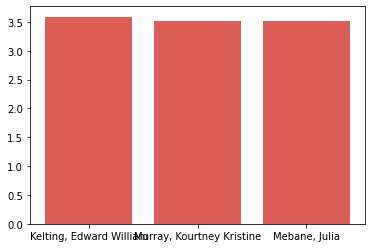

BIPN


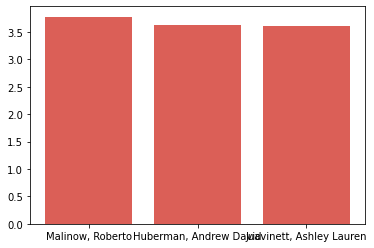

REV


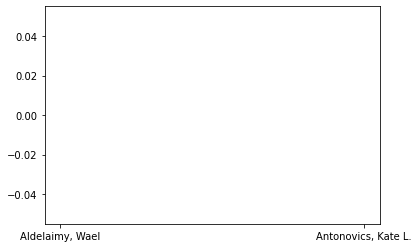

AIP


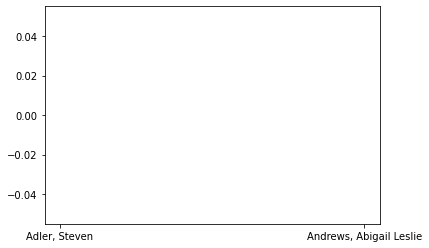

LTEA


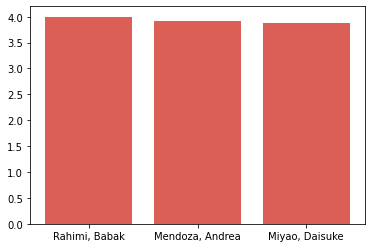

CAT


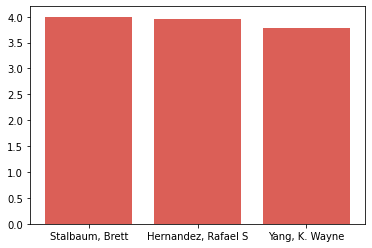

SOCC


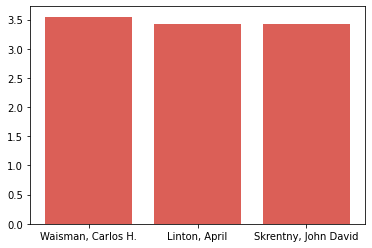

LTCS


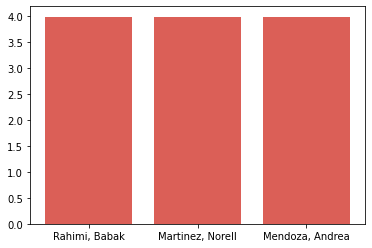

WARR


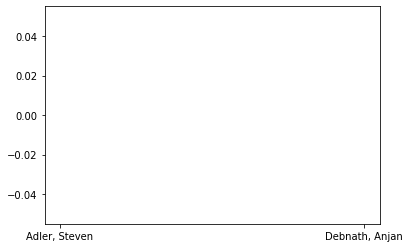

CSS


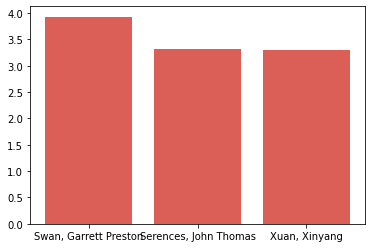

EDS


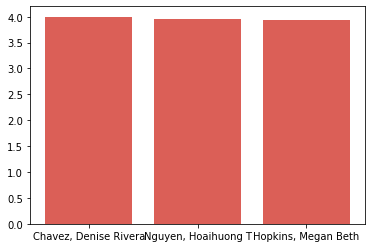

HIAF


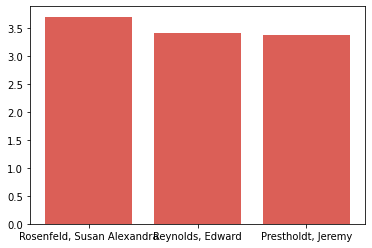

RELI


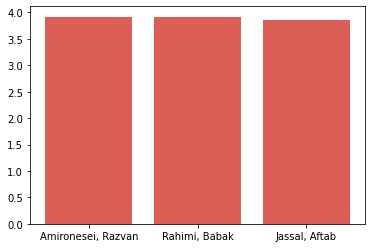

TDAC


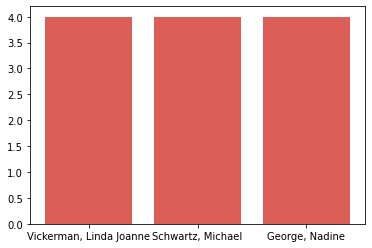

ECON


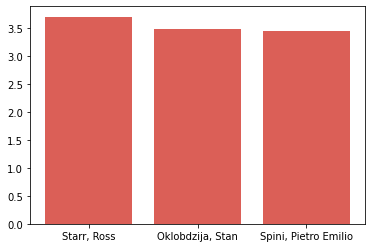

BICD


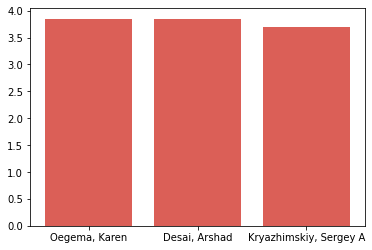

LTRU


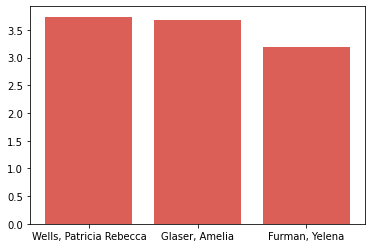

LTGM


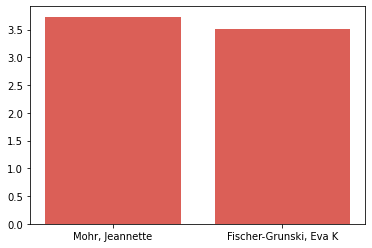

SEV


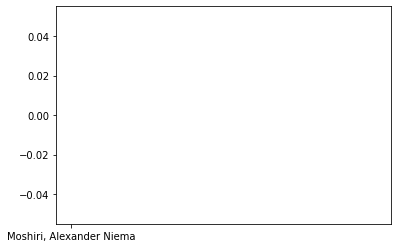

LTIT


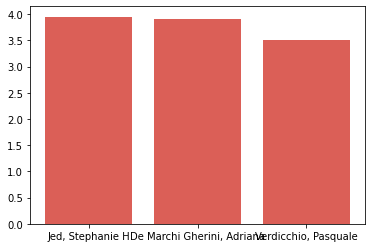

FILM


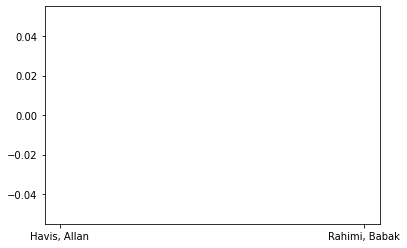

TDMV


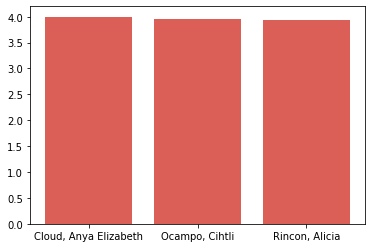

LATI


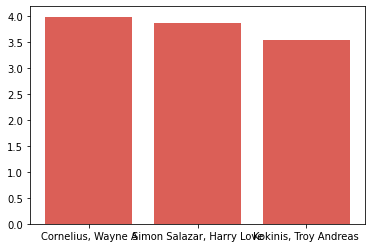

SOCA


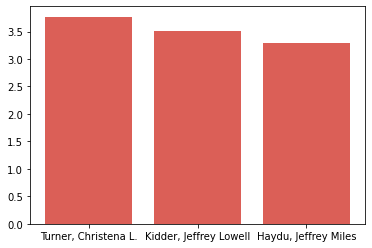

LTKO


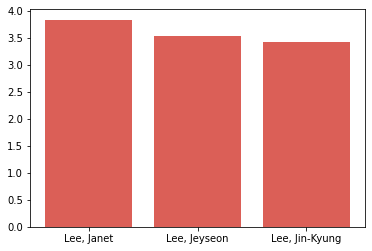

LTSP


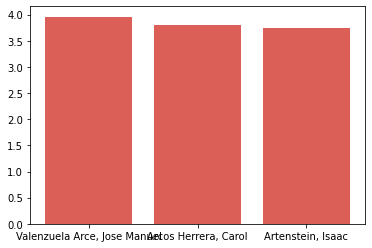

ELWR


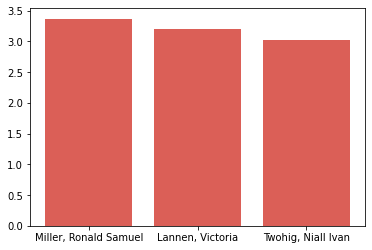

LISP


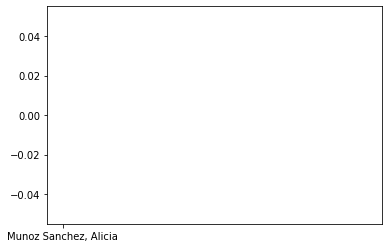

TDHT


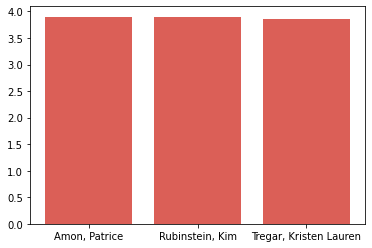

HILA


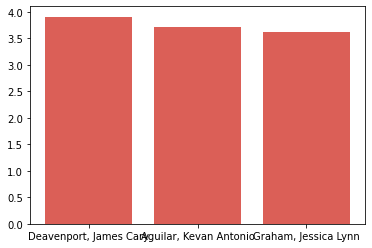

In [67]:
insts = df.copy()
for dep in set(df['department'].values):
    insts_0 = insts[insts['department'] == dep].groupby('instr').mean().sort_values('gpaAvg', ascending=False)[0:3]# top 3
    insts_0=insts_0.reset_index()
    print(dep)
    plt.figure()
    plt.bar(insts_0.instr, insts_0.gpaAvg)
    plt.show()